
# Experiment 2 King Devick Mode (Page Mode) Analysis

In [1]:
# Checks for the operating system that the script is being run on determines the data path that is to be used
import platform
operating_system=platform.system()
if operating_system=='Windows':
    dataframe_dir=('E:/Reading_experiment/Analysis Code & Plots/reading_analysis/expt2/Dataframe')
    data_directory=('E:/Reading_experiment/Reading Data/reading/Results/Experiment 2 King Devick Mode/All Subjects/Raw Data')
elif operating_system=='Linux':
    dataframe_dir=('/tmp/hd/Reading_experiment/Analysis Code & Plots/reading_analysis/expt2/Dataframe')
    data_directory=('/tmp/hd/Reading_experiment/Reading Data/reading/Results/Experiment 2 King Devick Mode/All Subjects/Raw Data')
else:
    dataframe_dir=('/tmp/hd/Reading_experiment/Analysis Code & Plots/reading_analysis/expt2/Dataframe')
    data_directory=('/tmp/hd/Reading_experiment/Reading Data/reading/Results/Experiment 2 King Devick Mode/All Subjects/Raw Data')

In [2]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Change this to the directory that contains the dataframes from the experiment
os.chdir(dataframe_dir)
file_name_saccade_unfiltered=open('Saccade summary MNH DF 6 Subjects.txt','r')
file_name_saccade = open('Saccade summary without sweep DF 6 Subjects.txt','r')
file_name_fixation=open('Fixation summary MNH DF 6 Subjects.txt','r')
file_name_accuracy=open('Accuracy_data.txt','r')
saccade_dataframe_unfiltered=pd.read_csv(file_name_saccade_unfiltered)
saccade_dataframe=pd.read_csv(file_name_saccade,delimiter=',')
fixation_dataframe=pd.read_csv(file_name_fixation,delimiter=',')
accuracy_dataframe=pd.read_csv(file_name_accuracy,delimiter='\t')

saccade_dataframe["Num_Words"]=saccade_dataframe_unfiltered['Num_Words']
saccade_dataframe["fwd_per_word"]=saccade_dataframe.Number_of_forward_Saccades/saccade_dataframe.Num_Words
saccade_dataframe["back_per_word"]=saccade_dataframe.Number_of_backward_Saccades/saccade_dataframe.Num_Words
fixation_dataframe["wpm"]=fixation_dataframe.Num_Words/fixation_dataframe.Trial_Duration*60000
fixation_dataframe["fixations_per_word"]=fixation_dataframe.Num_Fixations/fixation_dataframe.Num_Words

saccade_dataframe["fwd_per_word"]=saccade_dataframe.Number_of_forward_Saccades/saccade_dataframe.Num_Words
saccade_dataframe["back_per_word"]=saccade_dataframe.Number_of_backward_Saccades/saccade_dataframe.Num_Words
saccade_dataframe["saccades_per_word"]=saccade_dataframe.Number_of_saccades/saccade_dataframe.Num_Words
#accuracy_dataframe["accuracy_percent"]=(1-accuracy_dataframe.Num_Errors_Trial)*100
fixation_dataframe["wpm"]=fixation_dataframe.Num_Words/fixation_dataframe.Trial_Duration*60000

#fixation_dataframe.loc[fixation_dataframe.PRL_Position=='Foveal','Presentation_Mode']='no highlight'

#accuracy_dataframe.loc[accuracy_dataframe.Presentation_Mode=='Foveal','PRL_Position']='Foveal'

#fixation_dataframe['Presentation_Mode_fake']=fixation_dataframe.Presentation_Mode

#fixation_dataframe.loc[fixation_dataframe.PRL_Position=='Foveal','Presentation_Mode_fake']='with highlight'

def row_to_code(x):
    return "%s_%s_T%s_%s"%(x.Subject_ID,x.Session_No,x.Trial_No,x.PRL_Position.lower())

def filename_to_code(x):
    return "%s_%s"%(x.Filename[:-4],x.PRL_Position.lower())

accuracy_dataframe["Code"]=(accuracy_dataframe.apply(row_to_code,1)).astype(str)
fixation_dataframe["Code"]=fixation_dataframe.apply(filename_to_code,1).astype(str)


merged_df=pd.merge(fixation_dataframe, accuracy_dataframe, left_on='Code', right_on='Code')
merged_df["accuracy_percent"]=(merged_df.Num_Words-merged_df.Num_Errors_Trial)/merged_df.Num_Words*100


prl_sequence=[['right','left','inferior'],
          ['inferior','left','right'],
          ['inferior','right','left'],
          ['left','right','inferior'],
          ['left','inferior','right'],
          ['right','inferior','left']
         ]

highlight_sequence=[ ['no','with','with','no','with','no'],  
            ['with', 'no','no','with','no','with'],
            ['no','with','with','no','with','no'],  
            ['with', 'no','with','no','with','no'],
            ['no','with','with','no','with','no',],  
            ['with', 'no','no','with','no','with'],
           ]
          
          
colors_prl={'right':'g','inferior':'orange','left':'red'}
plot_title={'right':'Pseudo-PRL Right','inferior':'Pseudo-PRL Inferior','left':'Pseudo-PRL Left'}
markers_highlight={'with':'o', 'no':'.'}
label={'with':'With Highlight','no':'No Highlight'}


my_pal = {"left": "r", "right": "g", "inferior": "orange", "Foveal":"#9090f0"}


Populating the interactive namespace from numpy and matplotlib


In [3]:
## Help functions for in here:
    
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

#Next we perform the ANOVA on the dataframe
def ouranova(df,variable,sub_exclude='XX',exclude_fovea=True):
    if exclude_fovea:
        clause_exclude_fovea="PRL_Position!='Foveal'"
    else:
        clause_exclude_fovea="True"
    try:
        wpm_data=df.query("(Training==False)&(Subject_ID!='%s')&(%s)"%(sub_exclude,clause_exclude_fovea)).groupby(['PRL_Position','Subject_ID']).mean()[variable].reset_index()
    except:
        wpm_data=df.query("(Subject_ID!='%s')&(%s)"%(sub_exclude,clause_exclude_fovea)).groupby(['PRL_Position','Subject_ID']).mean()[variable].reset_index()
    data=wpm_data
    measure=variable
    aovrm=AnovaRM(data,measure,'PRL_Position',within=["Subject_ID"])
#     aovrm=AnovaRM(data,measure,'Subject_ID',within=["PRL_Position"])

    res=aovrm.fit()

    print(res)


    #Followed by multiple comparison measures

    mc = MultiComparison(data[measure], data['PRL_Position'])
    result = mc.tukeyhsd()

    print(result)
    print(mc.groupsunique)

    from statsmodels.stats.libqsturng import psturng
    print (psturng(np.abs(result.meandiffs / result.std_pairs),len(result.groupsunique),result.df_total))
    
def oursave(fname):
#     plt.savefig('figures/%s.pdf'%fname, bbox_inches='tight', transparent=True,dpi=600)
    plt.savefig('%s.png'%fname, bbox_inches='tight', transparent=True,dpi=600)
#     plt.savefig('%s.tif'%fname, bbox_inches='tight', transparent=True,dpi=600)

In [4]:
def significance_bar(pos1,pos2,yl,dataframe,pval,inner=False,inverted=False,multiply_by=0.7):
    mean=dataframe.query("(Training==False)&(PRL_Position!='Foveal')").groupby(['PRL_Position']).mean()[outcome_measure]
    std=dataframe.query("(Training==False)&(PRL_Position!='Foveal')").groupby(['PRL_Position'])[outcome_measure].std()
    font_size=20
    line_width=2
    if inverted==True:
        error_bar_min=mean-std
        error_bar_list=[]
        error_bar_list.append(error_bar_min['left'])
        error_bar_list.append(error_bar_min['inferior'])
        error_bar_list.append(error_bar_min['right'])
    else:
        error_bar_max=mean+std
        error_bar_list=[]
        error_bar_list.append(error_bar_max['left'])
        error_bar_list.append(error_bar_max['inferior'])
        error_bar_list.append(error_bar_max['right'])
    
    if pval<0.001:
        sig_marker='***'
        significant=True
    elif pval<0.01:
        sig_marker='**'
        significant=True    
    elif pval<0.05:
        sig_marker='*'
        significant=True
    else:
        significant=False
    if pos2-pos1==2:
        if significant==True:
            if inverted==True:
                ylim_inc=yl[0]+(yl[0]*0.5)
                plt.ylim(ylim_inc,yl[1])
                ypos=(yl[0])+(yl[0]*0.35)
                plt.plot((pos1,pos2),(ypos,ypos),'k')
                plt.plot((pos1,pos1),((ypos),(error_bar_list[pos1]+(0.2*ypos))),'k')
                plt.plot((pos2,pos2),((ypos),(error_bar_list[pos2]+(0.2*ypos))),'k')
                plt.text(((pos1+pos2)/2),(ypos),sig_marker,fontsize=font_size,horizontalalignment='center')
            else:
                ylim_inc=yl[1]+(yl[1]*0.5)
                plt.ylim(yl[0],ylim_inc)
                ypos=(yl[1])+(yl[1]*0.35)
                plt.plot((pos1,pos2),(ypos,ypos),'k',linewidth=line_width)
                plt.plot((pos1,pos1),((ypos),(error_bar_list[pos1]+(0.2*ypos))),'k',linewidth=line_width)
                plt.plot((pos2,pos2),((ypos),(error_bar_list[pos2]+(0.2*ypos))),'k',linewidth=line_width)
                plt.text(((pos1+pos2)/2),(ypos),sig_marker,fontsize=font_size,horizontalalignment='center')
    elif pos2-pos1==1:
        if significant==True:
            if inner==True:
                if pos1==0:
                    if inverted==True:
                        ylim_inc=yl[0]+(yl[0]*0.5)
                        plt.ylim(ylim_inc,yl[1])
                        ypos=(yl[0])+(yl[0]*0.35)
                        plt.plot((pos1,pos2),(ypos,ypos),'k',linewidth=line_width)
                        plt.plot((pos1,pos1),((ypos),(error_bar_list[pos1]+(0.2*ypos))),'k',linewidth=line_width)
                        plt.plot((pos2,pos2),((ypos),(error_bar_list[pos2]+(multiply_by*ypos))),'k',linewidth=line_width)# or 0.7 multiplier
                        plt.text(((pos1+pos2)/2),(ypos),sig_marker,fontsize=font_size,horizontalalignment='center')                        
                    else:
                        ylim_inc=yl[1]+(yl[1]*0.5)
                        plt.ylim(yl[0],ylim_inc)
                        ypos=(yl[1])+(yl[1]*0.35)
                        plt.plot((pos1,pos2),(ypos,ypos),'k',linewidth=line_width)
                        plt.plot((pos1,pos1),((ypos),(error_bar_list[pos1]+(0.2*ypos))),'k',linewidth=line_width)
                        plt.plot((pos2,pos2),((ypos),(error_bar_list[pos2]+(multiply_by*ypos))),'k',linewidth=line_width)# or 0.7 multiplier
                        plt.text(((pos1+pos2)/2),(ypos),sig_marker,fontsize=font_size,horizontalalignment='center')
                else:
                    if inverted==True:
                        ylim_inc=yl[0]+(yl[0]*0.25)
                        plt.ylim(ylim_inc,yl[1])
                        ypos=(yl[0])+(yl[0]*0.1)
                        plt.plot((pos1,pos2),(ypos,ypos),'k',linewidth=line_width)
                        plt.plot((pos1,pos1),((ypos),(error_bar_list[pos1]+(0.1*ypos))),'k',linewidth=line_width)
                        plt.plot((pos2,pos2),((ypos),(error_bar_list[pos2]+(0.1*ypos))),'k',linewidth=line_width)
                        plt.text(((pos1+pos2)/2),(ypos),sig_marker,fontsize=font_size,horizontalalignment='center')                        
                    else:
                        ylim_inc=yl[1]+(yl[1]*0.25)
                        plt.ylim(yl[0],ylim_inc)
                        ypos=(yl[1])+(yl[1]*0.1)
                        plt.plot((pos1,pos2),(ypos,ypos),'k',linewidth=line_width)
                        plt.plot((pos1,pos1),((ypos),(error_bar_list[pos1]+(0.1*ypos))),'k',linewidth=line_width)
                        plt.plot((pos2,pos2),((ypos),(error_bar_list[pos2]+(0.1*ypos))),'k',linewidth=line_width)
                        plt.text(((pos1+pos2)/2),(ypos),sig_marker,fontsize=font_size,horizontalalignment='center')
            else:
                if inverted==True:
                    ylim_inc=yl[0]+(yl[0]*0.25)
                    plt.ylim(ylim_inc,yl[1])
                    ypos=(yl[0])+(yl[0]*0.1)
                    plt.plot((pos1,pos2),(ypos,ypos),'k',linewidth=line_width)
                    plt.plot((pos1,pos1),((ypos),(error_bar_list[pos1]+(0.1*ypos))),'k',linewidth=line_width)
                    plt.plot((pos2,pos2),((ypos),(error_bar_list[pos2]+(0.1*ypos))),'k',linewidth=line_width)
                    plt.text(((pos1+pos2)/2),(ypos),sig_marker,fontsize=font_size,horizontalalignment='center')
                else:    
                    ylim_inc=yl[1]+(yl[1]*0.25)
                    plt.ylim(yl[0],ylim_inc)
                    ypos=(yl[1])+(yl[1]*0.1)
                    plt.plot((pos1,pos2),(ypos,ypos),'k',linewidth=line_width)
                    plt.plot((pos1,pos1),((ypos),(error_bar_list[pos1]+(0.1*ypos))),'k',linewidth=line_width)
                    plt.plot((pos2,pos2),((ypos),(error_bar_list[pos2]+(0.1*ypos))),'k',linewidth=line_width)
                    plt.text(((pos1+pos2)/2),(ypos),sig_marker,fontsize=font_size,horizontalalignment='center')

In [5]:
# #Checking Data Consistency
# subject_list=["S01","S02","S03","S04","S05","S06"]
# prl_list=["inferior","right","left"]
# #overall_duration_summary=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],'Data_length':[]})
# for i in range(len(subject_list)):
#     for j in range(len(prl_list)):
#         subject_id=subject_list[i]
#         prl_pos=prl_list[j] 
#         data_length=len(fixation_dataframe.query("(Training==True) & (Subject_ID==@subject_id) & (PRL_Position==@prl_pos)")['wpm'])
#         print(data_length)

# Subjective Responses Accuracy

We compare the reponses that we get for each of the PRL positions that were tested

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


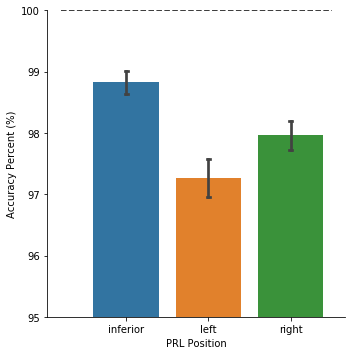

In [6]:
sns.factorplot(x='PRL_Position_x', y='accuracy_percent' ,data=merged_df, kind='bar',capsize=0.04,legend=False)
plt.ylim(95,100)
plt.ylabel('Accuracy Percent (%)')
plt.xlabel('PRL Position')
plt.plot( [-0.8,2.5], [100,100], 'k--' )
#plt.legend( loc='upper right', labels=['No Highlight', 'With Highlight'])
#plt.legend(title='Presentation Mode')
# oursave('performance')

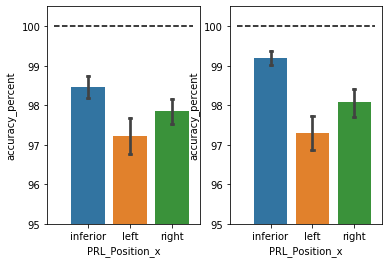

In [7]:
filtered_df=merged_df.query("Presentation_Mode_x=='no highlight'")
plt.subplot(1,2,1)
sns.barplot(x="PRL_Position_x",y="accuracy_percent",data=filtered_df,capsize=.05)
plt.ylim(95,100.5)
plt.plot( [-0.8,2.5], [100,100], 'k--' )

filtered_df=merged_df.query("Presentation_Mode_x=='with highlight'")
plt.subplot(1,2,2)
sns.barplot(x="PRL_Position_x",y="accuracy_percent",data=filtered_df,capsize=.05)
plt.ylim(95,100.5)

plt.plot( [-0.8,2.5], [100,100], 'k--' )

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


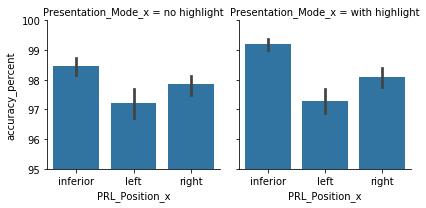

In [8]:
g = sns.FacetGrid(merged_df, col='Presentation_Mode_x')
g.map(sns.barplot,"PRL_Position_x", "accuracy_percent")
plt.ylim(95,100)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


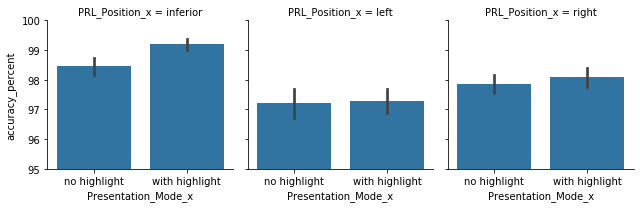

In [9]:
g = sns.FacetGrid(merged_df, col='PRL_Position_x')
g.map(sns.barplot,"Presentation_Mode_x", "accuracy_percent")
plt.ylim(95,100)
plt.show()


#  Preliminary Data Analysis

Here we look at the overall outcome of the results and also compare the results before and after running our manual eye  trace filtering program

In [10]:
# The number of backward saccades using the unfiltered dataframe with the sweep data
saccade_dataframe_unfiltered.query("(Training==False)").groupby(['PRL_Position']).mean()['Number_of_backward_Saccades']

PRL_Position
Foveal      14.263889
inferior    19.045139
left        34.868056
right       48.826389
Name: Number_of_backward_Saccades, dtype: float64

In [11]:
# The number of backward saccades using the devoid of sweeps and correction saccades
saccade_dataframe.query("(Training==False)").groupby(['PRL_Position']).mean()['Number_of_forward_Saccades']

PRL_Position
Foveal      64.256944
inferior    79.802083
left        98.271777
right       79.631944
Name: Number_of_forward_Saccades, dtype: float64

In [12]:
# Fixation duration as a function of PRL position
fixation_dataframe.query("(Training==False)").groupby(['PRL_Position']).mean()['Mean_Fixation_Duration']

PRL_Position
Foveal      233.044722
inferior    317.500009
left        322.076983
right       316.934802
Name: Mean_Fixation_Duration, dtype: float64

# Fixation metrics: Fixation Duration

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'PRL Position: foveal')

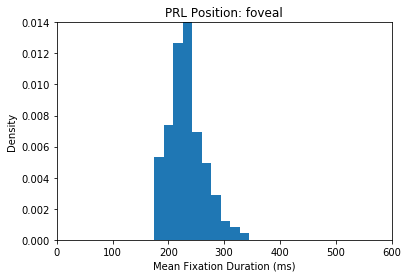

In [13]:
plt.hist(fixation_dataframe.query("Training==False & PRL_Position=='Foveal'")['Mean_Fixation_Duration'],normed=True)#,bins=[50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,500,600])
plt.xlabel('Mean Fixation Duration (ms)')
plt.ylabel('Density')
plt.ylim(0,0.014)
plt.xlim(0,600)
plt.title('PRL Position: foveal')

#savefig('Fixation Duration foveal.pdf',bbox_inches='tight')

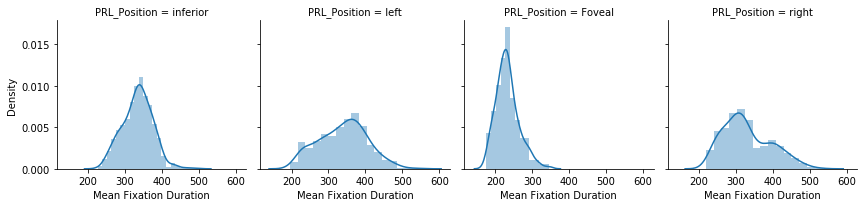

In [14]:
import seaborn as sns
g = sns.FacetGrid(fixation_dataframe, col='PRL_Position',col_wrap=4)
g.map(sns.distplot, "Mean_Fixation_Duration").set_axis_labels('Mean Fixation Duration', 'Density')
plt.show()




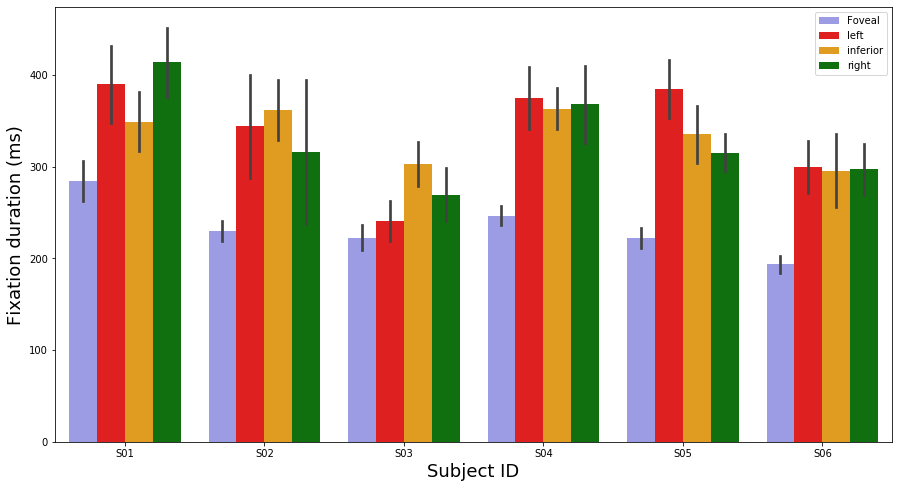

In [15]:
plt.figure(figsize=(15,8))
my_order = ['Foveal','left', 'inferior', 'right']
sns.barplot(data=fixation_dataframe,x='Subject_ID',y='Mean_Fixation_Duration',ci='sd',
            hue='PRL_Position',hue_order=my_order, palette=my_pal)
#sns.barplot(data=fixation_main,x='PRL_Position_x',y='Mean_Fixation_Duration',ci='sd',hue='Subject_ID')
plt.xlabel('Subject ID', size=18)
plt.ylabel('Fixation duration (ms)', size=18)
plt.legend(loc='upper right')
# oursave("fixation_duration_by_subject")

In [16]:
ouranova(fixation_dataframe,'Mean_Fixation_Duration',exclude_fovea=False)

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Subject_ID  5.8681 5.0000 15.0000 0.0034

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
  Foveal inferior  84.4553 0.0146  14.4579 154.4527   True
  Foveal     left  89.0323 0.0097  19.0349 159.0297   True
  Foveal    right  83.8901 0.0153  13.8927 153.8875   True
inferior     left    4.577    0.9 -65.4204  74.5744  False
inferior    right  -0.5652    0.9 -70.5626  69.4322  False
    left    right  -5.1422    0.9 -75.1396  64.8552  False
----------------------------------------------------------
['Foveal' 'inferior' 'left' 'right']
[0.01460606 0.0097417  0.01534466 0.9        0.9        0.9       ]


Text(0.5, 1.0, 'Mean Fixation Duration & PRL Position')

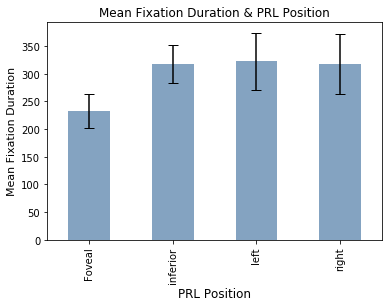

In [17]:
# Matplotlib plots
variable='Mean_Fixation_Duration'
fixation_duration_data=fixation_dataframe.query("(Training==False)").groupby(['PRL_Position']).mean()[variable]
error_bar=fixation_dataframe.query("(Training==False)").groupby(['PRL_Position'])[variable].std()

fixation_duration_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.ylabel('Mean Fixation Duration',size=11)
plt.xlabel('PRL Position',size=12)
plt.title('Mean Fixation Duration & PRL Position')


#savefig('Fixation Duration Bar Graph.pdf',bbox_inches='tight')

Text(0.5, 1.0, 'Mean Fixation Duration & PRL Position')

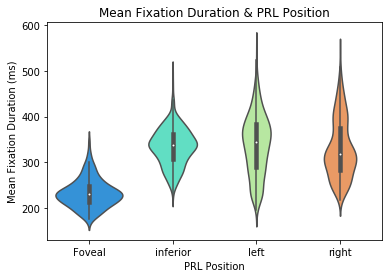

In [18]:
sns.violinplot(x="PRL_Position", y="Mean_Fixation_Duration", data=fixation_dataframe,palette='rainbow',order=['Foveal','inferior','left','right'])
#plt.ylim(0,3000)
plt.xlabel('PRL Position')
plt.ylabel('Mean Fixation Duration (ms)')
plt.title('Mean Fixation Duration & PRL Position')
#savefig('Mean Fixation Duration Violin Plot.tif',bbox_inches='tight')
# oursave('Mean Fixation duration violin plot')

(array([3., 4., 3., 1., 3., 3., 3., 1., 2., 1.]),
 array([230.425     , 234.15836207, 237.89172414, 241.62508621,
        245.35844828, 249.09181034, 252.82517241, 256.55853448,
        260.29189655, 264.02525862, 267.75862069]),
 <a list of 10 Patch objects>)

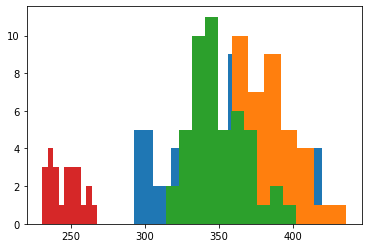

In [19]:
plt.hist(fixation_dataframe.query("(Training==False)&(Subject_ID=='S04')&(PRL_Position=='right')")['Mean_Fixation_Duration'])
plt.hist(fixation_dataframe.query("(Training==False)&(Subject_ID=='S04')&(PRL_Position=='left')")['Mean_Fixation_Duration'])
plt.hist(fixation_dataframe.query("(Training==False)&(Subject_ID=='S04')&(PRL_Position=='inferior')")['Mean_Fixation_Duration'])
plt.hist(fixation_dataframe.query("(Training==False)&(Subject_ID=='S04')&(PRL_Position=='Foveal')")['Mean_Fixation_Duration'])

In [20]:
# The number of fixations as a function of the PRL position tat was tested 
fixation_dataframe.query("(Training==False)").groupby(['PRL_Position']).mean()['Num_Fixations']

PRL_Position
Foveal       78.826389
inferior    101.805556
left        132.024306
right       130.465278
Name: Num_Fixations, dtype: float64

In [21]:
ouranova(fixation_dataframe,'Num_Fixations',exclude_fovea=False)

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Subject_ID  2.8038 5.0000 15.0000 0.0555

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
  Foveal inferior  22.9792 0.0809 -2.1568 48.1151  False
  Foveal     left  53.1979  0.001  28.062 78.3339   True
  Foveal    right  51.6389  0.001 26.5029 76.7748   True
inferior     left  30.2187  0.015  5.0828 55.3547   True
inferior    right  28.6597 0.0219  3.5238 53.7957   True
    left    right   -1.559    0.9 -26.695 23.5769  False
--------------------------------------------------------
['Foveal' 'inferior' 'left' 'right']
[0.08085627 0.001      0.001      0.01499774 0.02188923 0.9       ]


# Training Data: Plots

Contains plots for each subject where the parameter that is being used to plot can be altered by changing the outcome measure 

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


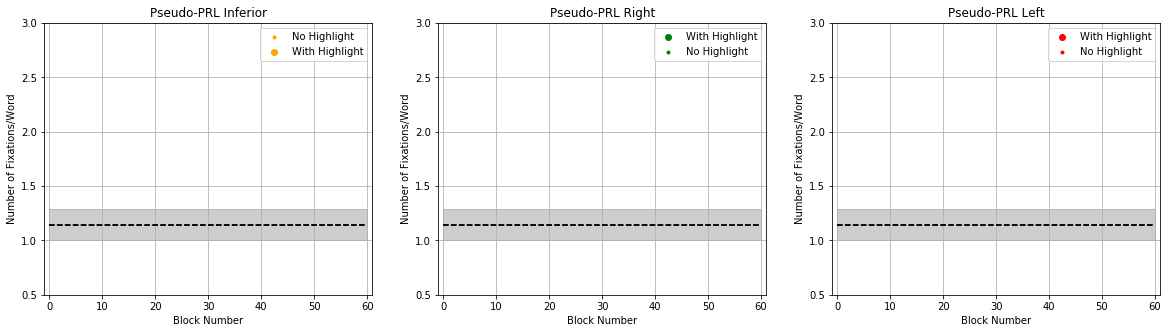

In [22]:
import statsmodels.api as sm
outcome='fwd_per_word'

plt.figure(figsize=(20,5))
nsub=0
asub=2
#for nsub,asub in enumerate([0,1,3,4]):
for n_prl,prl_pos in enumerate(prl_sequence[asub]):
    prl=prl_sequence[asub][n_prl]

    df_foveal=saccade_dataframe.query("(Subject_ID=='S%02d') & (PRL_Position=='Foveal')"%(asub+1))
    foveal_mean=df_foveal[outcome].mean()
    foveal_std=df_foveal[outcome].std()

    plt.subplot(1,3,3*nsub+n_prl+1)
    #plt.text(50,400,"S%02d"%(asub+1),size=18)
    for highlight_cond in [0,1]:
        plt.fill_between( [0,60], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                         [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )
        plt.plot( [0,60], [foveal_mean,foveal_mean], 'k--' )

        highlight_which=highlight_sequence[nsub][n_prl*2+highlight_cond] # each PRL has two highlight conditions trained


        df_hicond=saccade_dataframe.query("(Training==True) & (Subject_ID=='S%02d')"
                    "&(PRL_Position=='%s') & (Presentation_Mode=='%s highlight')"%(asub+1,prl,highlight_which))
        lowess = sm.nonparametric.lowess
        x=df_hicond['Trial_No']
        y=df_hicond[outcome]
        plt.plot(x,y,ls='',color=colors_prl[prl_pos],marker=markers_highlight[highlight_which],label=label[highlight_which])
        z = lowess(y, x, frac=1./2)
        plt.plot(z[:,0], z[:,1], color='k')
        plt.xlabel("Block Number")
        plt.ylabel("Number of Fixations/Word")
        plt.title(plot_title[prl_pos])
        plt.ylim(.5,7)
        plt.xlim(-1,61 ) # So we can fully see first and last point
        plt.grid(True)
        plt.ylim(0.5,3)
        #plt.subplots_adjust(hspace=.3,wspace=0.2)#adjusts the spacing between each of the subplots
        plt.legend()
        #Needed when file needs to be saved
        #savefig('Training_Num_Fixations_S05.pdf',bbox_inches='tight')
        #print asub+1,prl,highlight_which,len(df_hicond)

In [23]:
outcome='wpm'
#outcome='fixations_per_word'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJIAAAFNCAYAAABbvUVCAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3Xl8U1X+//HXp6VlESzigiICMi6IgGAFW0BsKW6ooIg6WAHXzowywIiMC8sgWHVmGEX0p44Li1jBBXFBXGZKCypRBAEZwPm6teCgCArIIq3Q8/sjaS2lTdM2aZL2/Xw88kjuzc25n5NgPvaTc88x5xwiIiIiIiIiIiKViQl3ACIiIiIiIiIiEh1USBIRERERERERkYCokCQiIiIiIiIiIgFRIUlERERERERERAKiQpKIiIiIiIiIiAREhSQREREREREREQmICklSZ5lZOzNzZtYg3LEEi5ldbmabzGy3mXWrxuvvNrOnQxGbiEhdUVfyhy9XtA/wWGdmJ4U6JhGRuqiu5I2KmNkfzGyLL68cGe54JPxUSJKQMbM8M/vZ94WzxcxmmlnTcMcViFLJYLfvlmdmd5Z63pnZHt9z/zOzB80sttTzuWZ2UwDnSTGzb6oQ2lRghHOuqXNuVdV6Bc65+5xzlcYlIhJOyh8B548iXzu7zOy/ZnZ96WN8ueKrIPTpOjN7v6btiIiEivJGSP7uKH5dHPAgcL4vr/ygHx9EhSQJtUudc02BM4HuwPgwx1NVzX3xDwEmmtmFpZ47w/fcucDVwA21EE9bYF11XliTX0jq6q8rIhLRlD8qt9nXzuHAn4CnzOzUmgQtIhLFlDdCoyXQiGr+DSJ1kwpJUiucc/8D3gI6Qcmvm1/5fkX92szSi481sxvMbIOZbTezd8ysrW//IUNGS1fgzSzWzKaa2TYz+wq4uHQMZtbKzF43sx/N7Aszu7kK8Xvwfnl2Kue5L4APgK5VeEvK5evPFDP7wPfevGtmR5lZQzPbDcQCa8zsy1J9mm9mW33v48hSbU0ys5fN7Dkz+wm4zrfvuVLHDDCzdWa2w3fu00o9l2dmd5jZp8AeFZNEJByUPwI6h3POLQJ+BLqUirvkF2MzO9LM3jCzn8zsYzO7t5xRRv3M7HPf+/f/zOs04Akg2fdr+I6axCoiEmrKG1Xn+1tjqpltNO+IrifMrLGZnQL813fYDjNbbGZLfdtrfHnh6mDGItFBhSSpFWZ2AtAfWGVmhwHTgYucc82AnsBq33GXAXcDg4CjgfeAuQGe5mbgEqAbcBYwuMzzc4FvgFa+5+4zs7QAYjcz6wWcDhxyOZmZdQDOAb4IMM7KXANcDxwDxAO3O+cKfL9CgPcXid+YWQzwBrAGOB5IA0ab2QWl2hoIvAw0B7LKxH0K3vdkNN73ehHwhpnFlzpsCN7E2Nw5tz9I/RMRCZjyR+XMLMbMBgBH+Wnr/wF7gGOB4b5bWZfg/RX/DOAq4ALn3Abg94DHd0lD85rEKiISasob1fJX4BS8BaqT8P5tMdE593++WMD790Bf51wf3/YZvrzwQpBjkSigQpKE2qu+Xy/fB5YA9/n2FwGdzKyxc+5b51zxUMnfAfc75zb4Chf3AV2Lfx2oxFXANOfcJufcj8D9xU/4Ekpv4A7n3D7n3GrgaWBoJW1uw/sL79PAnc657FLPfWJme4ANQC7wWAAxBmKmc+7/nHM/Ay9S8S8O3YGjnXOTnXOFvnkwngJ+W+oYj3PuVedcka+90q4G3nTO/cs59wve+Zca402wxab73s+yrxURCTXlj8q18r1HPwMLgNvKmz/PvHNpXAH8xTm31zm3HphdTnsPOOd2OOc2AjkE+RdvEZEQU96oBjMzvIWxPznnfnTO7cL7XvzW/yulPlMhSULtMudcc+dcW+fcLc65n51ze/AWMX4PfGtmb/qq6+CdA+hh815qtQPvl6nhrYpXphWwqdR2fpnnir8YSz9/PJSsbFN8a1PqmKOcc0c4505zzk0vc74zgaa+vpwNHBZAjIH4rtTjvb5zlKctvj8iSr1fd+O9jrnYpvJfCnjfk5L3yDlX5Du+9Hvt7/UiIqGk/FG5zb4RQofj/cW9bwXHHQ004OA+lvf9Hmj+ERGJRMob1XM00ARYWeq9eNu3X6RcKiRJWDjn3nHOnQccB3yGdyQNeL+Qf+dLAsW3xs65ZXiH5IP3i67YsaUefwucUGq79BfzZqCFmTUr8/z/fPE0LXXbWIV+OOfci4AHmBjo64JkE/B1mfeqmXOuf+kQ/bx+M94ECpT8GnECvvckgNeLiNQ65Y9y2yoA7gA6+y7VKGsrsB9oXWrfCeUcV+EpahCeiEhYKW9Uahveka2nl3ofEtyv02qIHEKFJKl1ZtbSvJM8HwYUALuBA76nnwDuMrPTfccmmNmVAM65rXi/gK/1TXB3A/CbUk2/CIw0s9ZmdgRQsmymc24TsAy438wamVkX4EbKzBtUAw8AGWZWOsE08J2r+BYXpHMVWw78ZN4JsRv73pNOZtY9wNe/CFxsZmm+2Mbg/TyWBTlOEZGgUP6omHOuEPgH5fxx4Zw7ALwCTDKzJr5f44dVIcYtQOsyc+iJiEQ85Y1DlTmuEd4fC54CHjKzY3zHHG8Hz7ta1hagfRD6IlFKhSQJhxi8RYvNeIeQngvcAuCcW4B3srd55l1p7D/ARaVeezMwFvgB78RvpYseTwHv4J18+hO8/9Nc2hCgne+8C/DOFfGvYHTIObcW77XYY0vtfhxvdb/4NjMY5yp1zgPApXjnsPga768JTwMJAb7+v8C1wCO+116Kd9nUwmDGKSISRMof/s0A2pjZpeU8NwJvfvgOmIN3ItiCANtdjHcFoe/MbFuArxERiQTKGwc7vsxxP+MtkN2BdwLvD33vxb+BU/2EMQmY7bsU7qpqd0ailjmn0coiIiIi9YmZ/RU41jlX3uptIiIiIhXSiCQRERGROs7MOphZF/PqgfcyiwXhjktERESiT8gKSb5rLpeb2RozW2dm95RzTEMze8HMvjCzj8ysXajiERGRyKI8IVKrmuG99GIP3rk9/gG8FtaIRCqhPCEiEpkahLDtAqCvc263b7Kv983sLefch6WOuRHY7pw7ycx+i/ca1atDGJOIiEQO5QmRWuKc+xg4KdxxiFSR8oSISAQK2Ygk3/KEu32bcb5b2QmZBgKzfY9fBtLMzEIVk4iIRA7lCRER8Ud5QkQkMoV0jiTfUomrge+BfznnPipzyPHAJgDn3H5gJ3BkKGMSEZHIoTwhIiL+KE+IiESeUF7aVrw8eVczaw4sMLNOzrn/lDqkvF8LDllGzswygAyAxo0bJ55wwgkHPV9UVERMTN2aN1x9ig7qU3SoL336v//7v23OuaPDFFK1KE9Un/oUHdSn6FBf+qQ8cXCeiPvpJxpt2QKlV7E2Y1/Llvxy+OFB7Uc41Jd/19FOfYoO9aVPAecJ51yt3IC/ALeX2fcOkOx73ADYBpi/dhITE11ZOTk5h+yLdupTdFCfokN96ROwwtXSd3oobsoTVaM+RQf1KTrUlz4pT5STJ557zrm2bV2RmXNt23q364j68u862qlP0aG+9CnQPBHKVduO9v1ygJk1BvoBn5U57HVguO/xYGCxL3gREanjlCdERMSfWskT6emQl8eSxYshL8+7LSIifoXy0rbjgNlmFot3LqYXnXMLzWwy3irX68AzwBwz+wL4EfhtCOMREZHIojwhIiL+KE+IiESgkBWSnHOfAt3K2T+x1ON9wJWhikFERCKX8oSIiPijPCEiEplCOtm2iESXX375haZNm7Jhw4ZwhxJUCQkJdapPjRo1Qisbi0g4KE9EB+UJEQkX5YnoUNM8oUKSiJT45ptvaNmyJa1bt65T/wO6a9cumjVrFu4wgsI5xw8//MBhhx0W7lBEpB5Snoh8yhMiEk7KE5EvGHmibq1fJyI1sm/fPhISEurUl35dY2YceeSRxMbGhjsUEamHlCcin/KEiIST8kTkC0aeUCFJRA6iL/3Ip89IRMJJ30GRT5+RiISTvoMiX00/IxWSRCSimBljxowp2Z46dSqTJk0K+PWzZs1ixIgRB+3r378/K1asKHm8Y8cOv22kpKSUHF9abm4ul1xyCQCvv/46DzzwgN92Sh9f1rRp09i7d6/f14uIyMH+9Kc/MW3atJLtCy64gJtuuqlke8yYMTz44INs3ryZwYMHA7B69WoWLVpUcsykSZOYOnVqpedq164d27ZtK9kOZg4onWdqkpfK9k1EpL5TnjhYqPKECkkiElEaNmzIK6+8ctCXcjAtWrSI5s2b17idAQMGcOedd1b79SokiYhUXc+ePVm2bBkARUVFbNu2jXXr1pU8v2zZMnr16kWrVq14+eWXgdD8T3RNc0BpNclLKiSJiBxMeeJgKiSJSL3QoEEDMjIyeOihhw55Lj8/n7S0NLp06UJaWhobN26scvulfzmYMmUKHTp04LzzzmPIkCEH/fLw0ksv0aNHD0455RTee++9Q9opPfLpyy+/JCkpie7duzNx4kSaNm1actzu3bsZPHgwHTp0ID09Hecc06dPZ/PmzaSmppKamlrlPoiIRIustVm0m9aOmHtiaDetHVlrs2rUXq9evUr+QFi3bh2dOnWiWbNmbN++nYKCAjZs2EC3bt3Iy8ujU6dOFBYWMnHiRF544QW6du3KCy+8AMD69etJSUmhffv2TJ8+vcpx1CQHlFXdvFRR30REokpWFrRrBzEx3vss5YmyIjFPaNU2EamZrR74PheOSYGjk4PS5K233kqXLl3485//fND+ESNGMGzYMIYPH86MGTMYOXIkr7766iGvf+GFF3j//fdLtr/44otDjlmxYgXz589n1apV7N+/nzPPPJPExMSS5/fv38/y5ctZtGgR99xzD//+978rjHfUqFGMGjWKIUOG8MQTTxz03KpVq1i3bh2tWrWiV69efPDBB4wcOZIHH3yQnJwcjjrqqIDfFxGRaJK1NouMNzLY+4t39GX+znwy3sgAIL1zerXabNWqFQ0aNGDjxo0sW7aM5ORk/ve//+HxeEhISKBLly7Ex8eXHB8fH8/kyZNZsWIFjz76KOC9ZOGzzz4jJyeHXbt2ceqpp3LttdeWe77U1NSSyUh3795Nhw4dDjmmqjmgd+/e5Z6rOnmpbN9ERKJKVhZkZEDxKP38fO82QLryRFmRlCc0IklEqm+rBxanwZoJ3vutnqA0e/jhhzNs2LBDqv8ej4drrrkGgKFDhx5ULCrt6quvZvXq1SW3bt26HXLM+++/z8CBA2ncuDHNmjXj0ksvPej5QYMGAZCYmEheXp7feD0eD1deeSVASXzFevToQevWrYmJiaFr166VtiUiUleMyx5XUkQqtveXvYzLHlejdot/bS7+AyE5Oblku2fPngG1cfHFF9OwYUOOOuoojjnmGL7//vtyj8vJySnJJU8//XS5xwQrBwQzL4mIRIVx434tIhXbu9e7vwaUJ0KfJ1RIEpHq+z4XDhQCB6Co0LsdJKNHj+aZZ55hz549FR5Tk9UGyhs2WlrDhg0BiI2NZf/+/dU+T3E7wWhLRCSabNxZ/uXHFe0PVPH8F2vXrqVTp04kJSXh8XhK5r0IRG19N1flPLWVl0REIkZF01RUY/qK0pQnQp8nVEgSkeo7JgVi48FiISbeux0kLVq04KqrruKZZ54p2dezZ0/mzZsHQFZWVoXDPgPRu3dv3njjDfbt28fu3bt58803q91WUlIS8+fPByiJrzLNmjVj165d1T6niEika5PQpkr7A9WrVy8WLlxIixYtiI2NpUWLFuzYsQOPx0Ny8qGXWIf6+7Y6OaA81clLyiUiEtXaVJAPKtofIOWJX4WqbyokiUj1HZ0MfbOhyxTvfZDmSCo2ZsyYg1Zvmz59OjNnzqRLly7MmTOHhx9+uNptd+/enQEDBnDGGWcwaNAgzjrrLBISEqrV1rRp03jwwQfp0aMH3377bUDtZGRkcNFFF2mybRGpszLTMmkS1+SgfU3impCZllmjdjt37sy2bdtISko6aF9CQkK5886lpqayfv36kE1IXZ0cUJ7q5KVQ901EJKQyM6HJwXmCJk28+2tAeeJXIeubcy6qbomJia6snJycQ/ZFO/UpOtS1Pq1fv9799NNP4Q4j6Crq065du5xzzu3Zs8clJia6lStXVqv9PXv2uKKiIuecc3PnznUDBgyoXqBV8MknnxyyD1jhIuB7Otw35YnopT5Fvqrmiec+fc61faits0nm2j7U1j336XMhjK76apL7gpkDgpWXnFOe8HdTnohe6lPkq/LfE88951zbts6Zee+fU57wJ1LyhFZtE5F6KyMjg/Xr17Nv3z6GDx/OmWeeWa12Vq5cyYgRI3DO0bx5c2bMmBHkSEVEolN65/Rqr9AWLYKZA4KVl0REokZ6erVXaIsWdTFPqJAkIvXW888/H5R2zjnnHNasWROUtkREJLoEMwcEKy+JiEjkqIt5QnMkiYiIiIiIiIhIQFRIEhERERERERGRgKiQJCIiIiIiIiIiAVEhSUREREREREREAqJCkohEjD/96U9MmzatZPuCCy7gpptuKtkeM2YMDz74IJs3b2bw4MEArF69mkWLFpUcM2nSJKZOnVrpudq1a8e2bdtKtnNzc7nkkksAeP3113nggQf8vr708WWlpKSwYsUKAPr378+OHTv8tlX6+NLK9k1ERMDMGDNmTMn21KlTmTRpUsCvnzVrFiNGjDhoX//+/YPyvR3MXDJt2jT27t3r9/UiInIo5YnQUyFJRCJGz549WbZsGQBFRUVs27aNdevWlTy/bNkyevXqRatWrXj55ZeB0BRbBgwYwJ133hmUthYtWkTz5s2r9VoVkkREDtWwYUNeeeWVg34MCKaafG+XVtNcokKSiEj1KE+EngpJIlJ9X2fBq+3g+Rjv/ddZNWquV69eJYWkdevW0alTJ5o1a8b27dspKChgw4YNdOvWjby8PDp16kRhYSETJ07khRdeoGvXrrzwwgsArF+/npSUFNq3b8/06dOrHEfpXyG+/PJLkpKS6N69OxMnTqRp06Ylx+3evZvBgwfToUMH0tPTcc4d0lbpkU9TpkyhQ4cOnHfeeQwZMuSgkVMvvfQSPXr04JRTTuG9996rsG8iIvVdgwYNyMjI4KGHHjrkufz8fNLS0ujSpQtpaWls3Lixyu1X93u7rJrkkunTp7N582ZSU1NJTU2tch9EROoz5YnQUyFJRKrn6yxYngF78wHnvV+eUaNiUqtWrWjQoAEbN25k2bJlJCcnc/bZZ+PxeFixYgVdunQhPj6+5Pj4+HgmT57M1VdfzerVq7n66qsB+Oyzz3jnnXdYvnw599xzD7/88ku550tNTaVr16507dr1oEvoShs1ahSjRo3i448/plWrVgc9t2rVKqZNm8b69ev56quv+OCDDyrs24oVK5g/fz6rVq3ilVdeOWSo6/79+1m+fDnTpk3jnnvuqbBvIiLRxrPJw/3v3Y9nkydobd56661kZWWxc+fOg/aPGDGCYcOG8emnn5Kens7IkSPLfX1xkb74tmrVqkOOqer3tj9VzSUjR46kVatW5OTkkJOTE8hbIiISvTweuP9+732QKE+ElgpJIlI9a8bBgTJDKQ/s9e6vgeJRScWFpOTk5JLtnj17BtTGxRdfTMOGDTnqqKM45phj+P7778s9Licnh9WrV7N69Wqefvrpco/xeDxceeWVAFxzzTUHPdejRw9at25NTEwMXbt2JS8vr8KY3n//fQYOHEjjxo1p1qwZl1566UHPDxo0CIDExES/7YiIRBPPJg9pz6YxIWcCac+mBa2YdPjhhzNs2LBDRp16PJ6S7+qhQ4fy/vvvl/v64iJ98a1bt26HHBPM7+1g5RIRkTrH44G0NJgwwXsfpGKS8kRoqZAkItWzt4JhoBXtD1DxPElr166lU6dOJCUl4fF4SuZHCkTDhg1LHsfGxrJ///4axRSM85R32Vt5bYUyXhGR2pabl0vhgUIOuAMUHigkNy83aG2PHj2aZ555hj179lR4jJlVu/3a+t6urZwlIhKRcnOhsBAOHPDe5+YGrWnlidBRIUlEqqdJm6rtD1CvXr1YuHAhLVq0IDY2lhYtWrBjxw48Hg/JycmHHN+sWTN27dpVo3P6k5SUxPz58wGYN29etdvp3bs3b7zxBvv27WP37t28+eablb4m1H0TEQm1lHYpxMfGE2uxxMfGk9IuJWhtt2jRgquuuopnnnmmZF/Pnj1LvquzsrLo3bt3tduvzvd2RaqTS5QDRKReSEmB+HiIjfXep6QErWnlidBRIUlEqueMTIhtcvC+2Cbe/TXQuXNntm3bRlJS0kH7EhISOOqoow45PjU1lfXr14dsQupp06bx4IMP0qNHD7799lsSEhKq1U737t0ZMGAAZ5xxBoMGDeKss86qtK1Q901EJNSST0gme1g2U1KnkD0sm+QTDv1BoCbGjBlz0Ko806dPZ+bMmXTp0oU5c+bw8MMPV7vt6nxvV6Q6uSQjI4OLLrpIk22LSN2WnAzZ2TBlive+nB+Oa0J5IkScc1F1S0xMdGXl5OQcsi/aqU/Roa71af369e6nn34K/AVfPefcgrbOZZn3/qvnQhVajVSpT2Xs2bPHFRUVOeecmzt3rhswYEC129q1a1dJm4mJiW7lypXVbuuTTz45ZB+wwkXA93S4b8oT0Ut9inxVzhNRoqI+Bet7O5i5JFDKE8oT6lN0qGt9Up6oH3miQe2XrkSkzjgx3Xurw1auXMmIESNwztG8eXNmzJhR7bYyMjJYv349+/btY/jw4Zx55plBjFRERIItWN/bwcwlIiISOeprnlAhSUTEj3POOYc1a9YEpa3nn38+KO2IiEjtCNb3djBziYiIRI76mic0R5KIiIiIiIiIiAREhSQROYj30liJZPqMRCSc9B0U+fQZiUg46Tso8tX0M1IhSURKNGrUiJ07d+rLP4I55/jhhx84cOBAuEMRkXpIeSLyKU+ISDgpT0S+YOQJzZEkIiVat27NmjVr2L17d7hDCap9+/bRqFGjcIcRNI0aNWLPnj3hDkNE6iHlieigPCEi4aI8ER1qmidUSBKREnFxcezevZuzzjor3KEEVW5uLt26dQt3GEGVn58f7hBEpB5SnogeyhMiEg7KE9GjJnlCl7aJiIiIiIiIiEhAVEgSEREREREREZGAqJAkIiIiIiIiIiIBUSFJREREREREREQCokKSiIiIiIiIiIgERIUkEREREREREREJiApJIiIiIiIiIiISEBWSREREREREREQkICokiYiIiIiIiIhIQFRIEhERERERERGRgKiQJCIiIiIiIiIiAQlZIcnMTjCzHDPbYGbrzGxUOcekmNlOM1vtu00MVTwiIhJZlCdERMQf5QkRkcjUIIRt7wfGOOc+MbNmwEoz+5dzbn2Z495zzl0SwjhERCQyKU+IiIg/yhMiIhEoZCOSnHPfOuc+8T3eBWwAjg/V+UREJLooT4iIiD/KEyIikcmcc6E/iVk7YCnQyTn3U6n9KcB84BtgM3C7c25dOa/PADIAWrZsmThv3ryDnt+9ezdNmzYNUfThoT5FB/UpOtSXPqWmpq50zp0VppBqRHmi6tSn6KA+RYf60iflCeWJaKc+RQf1KTrUKE8450J6A5oCK4FB5Tx3ONDU97g/8Hll7SUmJrqycnJyDtkX7dSn6KA+RYf60idghQvxd3oobsoT1aM+RQf1KTrUlz4pTyhPRDv1KTqoT9GhJnkipKu2mVkc3l8Ispxzr5R93jn3k3Nut+/xIiDOzI4KZUwiIhI5lCdERMQf5QkRkcgTylXbDHgG2OCce7CCY471HYeZ9fDF80OoYhIRkcihPCEiIv4oT4iIRKZQrtrWCxgKrDWz1b59dwNtAJxzTwCDgT+Y2X7gZ+C3vuFUIiJS9ylPiIiIP8oTIiIRKGSFJOfc+4BVcsyjwKOhikFERCKX8oSIiPijPCEiEplCOkeSiIiIiIiIiIjUHSokiYiIiIiIiIhIQFRIEhERERERERGRgKiQJCIiIiIiIiIiAVEhSUREREREREREAqJCkoiIiIiIiIiIBESFJBERERERERERCYgKSSIiIiIiIiIiEhAVkkREREREREREJCAqJImIiIiIiIiISEBUSBIRERERERERkYCokCQiIiIiIiIiIgFpUNETZvYG4Cp63jk3ICQRiYhIVFCeEBERf5QnRETqpgoLScBU3/0g4FjgOd/2ECAvhDGJiEh0UJ4QERF/lCdEROqgCgtJzrklAGY2xTnXp9RTb5jZ0pBHJiIiEU15QkRE/FGeEBGpmwKZI+loM2tfvGFmJwJHhy4kERGJMsoTIiLij/KEiEgd4u/StmJ/AnLN7CvfdjsgI2QRiYhItFGeEBERf5QnRETqEL+FJDOLAX4CTgY6+HZ/5pwrCHVgIiIS+ZQnRETEH+UJEZG6x28hyTlXZGb/cM4lA2tqKSYREYkSyhMiIuKP8oSISN0TyBxJ75rZFWZmIY9GRESikfKEiIj4ozwhIlKHBDJH0m3AYcABM/sZMMA55w4PaWQiIhItlCdERMQf5QkRkTqk0kKSc65ZbQQiIiLRSXlCRET8UZ4QEalbAhmRhJkNAPr4NnOdcwtDF5KIiEQb5QkREfFHeUJEpO6odI4kM3sAGAWs991G+faJiIgoT4iIiF/KEyIidUsgI5L6A12dc0UAZjYbWAXcGcrAREQkaihPiIiIP8oTIiJ1SCCrtgE0L/U4IRSBiIhIVFOeEBERf5QnRETqiEBGJN0PrDKzHLwrLPQB7gppVCIiEk2UJ0RExB/lCRGROiSQVdvmmlku0B3vF/8dzrnvQh2YiIhEB+UJERHxR3lCpAIeD22ysqBhQ0hODnc0IgGrsJBkZq8B7wPLgI+dc6/XWlQiIhLxlCdERMQf5QkRPzweSEvjxIICyMqC7GwVkyRq+Jsj6SngCCAT+M7MlpnZ383scjNrWTvhiYhIBFOeEBERf5QnRCqSmwuFhVhRERQWerdFokSFI5KccwuBhQBmFgt0A1KAvwMnArG1EJ+IiEQo5QkREfFHeULEj5QUiI+nqKCAmPhSecAjAAAgAElEQVR477ZIlPA7R5KZHQX09N2SgEbAvwFP6EMTEZFIpzwhIiL+KE+IVCA5GbKzyZsxg/Y33KDL2iSq+Jsj6XNgJzAfeAe41zm3u7YCExGRyKY8ISIi/ihPiFQiOZmNBQW0VxFJooy/EUkz8P5qcAXQGehkZh5glXPuQG0EJyIiEU15QkRE/FGeEBGpg/zNkXR/8WMzOwXvcNSbgXPMbKtz7txaiE9ERCKU8oSIiPijPCEiUjf5W7UNADNrD/QAzsb7i8LRwK4QxyUiIlFCeUJERPxRnhARqVv8zZG0AEjGe13zMuAD4BHn3Ppaik1ERCKY8oSIiPijPCEiUjf5myNpAXCTc+6H2gpGRESiivKEiIj4ozwhIlIH+bu0bQjwppk9YGYpZuav6CQiIvWP8oSIiPijPCEioeHxwP33e++l1vmbbPsiM2sEpACXA1PNbCPwNvC2c25j7YQoIiKRSHlCRET8UZ4QkZDweCAtDQoLIT4esrMhOTncUdUrfn8VcM7tw/dFD2BmJwIXAY+a2bHOuR6hD1FERCKV8oSIiPijPCEiQZeb6y0iHTjgvc/NVSGpllU6vNTMDgN+ds4VAXHAN8AVgIU4NhERiQLKEyIi4o/yhIgEVUqKdyRS8YiklJRwR1Tv+JsjqdhSoJGZHQ9kA9cDM51zhSGNTEREooXyhIiI+KM8ISLBk5zsvZxtyhRd1hYmgUx4Z865vWZ2I97lOv9mZqtDHZiIiEQN5QkREfFHeUJEgis5WQWkMApkRJKZWTKQDrzp2xcbupBERCTKKE+IiIg/yhMiInVIIIWkUcBdwALn3Dozaw/kVPYiMzvBzHLMbIOZrTOzUeUcY2Y23cy+MLNPzezMqndBRETCTHlCRET8UZ4QEalDKi0kOeeWOucGOOf+6tv+yjk3MoC29wNjnHOnAUnArWbWscwxFwEn+24ZwONVil5ERMJOeUJERPyJyjyRlQXt2kFMjPc+KysozYqI1AWBrNp2CnA70K708c65vv5e55z7FvjW93iXmW0AjgfWlzpsIPCsc84BH5pZczM7zvdaERGJAsoTIiLiT9TliawsyMiAvXu92/n53m2A9PRqNysiUlcEMtn2S8ATwNPAgeqcxMzaAd2Aj8o8dTywqdT2N759+gNBRCR6KE+IiIg/0ZUnxo37tYhUbO9e734VkkREMG/x3s8BZiudc4nVPoFZU2AJkOmce6XMc28C9zvn3vdtZwN/ds6tLHNcBt6hqrRs2TJx3rx5B51j9+7dNG3atLohRiT1KTqoT9GhvvQpNTV1pXPurNqORXkiPNSn6KA+RYf60iflicDyxLl9+2Ll/I3kzFiyeHF1u1Hr6su/62inPkWH+tKngPOEc87vDZgE3AIcB7QovlX2Ot9r44B3gNsqeP6fwJBS2/8FjvPXZmJioisrJyfnkH3RTn2KDupTdKgvfQJWuAC+m4N9U54ID/UpOqhP0aG+9El5IsA80batc3DorW3bQN76iFFf/l1HO/UpOtSXPgWaJwK5tG24735s6foT0N7fi8zMgGeADc65Bys47HVghJnNA84GdjrNeyEiEm2UJ0RExJ/oyhOZmQfPkQTQpIl3v4iIVF5Ics6dWM22ewFDgbVmttq3726gja/dJ4BFQH/gC2AvcH01zyUiImGiPCEiIv5EXZ4ongdp3DjYuBHatPEWkTQ/Ut2SlaXPOBQ8HtpkZUHDhpCcHO5oJEQCWbUtDvgD0Me3Kxf4p3PuF3+vc97rlK2SYxxwa0CRiohIRFKeEBERf6IyT6Snq6hQl2llvtDweCAtjRMLCrzvcXa2ikl1VEwAxzwOJAKP+W6Jvn0iIiKgPCEiIv4pT0hk8bcyn1Rfbi4UFmJFRVBY6N2WOimQOZK6O+fOKLW92MzWhCogERGJOsoTIiLij/KERJaNG6u2XwKTkgLx8RQVFBATH+/dljopkBFJB8zsN8UbZtYeOBC6kEREJMooT4iIiD/KExJZ2rSp2v4QKSgo4LvvvqvVc4ZUcjJkZ5N3ww26rK2OC2RE0lggx8y+wnuNcls02amIiPxKeUJERPxRnpDIEiEr811xxRV8+umnXHLJJTRt2rRWzx0yyclsLCigvYpIdVogq7Zlm9nJwKl4v/g/c84VhDwyERGJCsoTIiLij/KERJwIWZlvzJgx9OvXjz/84Q88++yzmPmdW14kYlR4aZuZ9fXdDwIuBk4CfgNc7NsXGbZ6aLMrC7Z6wh2JiEi9EjV5QiJK1tos2k1rR8w9MbSb1o6stVnhDklEQkR5QiJaejrk5UFRkfc+DKu1paamMmzYMJ577jlmzpxZ6+cXqS5/I5LOBRYDl5bznANeCUlEVbHVA4vTOPFAASzOgr7ZcLSG0ImI1JKIzxNZa7MYlz2OjTs30mZ1GzLTMknvrGV9wyVrbRYZb2Sw9xfvpQT5O/PJeMO73LI+F5E6KeLzhEi4XXvttWzcuJFbb72V7t2707lz53CHJFKpCgtJzrm/+B5Ods59Xfo5MzsxpFEF6vtcOFCIUQRFhd5tFZJERGpFpOcJFS0iz7jscSWfR7G9v+xlXPY4fSYidVCk5wmRSBAbG0tWVhZdu3blqquu4uOPP6478yVJnRXIqm3zy9n3crADqZZjUiA2niJiICbeuy0iIrUtIvOEv6KFhMfGneUvq1zRfhGpMyIyT4hEimOPPZbnn3+e//73v9xyyy0458IdkohfFY5IMrMOwOlAQplrmA8HGoU6sIAcnQx9s8n7cAbtk27QaCQRkVoU6XlCRYvI0yahDfk788vdLyJ1T6TnCZFI0rdvX/7yl78wadIkUlNTuf56LWwokcvfiKRTgUuA5nivay6+nQncHPrQAnR0MhubpauIJCJS+yI6T1RUnFDRInwy0zJpEtfkoH1N4pqQmVa7yy2LSK2J6DwhESArC9q1g5gY731W/V6AYfz48fTt25dbb72VtWvXhjsckQr5myPpNeA1M0t2zkXukmglq7Y1VDFJRKQWRXqeyEzLPGiOJFDRItyK50EqmQA9QROgi9RlkZ4nJMyysiAjA/b68nR+vncbwrKCWiQoni/pzDPPZNCgQaxYsYKEhIRwhyVyCH+rthVbZWa34h2WWjIE1Tl3Q8iiCpRWbRMRiQQRmSdqu2hx0ApxKpBUKL1zut4XkfonIvNEaZqTJgzGjfu1iFRs717v/npaSALvfEkvvvgiqampDB8+nFdeeYWYmECmNhapPYH8i5wDHAtcACwBWgO7QhlUwMpbtU1ERGpbxOaJ9M7p5I3OY/G5i8kbnRfSIlLGGxnk78zH4UpWiMtaW7+H6IuI+ERsngB4++23ufvuu9m5c2e4Q6lfNlYwZ2FF++uR3r17M3XqVF577TX+9re/eXd6PHD//d57Cb96/nkEUkg6yTk3AdjjnJsNXAx0Dm1YAdKqbSIikSBy80Qt0QpxIiJ+RXSe2LJlCx9//DFJSUl8/vnn4Q6n/mhTwZyFFe2vZ0aOHMnVV1/NuHHjyH7kEUhLgwkTvPf1tHgRMTyeev95BFJI+sV3v8PMOgEJQLuQRVQVxau2NbtBl7WJiIRP5OaJWqIV4kRE/IroPDF8+HCmTp3K1q1bOfvss1m8eHG4Q6ofMjOhycELMNCkiXe/YGY8/fTTdOjQgd/eeSebCgrgwAEoLITcXO9B9XxUTNjk5no/h7KfRz0SSCHpSTM7AhgPvA6sB/4W0qiqQqu2iYiEW2TniVoQCSvEZa3Not20dsTcE0O7ae10WZ2IRJKIzxNdu3Zl+fLlHHfccZx//vk8/vjj1W9MK5EFJj0dnnwS2rYFM+/9k0+WPz+S7z09t2/fevWeNm3alPnz57MPuNI5CmJiID4eUlI0KiacUlK8n0Ns7K+fRz1TaSHJOfe0c267c26pc669c+4Y59wTtRGciIhEPuWJ8C9rH6lzNKm4JSIQPXmiffv2eDweLrzwQm655RZuvfVWfvnll8pfWFrxSmT5+eDcryuR1ZPCR5Wlp0NeHhQVee8rKiL53lOrh+9phw4dmDl7Nh85xx8TE3H//jckJ2tUTDglJ0N2NkyZ4r1Prn+DWiotJJnZHDNLKLXd1syyQxuWiIhEC+UJ76TeT176JG0T2mIYbRPa8uSlT9ba6mSROEdTpBa3RKT2RVOeOPzww3nttde4/fbbeeyxx7jgggvYtm1b4A34W4lMqqe+vaflXK42ePBg7rzzTp76+GOeWLPGu1OjYsIrORnuuiuwIlIdvASxQQDHvA98ZGa3AccDY4ExIY1KRESiifIE4V3WPhLnaPJX3ArX+yQiYRNVeSI2Npa///3vdOnShZtvvpnu3bvz2muv0aVLl8pfHIyVyLKyvEWSjRu9E09nZpY/Uqe+qE+ruxVfrlZY6C0OlRrtcu+997J27VpGjhxJx44dOffcc73P5+Z6i0jhGBXj8YT3/NHAz2cazSotJDnn/mlm64AcYBvQzTn3XcgjExGRqKA8EX5tEtqQvzO/3P3hEonFLREJj2jNE0OHDqVDhw5cdtllJCcnM3v2bAYPHuz/RW3aeC+9Km9/IIov4yoegVN8GRfU32JSTd/TaFLe5Wq+okNsbCxZWVkkJSUxePBgVqxYQdvk5PAVJepogSTo/Hym0SyQS9uGAjOAYcAsYJGZnRHiuEREJEpEep7Ytm0bs2fPprCwMNyhhEy452gqTyRMQC4ikSHS84Q/3bt3Z8WKFZxxxhlceeWVTJgwgaKioopfUNOVyPxdxhWJk3gHGlNNYq/oPe3fP/Lej5qq5HK1hIQEXnvtNX755RcGDhzInj17whImoDmaAlVHL0EMZNW2K4Dezrm5zrm7gN8Ds0MbVhVs9dBmVxZsrTvXG4qIRJmIzhPz589n1qxZ9O7dm6+++irc4YREuOdoKk8kFrdEJGwiOk9U5rjjjiMnJ4cbb7yRe++9l8svv5yffvqp/IOrshJZeSq6XKt4ZFIkTeId6MTiNZ2AvNR76orf0+HDYfbsyHo/oObFvgAmcT7llFOYN28ea9eu5frrr8c5F5TQq6yOFkiCro5OzB3Iqm2XOee+L7W9HOgR0qgCtdUDi9M4cdcMWJymYpKISBhEdJ4Afve73zFp0iQ+//xzunbtyty5c8s9LtpXGEvvnE7e6DyK/lJE3ui8sM9DFInFLREJj0jPE4Fo2LAhTz31FI888ghvvvkmycnJfPnll+UfHMhKZBWp6HKt2NjIm3A60EmwgzFZtu89XbJ4sfc9XbQo8t6PYK3YF8AkzhdeeCEPPPAAL730EpmBjnYLtjpaIAmJqkzMXRO1OKl3hXMkmdmfnXN/M7PpFRwyMkQxBe77XDhQgFEEBwq820frH7CISG2Iijzhc+6553LddddxzTXXcM011/Cvf/2LRx55hMMOOwz4dYWx4smhi1cYA1T4qIFwTkAuIuEXTXkiEGbGiBEj6NixI1deeSXdu3fnxRdfpF+/fsE7SWbmwXMkgfcyrrJFk2LhnHA60EmwQzFZdiROwO2vYBaC+a1uv/121q5dy4QJEzj55JO5+uqrg36OSoVzjiY5WC3PWeVvRNIG3/3KCm7hF38kUIR3MF+Rb1tERGpJ5OeJUtq2bcuSJUsYP348s2bNIjExkVWrVgH+VxgTEZFqi6o8Eai+ffvy8ccf06pVKy688EIefvjh4F1eVNGlcW3bln98OCecrujcZfcHelwozl2barm4ZWY89dRTnHPOOQwfPpxly5aF5DwSJWp5zip/q7a9BeCci9zrlwt/AGK8I5KI8W2LiEgtifw8UUaDBg2YMmUKffv25dprr+Xss89mypQp5O/NL/enFa0wJiJSI1GXJwLVvn17PB4Pw4YNY/To0axZs4bHH3+chg0b1rzx9PTyR7CUN1IpXJc1QcWjp4onwd640VvY6d/fO59RALHv378fj8fDokWL2Lx5M/v27aOgoIB9+/axb9++kkmm+1x/PYl//StxP/9caZu1JgyryzVs2JAFCxaQlJTEwIED+eijj2jfvn3IzicRrHjOquIRSSGes8rfiKTlxQ/M7JGQRlFdx6RAbEOKiIHYht5tERGpLZGfJyqQmprK2rVrGThwIHfeeScNsxrCjkOP0wpjIiI1ErV5IhDNmjVj/vz5TJw4kZkzZ9KvXz+2bt0ampPVdBLv2oqpvEmwZ8/27q8g9p9++omXXnqJYcOG0bJlS/r06cPUqVNZsmQJa9asIS8vj+3bt+OcY9OmTdxxxx0kT5pE86Ii+jVqRCbwVatW4X8/arpiXzUdeeSRLFq0iKKiIvr378/27dtDej6JULU8Z5W/EUlW6nGvkEZRXUcnQ99s8j6cQfukGzQ/kohI7Yr8POFHixYtePHFF5kzZw6/u+V38DhwMdAZMK0wJiLh49nkITcvl5R2KSSfENX/fxvVeSIQMTEx3HPPPXTs2JHrrruOHj168MYbb9CpU6fgn6yikUrhVDamdu3Knydo0SLvJNml/Pe//+Uf//gHzz77LAUFBbRo0YL+/fszYMAALrjgAg4//PBDTpebm8tpp53Ge++9x9KlS1m6dCkTPv2U8Zs3k/L009xQVMQVV1xBk7IFndpQ/D6MG/fraKzMzFr5zE4++WQWLFhAv379uOKKK3j77beJj48P+XnrJI/He1lYSkr0zf9Ui3NW+RuRFKZ1BEVEJEpEbZ4oXqEtdnIsE3+cyH0v3ccpHU+BV4CXoXVs64hYYSzaV5ITkarzbPKQ9mwaE3ImkPZsGp5NUb0qcdTmiaq6+uqrWbp0KQUFBSQnJ7Nw4cJwhxQeAcwT9MEHHzBw4EA6dOjAnDlzuO6661i6dClbtmxhzpw5XHnlleUWkYq1bNmSwYMHM336dFavXk1+fj733nsvmzZtYtiwYRx77LFkZGTw4YcfBm/uqkDVZMW+GurTpw8zZswgJyeHjIyM2u97XVA8YfWECd77Wlj9LFr5KyR1MLNPzWxtqcefmtlaM/u0tgL0a6sHFqdx4q4ZsDjNuy0iIrUl8vNEOYpXaMvfmY/Dkb8zn/GrxjN+xngyMzOJ+784fnn0F5p+1TTi4sx4I0PFJJEo4Nnk4f737q9WESg3L5fCA4UccAcoPFBIbl5u8AOsPVGZJ6qre/fufPzxx5x66qkMGDCAqVOn1r8/5v1Mgr1kyRJ69uxJ7969+eCDD5g4cSL5+fk88cQTnHPOOTRo4O9imYqdcMIJjBs3js8//5wlS5YwaNAgsrKySE5O5vTTT2fq1Kls2bKlBp2KHtdeey2TJk1i9uzZjB8/PtzhRJ/anLDa44H774/aYpW//1pPq7Uoquv7XDhQ4J1s+0CBd1uXt4mI1JbIzxPlqGiFtgm5E8i7O4+LL76Y4cOHc9lllzFs2DAefvhhmjdvHjFxjsseF/aRUiJSseIRRYUHComPjSd7WHaVLk9LaZdCfGx8yetT2qWELtjQi8o8URPHH388S5cu5brrrmPs2LFs2LCBxx9/vP5cZlTOBNy7GzfmjpNP5rGUFNq0acOjjz7Kddddx2GHHRbUU5sZffr0oU+fPjzyyCO8+OKLzJgxg7Fjx3LnnXeW5Pf+/fvTqFGjoJ47kkycOJHNmzdz3333ccwxxzBq1KhwhxQ9amvC6uKRT8XnqYU5jYKtwkKSc66cKecjTPyRQBEOvMWk+CPDHZGISL0RFXmiHBWtxFa8/4wzzmD58uXce++93HfffWRnZ/P0009z4YUX1maYlcYpIpGpvBFFVSkkJZ+QTPaw7DoxR1K05omaatKkCfPmzaNDhw5MmTKFr7/+mvnz53PEEUeEO7TQKzNP0L+PPpqbiorYmJ3NqFGjyMzMDHoB6RBZWTQbN44bN27kxjZt+Oxvf2Pmtm3Mnj2b119/ncMPP5zLL7+cIUOG0LdvX+Li4kIbTy0zMx577DG2bt3K6NGjOfroo7nmmmvCHVZ0KJ6wOtRzJJU38inKCkn+Lm2LfJvfAkrN4ufbFhERqUhFK7GV3h8fH8/kyZP58MMPSUhI4KKLLuL666/nxx9/rK0wA4oz1DRHk0jVFY8oirXYao8oSj4hmbvOuSuqi0j1XUxMDJMnT+bZZ5/lgw8+ICkpiS+++CLcYdWO9HR++vRTMm66ifO+/56GLVrw3nvvMW3atMCKSFlZ3km7Y2K891lVyD1ZWd4RUaVWjeswaRJ/7dKFb775hnfeeYdBgwaxYMECLrzwQlq1asUtt9zCe++9R1FRUXV7HHFiY2N5/vnnOffccxk+fDjvvPNOuEOKHsnJcNddoS3sFI98io0N7cinEIruQtLPm/1vi4iIlJGZlkmTuINXc6lohbazzjqLlStXcvfddzNnzhw6duzIK6+8EnFxVkWgxSHN0SRSPcUjiqakTqnyZW1S9wwdOpTs7Gx++OEHzj77bJYuXRrukELu888/JzExkWeeeYbbb7+d1atX06tXgIv2lVMIIiMj8GLSuHHlrxo3bhwNGjTg/PPPZ+bMmWzZsoUFCxaQlpbGrFmz6NOnD+3atWPs2LF88skndWJuq0aNGvHaa69x+umnc8UVV7B8+fJwhyTFikc+TZkSlZe1gZ9Ckpll++7/WnvhVNFvbgRKLQfh2xYRkdCLijxRjvTO6Tx56ZO0TWiLYbRNaOt3hbZGjRqRmZnJxx9/zHHHHccVV1zB4MGD+e677yIqzkBUpThU0RxNo94apVFKIpWo7RFFkfpHb7TmiWDr3bs3H330Eccccwz9+vVj9uzZ4Q4pZDweD8nJyezYsYMlS5bw97//ncaNGwfegJ9CUEACWDUOvLn9sssuY968eXz//fdkZWVxxhlnMG3aNBITEznttNOYPHkyX375ZeCxR6CEhATeeustjjnmGPr378/69evDHVKd4JzjwIEDHDhwoPqN1MbIpxDyNyLpODM7FxhgZt3M7MzSt9oK0K+TM6D7P9kefxZ0/6d3W0REakvk54kKpHdOJ290HkV/KSJvdF5AxZlu3bqxfPly7rvvPhYuXEjHjh2ZMWNGSP+Aq06c/vibwLusiuZi+uHnHzRKSSTMtm/fzquvvsrIkSPp1KkTTz75ZLhDqkjU5olg+81vfsOyZcvo06cP1113HePHj69Tl1IBzJ8/n759+3LEEUfg8Xjo3bt31RsJsBBUoYpWjWvRosLL5Zo2bco111zDG2+8wZYtW3jyySc57rjjmDRpEieddBLJyck8+uijbN26tUpdiRTHHXcc7777LnFxcfTt25fPPvss3CFFhkpWTdu+fTsLFixgxIgRdOzYkYsvvpgmTZoQFxdHTEwMDRo0oHHjxnTu3JkhQ4Zw77338uqrr/Lll19GbHE/mPyt2jYRuBNoDTxY5jkH9A1VUFVycgaf/u8UUk5OCXckIiL1TXTkiSCKi4vjrrvu4vLLL+emm27ixhtvZPbs2fzzn/+kQ4cO4Q6vUlWZwLtNQhvyd1Y+T65WkhOpGc8mT6UTa+/bt4/333+fd999l8WLF5dcetO4cWPOOeccjj322FqOOmD1Lk/4c8QRR/DWW29xyy23kJmZyeeff86sWbOqNmInQk2bNo3bbruNpKQkXn/9dY466qjqNdSmjfdytvL2B6KcVeOIi4Ndu+CHH7zbxZfLwa+Tg/u0aNGCm2++mZtvvplvvvmGuXPnkpWVxR//+EdGjx7NBRdcwNChQxk4cGBUfW4nnXQSixcvJjU1ldTUVHJzczn11FPDHVb4VLBq2tdff82MGTN45513WLlyJUVFRTRp0oQ+ffpw+umnc+KJJ9KgQQPi4uJo0KABe/bsYf369Xz00UfMmzevpPl27dpxySWXcMkll5CSkkLDhg3D2NnQ8Ldq28vAy2Y2wTk3pRZjEhGRKFAf8kTW2izGZY9j486NtEloQ2ZaJumd0+nQoQNLly4tWVa4S5cu3HXXXdx1110RvaRwRcWh8ibwzkzLJOONjENGMJVHK8mJVI9nk4e0Z9MoPFBIfGx8yZxKzjnWr1/PO++8w7vvvsuSJUvYt28fcXFxJCcn85e//IW+ffvSo0ePiP4Dpc7liaysktXIaNPGW7RIr1oRPS4ujieffJJTTjmFO+64g/z8fF577TVatmwZoqBDq6ioiNtuu42HH36YQYMG8dxzz9WswFJeIahJE+/+QJRZNY42bWD37l+LSMWKL5fz8/m1bt2asWPHMnbsWP7zn/+QlZVFVlYWQ4YMoVmzZgwePJihQ4dy7rnnEhMT+VMPn3baaSxevJiUlBRSU1NZsmQJJ598crjDCo9Sq6YVFRTwzj//yf/LzGTRokXExMSQlJTE+PHj6devH2effTbx8fHk5uaS4mdS7N27d7NhwwZWrlzJW2+9xTPPPMOjjz7KYYcdxvnnn0/fvn1JSkqiS5cuxMfH11pXQ8XfiCQAnHNTzGwA0Me3K9c5tzC0YYmISLSoq3mieD6h4kJK8WVc4L3kLCYmhptuuolLL72UMWPGMHnyZObOnctjjz1Gv379whl6hcorDlU0gXfxCKPShbSffviJ7V9uh/8Bu/BeIB8DDeMbcnjO4exyuziq3VHcMfgObrv4tqj4H2uRcMrNy6XwQCEH3AEK9hTw6OxHmZE/g7fffptvvvkGgA4dOvC73/2O888/n3PPPfeQVa8CGdEUbnUiTxRPAl1c4PAzqqUyZsbYsWM56aSTSE9P5+yzz2bhwoV06tQpyEGHVmFhIddddx1z585l9OjRTJ06ldjY2Jo1Wl4hqKoFu/T0g4+vKBcFerkc0KlTJ+6//34yMzNZsmQJc+bM4aWXXmLmzJmccMIJpKenM3ToUDp27Bh4nGHQsWPHQ0YmnXTSSeEOq/alpLAzLo6ni4p43Dm+nD2bli1bMn78eDIyMmjdunWVm2zatCndu3ene/fu/P73v+fnn38mJyeHhQsXsnDhQhYsWABAw4YNSUxMJCkpiaSkJHr16kWrVq2C3cOQq/T/8Mzsfh04OPsAACAASURBVGAUsN53G+XbJyIiUmfzRKDzCbVs2ZLnnnuOd999l6KiIs477zyuuOIK8vLyajHawFR1Au+eTXsymtEMXjcYpsH2e7fDXOA94AvgM2Ad7Fu5j12eXfAebHt2G2MHjOWwZofRu3dv/vjHP7Jw4UIKCgpqsacikc85R5uCNtgyg1lQ9Ncinp/wPC+++CI9evTgqaeeIj8/nw0bNjBt2jT69+9fbhEp7dk0JuRMIO3ZNDybyp/rI9zqRJ6oaBLoUaMCX6q+zLL2l+/dy9KlSykoKCA5OZn58+eHsAPBtWfPHgYOHMjcuXP561//ykMPPVTzIlKx9HTIy4OiIu99FQt1h6josrhAL5eDks8upkEDUq+/nhlpaWzZsoXnn3+eTp068fe//53TTz+ds846i4cffpjvv/++ZjGHUKdOnVi8eDH79u0jNTU16icUP0Qlcx/t2LGDe959l3ZxcdzuHK26dGHevHls3LiRyZMnV6uIVJ7GjRvTv39/HnvsMfLz89m4cSMvvvgit956K2bGY489xlVXXcXxxx/PiSeeyLXXXstjjz3Gp59+GhXzp1U6Igm4GOjqnCsCMLPZwCrgrlAGFrCtHtrsyoKtDeHoyPwVRkSkjovsPFFNVZlPCOC8887jP//5Dw8++CCZvuHRf/7zn7njjjto0qRJKEOtkvTO6X7nM9qwYQOvvPIK8+fPZ9WqVQCceOKJJCUlMXLkSHYcuYNZ383im33f0CahDbsLd/PDz75LBvYDW4FvIe7HOHAwc+ZMHn30URISEhgwYACDBw/m/PPPP+gSwIMuIVz96yWEEh2iYURMpMj9PJdZr85i97rdrFyysqTgfGz7Y+n3u37cdPVN9OzZk7i4uMDaKzWiqfBAIbl5uZH6GUR/nqho9MoPPwQ0905FI5rOevJJVqxYweDBgxk8eDBjx47lvvvuo0GDQP5MC4/t27dzySWX8OGHH/LUU09x0003hTsk/2p6uVwFn10TYEh6OkOGDGHLli3MnTuXOXPmMHr0aMaMGcP5559Peno6l1122SFF4JDyeLyXbqWkVLgiWOfOncnOzqZvnz706tqVhQ8/zFk33FB7MYZKBXMfAfz4449M+//t3Xl4VOXZx/Hvk5CEhEXZZcmCKAURwYJLBBFEKeKCiriUqoiVilraWt4KokWLAfe6FZQXgVojbrig+OKCgBZShYAiKtQNwg6Kgghkfd4/ZhKzTCZnMuuZ/D7Xda5kzjlzznNPJnPDnWd56CEefvhh9u/fz4UXXshtt91Gnz59HF03IzcXUlLqtcqaMYb09HTS09MZOXIk4OnR99FHH7FixQpWrFjBkiVLyPUWolu3bs2gQYM488wzGTx4MMcccwzGmIDvG1bWWr8bsA5oWelxS2BdXc8L19anTx9bYfdKa59NtWW5CdY+m+p5HCeWLl0a7SaEnGJyB8XkDr5iAlbbKHwux3Se8PN61SXz75mWO6ixZf49s87nbtmyxV5++eUWsBkZGfbZZ5+1paWlAbfBn1C9r0tKSuy///1ve8stt9hu3bpZPBPg2lNPPdXed9999ssvv/T7fHOH8fk6mTuMtdbawsJCu2jRInvNNdfYFi1aWMA2a9bMXn311TYvL8/+6+N/2bSctCrPTctJs0+vezok8UVbvH/+rCxYaVPvSrWJdyba1LtS7cqC2P632MqClXbae9NqtLP6z6m28+pj27ZtdtasWbb/Wf0tSZ7fL5Kw/c/qbx9//HFbUFBQ72v7e/2VJ0KcJzIzrQVnW2am8+d7zz18+LAdN26cBeyZZ55pd+/e7b89DoTj82fbtm32+OOPt8nJyfbFF18M+fXrUu+Ynn7a81ob4/n6dAA5po6fXXXr16+3EydOtBkZGRawTZo0saNGjbJvvPGGLS4urnF+SH9OK1dam5pqbWKi5+tKP59hK1faz1JSbBbYNLCv3nNPyJoRtdw3bZondvB8nTbN7tmzx9566622WbNmFrAjRoywa9eudX5N72talpBQ92sahLKyMvv111/befPm2auuusp27Nix4t9knTp1smPGjLEvvPCC/eGHH0J2z2DyhJPJC6YDa40x87x/PcgHpgVXvgqR3cugtBBDGZQWeh6LiEikxW6eCELO4BzSkqr2JCqfTyj3k1yyHsoi4c4Esh7KIveTqkMZOnXqxPz581m+fDlHHnkkl19+Ob179+all16qtbtyXdcMpQMHDvDyyy9zzTXXcNRRR9G/f38eeOABOnTowGOPPcbWrVvJy8tjwoQJdOnSxe+1fE3UXXl/cnIyw4YNY86cOezatYvFixczcuRIFixYQHZ2NmOGjeFg3kGoNPLN1xBCiU2+esTEKqfDwIIdLmatZc2aNdxxxx307duXjh07MnbsWNavX4850cAoSLglgWF/Hcbvfvc70tPT6x1Tdno2S65awtRBUysm6o5R7s8TOTmeXixO+Oq9VMey9ikpKcyYMYO5c+eyYsUK+vTpw6pVq+rZ2PD4/PPP6d+/P5s2beKNN95gxIgR0W6Sc8EMl6vjZ1ddjx49mD59Ot988w3Lly9n1KhRvPHKKwwbNozxSUl1D4EMRqVJpCkq8jz2c273khL+A/QALpw4kUcffTQ87YqUgQM9PZESE9mdlMQtn35KVlYW06dPZ+jQoaxbt44XX3yR3r17O7+m9zU1ZWV1v6ZBMMbQuXNnrr76av75z3+yZcsWNm7cyMyZMznllFNYsGABI0eOpFWrVgwYMIDp06ezbt268uJ8xNVZSLLWzgdOBV7ybtnW2mf9PytCklsBZXheujLvYxERiaSYzhNBqG0+IYCxr41l877NWGzFJNy+Cj8DBgxgzZo1PP300xQWFjJixAj69OnDq6++WiXxl0/s7eSa9WGtZcOGDTz44IOcddZZtGzZkosvvphXXnmFIUOGMH/+fPbs2cOSJUu48cYb6dixo+Nr+yu4VZeUlMSvfvUrnnzySbZv387MmTMpLimG14EHgEXAPs+5WgnOHQZmDSQ5MZlEk0hyYjIDswZWHMvbksf096fHzLw9Tote/s6rLabCwkLefPNNbrjhBjIyMujTpw9/+9vfSElJYdq0aXzyyScs+mARjS9oTGLXRFIap1R5rZyo7d7Z6dlMOn1SLBeR4iNPjBoFs2ZBZiYY4/naqpb/e/iae8fhPD2jR49m5cqVJCQkcNppp3HzzTfz/fffB9n44FhrmTt3Ln379uXAgQO8++67DB48OKptiqh6zrGUkJDAgAEDeGLAAHaUlfEKMBZ+HgIZjmJSpUIKycmex3Wc2y4xkaWNG3NB//6MHz+em2++mdLS0tC3LRKys9n5/PP8OTubLGu5f/58hg8fzvr163n++efp2bNn4Nf0vk5lCQl1v6YhZIyha9euXH/99bz44ovs2bOH9957j7/85S/8+OOP3HrrrfTq1YvMzExuuOEGFi1axKFDhyLSNqDuoW313YA5wG5gfS3HB+L55+JH3u2vTq5bpSvqeyOtzeXn7b2RgffnilHx3hU+Xigmd2goMRGlIQv13SKSJ/y8XvVV3yFvxcXF9qmnnrLHHHOMBWyvXr3sbbfdZt9++22bfnd6wNesK6YffvjBvvzyy3bcuHG2c+fOFd2je/ToYf/nf/7HLl261BYVFQX+Avjw9LqnbebfM625w9jMv2cGNCwt48EMy7VYemFJwJKI5RRsp791Cknboq0hfP74GgYWi0PenA4Dq+286vvf/+Z9u3jxYnvFFVdUDJlIS0uzF154oZ07d67PoUn1HTJXn9dTeSICeeLpp61NS7NVhjulpfkeNhXIudbab7/91l533XXWGGNbtWplZ8yY4XNYlD+h+PzZv3+/HTVqVMWQu+3btwd9zWBE5TM1wJ9dDXUMjQt5TCtXeoZ4ORmCVenckpISO378eAvYoUOH2s8++6zeTYjGz2ndunV2zJgxNjk52SYkJNirrrrKbtiwITQXX7nSfvXb34ZtWFt9bNu2zc6ePdtedNFFtkmTJhawqamp9rzzzrMzZ850NGw6mDwRzg/+AcAv6/jgfz3Q61Z88H/9tLXzU6oWkuanePbHgYbwD894oJjcoaHE5ML/IIQ3T9TxetVXXXMC1aW4uNjOnTvXnnTSSTYhIcFT4EnA0glLPywjsPwOy2T/16wcU1lZmd21a5ddvny5nTJlij3ttNNsYmJixdwM559/vp05c6bdtGlTsOGH3NPrnv55jqQ/YjnR83qkNE6xEydOtN999120mxiUhvL5U92096bZxDsTLXdgE+9MtNPemxb+hjkQzBxJFTHdiDX9jW3eurkFbIsWLex1111nX3/9dXvw4MGwtLs+r6fyRITyRCBz79Rjnp61a9faM844o+IPAW+99ZbjpgX7+bNmzRp77LHH2oSEBDt16lRbUlIS1PVCISKfqb5+Tk73+WKM9VlIMiZyMVnruMD02GOP2aZNm9qEhAR75ZVX2q+++irgW9WIKZDiVgBKS0vtokWL7FlnnVVRSBk3bpz94osvQnofawP4OYUpVn8OHz5s33zzTfv73/++yh8Pe/bsaSdOnGjfnznTFk+dWqNNweSJsC0HYK19zxiTFa7r8/FkKKu2lHBZoWd/Z630IiIS68KeJ8Ik44gMNu/b7HO/E40aNWL06NGMHj2a/fv3s3LlSi574DL2b9wPeUClKZQSWyZy7ofn0qFDB5KTk0lKSqr4+tVXX/HYY4/x1Vdf8eWXX3LgwAHA0xX6pJNOYuLEiQwZMoRTTz2V5OTkUIQeFuWrs01eMpkCCsi4KoObutzE2mfXcs899zBjxgzuvfdexo4dG3srlkityoe8FZUW1RjyFk3Z6dmOhoD5Oq/Vt62wsy1sAZtg6TmoJ38a9yfOO+88UlJSwtVkIHZfz3BzRZ4YNcr5fDuBnOvVu3dvli5dyiuvvMKECRMYMmQI2dnZjB8/nhEjRjhe4a9WubkwebJnvp+MDMjJYc+QIfzjH/9g+vTptGnThmXLlnH66acHdx+3qGWFNmbN8sytVNd5UPNnnJHhOV5dHUPjQsrPambV3XjjjVx22WXce++9PPbYY8yfP58xY8Zw++2306lTp7De24nvv/+e999/n+XLl7No0SI2btxIhw4dmDZtGmPHjqVVbUNOIyHYWB2suOdLSkoKQ4YMYciQITz88MNs2LCBRYsWsWjRIu6/7z7uLi1lhjGMmzYt6Ne/nN9CkjEmAc+KCscHfSffso0xHwPbgQnW2k8dP/NgLXMn1LZfRERCLqbzRJjkDM5h7GtjOVj88zLCtc0JVJfmzZszdOhQZnSc4bnmwYPwHfAtJO1Nok9yH7Zu3cqaNWsoLi6u2IqKikhISKBz584cc8wxnH766XTp0oVjjjmG7OxsWrZsGcKIw29Uz1GM6jmKZcuWMbB87oHzYdKkSfzxj3/k+uuv5+WXX2b27Nn1+0esRFz5JNDLNi1jYNbAmJ6/py67d+/mlltuYd68ebRt35a+N/blhjE3cO4vz41YG9z8ejbEPBFqxhguuugihg0bxqxZs3jkkUe44oor6NChAzfccANjx46lTZs2gV+4WjHkk82befjqq3k6IYHC4mJGjBjB448/TuvWrUMcUQybPPnn4lC5gwc9+ysXiJyeB56J2isXncAzcXtO4P9uqDdfk3D7KSa0bt2ae++9lz/96U/k5OQwa9Ys5s6dy4UXXsiYMWM4++yzSUxMDMu9KxdT9h13HBs3bmTDhg3k5+ezfPnyigmmU1JSyM7O5vbbb2fkyJGx8UezQGOtLEQFN2MM3bt3p3v37kyYMIF9U6bw1l130a/yZOEhKCQZT+8lvw3JBSZZawOu0Hj/gvC6r8RhjGkOlFlrDxhjhgEPW2uPreU6Y/HOTdauXbs+zz77LKftGE6y3V/j3CLTnJXtXw20qTHnwIEDNG3aNNrNCCnF5A6KyR18xTRo0KB8a23fSLclVvNEZaF+D7yz6x1mfzOb3YW7aZvSlt92/i1ntTsrotdsCO/rd3a9w/9+9b/sXrEb3oaUpBT+NP5PDBkyxDW9kxrCzyke+IqptLSUhQsXMmfOHA4dOsSll17KlVdeSWpqapRaGRjliRrnRjRPhFNZWRkffPABL730EqtXryYpKYmTTz6Z3r1707t3b44++mgSEhLqjOmUyy5j5+7drAL+F3gHSAV+k5pKv5kzyczMjFBEzoX753TGmWdifPz/2BrD8nffDfi8cm3feYejZ88mZfduCtu25evf/pbdZ3lyfCTee80//ZRef/4zprgYm5TExw88wP4ePRw/f+fOnSxYsIC3336bffv20aZNG371q18xdOhQnwt0VI6prntba9m7dy+bNm1i9wcfsH/BAjaWlbEB2FHpmikpKfTo0YNevXrRq1cvunfv7rh41PzTTznyo4/4oXfvgOKuLSZ/96nv65yRm0vnOXMwZWWUJSSwacwYCgLswRhom4LJE04KSe8CJwEfAj+V77fWXlDnxf188Ps4dxPQ11r7rb/z+vbta1evXg3PNYXSn2qekNgELjtQ1+1iXpW/ysYJxeQOiskdfMVkjInWfxBiM09U0lDeA25XOabylewqen59BwkLEyjbXMbw4cN54oknaNeuXfQa61C8/ZzytuQxZ+kcxgwa46peMXWp/nP68MMPuf7661m7di2DBw/m0UcfpXv37tFrYD0oT9QunvLE559/zowZM3jjjTf4+uuvAWjRogUDBgygRYsWdOvWjaSkpIqtpKSEzz//nI8//ph1K1bwo/c6HYHfA9cBLY2BsrJa7hhdYf85ZWX5HoaWmVl1aJvT8xyI2HuvnsOmKisqKuK1115jzpw5LF68mLKyMrKysujRowc9evTg+OOPp0ePHnz99decfPLJlJSUeLbVqzm4YgVb0tPZkpZGQUEBW7ZsYfPmzWzYsIF9+/ZV3OMIoBvQ3Ri6DRlC9xtuoFu3bhx99NE0alSPmXlC1NPH8c+pvq9ziIcAOmlTMHnCyU/izsBa6Ywx5ihgl7XWGmNOBhLwdOh3xlcRyd9+EREJl9jME+Jqk5dMrjJ8kFZQdnUZaflpvLroVV7t8iptf9OWB298sGKeJQmvvC15DH5qMIUlheRuyWXJVUviqpgEsG/fPiZPnsyMGTNo3749zz33HCNHjvTbAy5vS54rh5xFmPJEmHTv3p1HH32URx99lIKCApYvX86yZctYtmxZRWGpuubNm9OrVy+uataMXj/+yAl4ZjSvmG2pZUtPoaTSvEmBzu3kWk6HocXCcLVAZWcHXZhITk5mxIgRjBgxgm3btjF//nzy8/P59NNPefvttykqKnJ0nZSUFDIyMkhPT+fXv/413bt357jjjqP7Tz/R/rLLMMXFnmLKlCnBF1OCGW5WH/V9nbOzPcWjIIt9IW2TH3UWkqy1y40xmcCx1tp3jDFpQJ0DIo0x8/GspNDaGLMVmIL388la+zhwCTDOGFMCHAIut3V1jxIRkZijPCHhULDPxwiYBDh40kHIAF6E3U/sZvTnoyn5ewlX//Lqet8r95Ncz2Tf+wrIOCKDnME5MVucimbRYtmmZRSVFlFGGUWlRSzbtCzgNsRq0cVay4IFCxg/fjw7duzgpptu4q677qJ58+Z+n1deXCufBDsei2uhoDwRGRkZGVx55ZVceeWVALzzzjv069evyhx7AO3atfMUR6tPGA2QlAQ//gjfeetx/iaRjkflMVabgLxG7E7Pi2MdO3ZkwoQJFY9LSkr48ssvWb9+PStXruT444+nUaNGJCYm0qhRIxo3bkynTp3IyMigdevWtRfo3323ZjElmN5UAwd6ilLlPX1iuedhIAWfEPQwC0adhSRjzHV4xhO3BLrg6fn4ODDY3/OstVfUcfwx4DHHLa0uqRUU+/iDQ1IUZ2kXEWmAYjZPiKvVtjoeAO3wjL94E0reK2HsxWMZsHQAnTt3Dvg+1YfQbd63mbGvef7TFGwxKW9LHrkFuaRsSQlJcSEURYtgCjkDswaSlJBEWVEZSclJAa8cFqtFl02bNnHbbbexcuVKevfuzcsvv8zJJ5/s6LnlxbVSW1rv4lpDoDwRHY0aNSI1NbX2eb18FUMOHPi5iFSutkmk45XT1fXqsQpfPGvUqBHdunWjW7dutG7duv7D9aoXU4Id8hXOnj7REs5hcA4lODjnRqAfsB/AWvsF0DacjXKk78OB7RcRkXCJzTwhrpYzOIe0pLTaT0gGzgdGQtHOInr37s1zzz0X8H1qDKEDDhYfZPKSyQFfq7Lyosmcb+Yw+KnB5G3JC+p64LtoUZ823b70dr9tstbyxRdfMGfOHCZNmsSVV17JwIEDuXLQlZTdVYadaimaUsRZ3c6idevWdOrUieOOO45LL72Uu+++m7feeos9e/Y4bn/eljymvz89JK9RILZt28aNN95I165dWbNmDffffz+rVq1yXEQCT3EtOTGZRJNIcmJywMW1BkR5oja5uZ5hZAkJnq+5uZG9/6hRnjl9yso8X/fu9X1egVbGlijxNTQtUNnZMGlSfBSRIDSvSZCczJFUaK0tKu96ZoxpBES/y+ieFbXv76zKsIhIBMVmnhBXK+8NVHnI2YGiA3x3qNpfyntAx24dSX87ncsvv5zFixfzyCOP0KxZM0f38TmEzs9+p0IxDKy68qJFeY+eQIsW/nrP/Pe//2Xp0qUV86vs2OFZKyexUSJt27elS2YXTj75ZC6++GK+++47OnTowKFDhzh06BCHDx9m7969rF69mhdeeKHifp06deKUU06hX79+nHbaafTr0K9G+6PRS2n37t3cfffdzJgxg9LSUq699loGDx7MyJEjA75Wdno2S65aEpPD9WKM8oQv1YeWxcIwsowM35NIZ2REvi0i4K6haZESA6+Jk0LScmPMrUCqMeZs4AbgtfA2y4GvZtW+/+QZkW2LiEjDFpt5QlxvVM9RVYaX1VjJDUhLSuOei+/h0tsvZerUqeTk5PDee+/xzDPPcMopp9S4ZvX5kFqmtqxZnMIztC4Y5UWfwpLCKkWfYIaWBVu0qF6I6prQlenTp/PMM8+wfv16ADp06MDAgQNJ75nOw7sepvjIYn5I+oF7r7q34n7+Vq75/vvv+eijj1izZg35+fnk5eWxYMECABo3bswvTvgFzbKaMeCkAZhthv/7/v8iMjSsrKyMDz/8kOeff54nnniCw4cPc/XVV3P77bfTuXNnlgXx19zs9GwVkOqmPOHL5MlV5yeCwIeR5eaGdp6e2iaRHjas4U7ALdEVj0PTghUDr4mTQtJE4FrgE+B3wBvA7HA2yhFbGth+EREJl9jMExJ3fPVSqjwx9t/+9jeGDBnCb37zG07rdxrNhjRj30n7yGyRSc5gz0o61edDSkpIqiiulEtLSqs4v77Kiz5zls5hzKAxZKdnh6T3TSBFi+pFq1M7ncq80+fxr5f+xaZ/b+KS2y4BoF+/fjz66KMMHTqULl26YIxh+vvTKVlaQpkNrEdVixYtGDRoEIMGDarYt337dlauXMnKlStZsWIFqxeu5t/P/5tpTPOc0BxoDbSB3XY3i39azC9+8QsyMjJITKxzPuZaFRYW8u677/LKK6+wcOFCdu7cSaNGjbj00kuZMmUKXbt2rfe1JWDKE77UNlzM6TCycPRo8jVv0rBh8M9/xlbPKWlYwrDqmOtF+TVxsmpbmTHmn8AHeLqgbmzIqyGIiEhVyhPu56ZVy6r3Uqquf//+3Jp7KzfccAP7/m8ffAqbL/JMoJ3aKLXGfEjFZcW0Sm1F0+SmIY8/Oz2bwozCn3vyRHBi5rwteZw5+0yKthaRsC2BbJvNhrUbKuYuOuGEE7j77ru5/PLLyczMrPH8YIfRVdahQwcuueQSLrnEU7gqLS1l06ZNfPbZZ3z22WcsX7WcdZ+u44fPfuChDx7iIR4CPMtMd+jQgY4dO9KxY8eK75s3b16xElD5akCHDx9my5YtFdvGrzeydfNWiguLadq0Keeccw7Dhw9n2LBhtGjRot6xSP0oT9Qi2GFkoejR5Ev1SaSzssJzHxFxLSertp2LZ1WFrwADdDbG/M5a+3/hbpyIiMQ+5Ql3C+eqZdEybdU0Si8uhWOARcBMOHjOQQ72Puh5h1az99Bevv3Lt2FvVyiLMwBFRUVs3bqVgoICCgoK+Oabb/jqq6/4+uuvWff5Og7vPQxAGWV81ukzzht2Hv369eP000+nW7dufq8dzrl/EhMT6dKlC126dOH888/nFm4BPJN879mzh40bN/Lf//6XL774gq1bt7Jt2zbWrl3L66+/zsHq/5mtpm3btrRs15LNiZuxJ1qSuybz2m2vMfDYgSFrvwROeaIWtQ0jy3HYIzLYHk1OReo+IuIaToa2PQAMstZ+CWCM6YLnn2UN+4NfRETKKU+4mL9Vy9xaSKqYKPsEIAN4GXgV2IhnpbcmVc8Pdj4kp5wWZ6y1/Pjjj+zYsYPt27ezbdu2iq28sFJQUMCuXbuo3KnDGEOnTp3o0qULZ5x9Bou/W0xZmzKSs5J5bdxrYR1GFwrGGNq2bUvbtm05/fTTaxy31rJ//34OHDhAaWkpJSUllJaWUlpaSlJSEh07dqRx48ZMf386ty+9nTJbRqkpJW9nngpJ0ac84YuvYWSBzD0UqYmxNQG3iFTjpJC0u/xD3+trYHeY2iMiIu6jPOFi4Vq1LJoyjshg8z7vf3qOBK4G/gMsAWYAFwC/8BwOdD6k+g4DLCsrY9++fbQtasvglMHs+mgXs9+cza5duyq2HTt2VGw//fRTjWs0b968YpjXsGHDyMjIqNjS09PJzMwkJSWl4vxgJvaORcYYjjjiCI444gi/54W655eEhPJEbaoPIwtEsD2aYu0+Ehvy8jSxtdSp1kKSMeZi77efGmPeAJ7HM6Z5JLAqAm0TEZEYpjxRN19FB6h9suhI3L/6vaoUXartd6ucwTlVV3dLHU6/8AAAHA5JREFUgLQz0rh97O3MvHUmBfML4ERIvzSd6edOd/z6BzoM8P777+eRRx7h0KFD7N27l7KyMp/XPeKII2jXrh1HHXUUffv2pX379hVb5TmCmjZtGtDr0FBXEwvnsDwJjPJEmAXboynW7iPRl5cHgwf/vKz8kiUqJolP/noknV/p+13AGd7v9wCapVBERJQn/PBVdLjmlWswxlSsEBbO+YicFj1qFF0Izapl0eRvdbc/nfcnpkyZwn333QffQru+7aCns+sGOgywdevWdOnShe7du9OyZUtatWpVsbVr165iGFfjxo2DjjlY8dZ7KdDV7XILcknZkhIXsccY5YlwC6ZHUyzeR6Jr2TJPEam01PN12TJPIUm9lKSaWgtJ1tprItkQERFxF+UJ/3wVHYrLimucF+h8RFV6GX1Ue48mp0UPf0UXN6ttdbeUlBTuvvtuLrzwQkaPHs3ZZ5/NuHHjuPfee+vs8RPoMMDRo0eTlZXFwIEDA25/JOVtyWPwU4MrhoItuWpJgymolMdeWFJI7pbcBhV7JChPiLjMwIGenkjlPZIGDlQvJfEpoa4TjDGdjTEPGmNeMsYsLN8i0TgREYl9yhO+BTLHkNNzy3sZbd63GYut6GWU+0mu42v62j+q5yg2/XETZVPK2PTHTa4rIuV+kkvWQ1kk3JlA1kNZPl+P6k499VTWrl3LzTffzOOPP84JJ5zAsmXL/D6ntuF+4RoGmLclj+nvTydvS15Yrl9u2aZlFJUWUWpLKSotYtmmZWG9Xywpj72MsgYXeyQpT8SA3FzIyoKEBM/X3Lo/J6UBys72FIqmTv25YOSrl5I0eE4m234FeBJ4DfA9uF9ERBoy5Qkfapt7qLZznQhkaFU8zn3kS6DzFlWWmprKAw88wEUXXcQ111zDoEGDGDduHPfccw/NmjWrcX4khwFGspdQQ56cujz2wpLCBhd7hClPRFNubtXJsjdv9jwGDVeTmrKzq/Y48tVLSRq8OnskAYettY9Ya5daa5eXb2FvmYiIuIXyhA85g3NIS0qrsi8pIYnkxOQq+wIpRATSy8jX/d0+95Ev/oprTvXv35+PP/64onfS8ccfz5tvvlnjvFE9RzHr/FlkHpGJwZB5RCazzp8Vlh5ckewlVD459dRBU2NqaFckemSVxz6m85iYij0OKU9E0+TJVVdcA8/jyc4/J6UB89VLSRo8Jz2SHjbGTAHeAgrLd1pr14StVSIi4ibKEz7UNveQr31OCxGB9DKK17mPqgt03qLapKWl8cADD3DJJZdw7bXXMnToUEaPHs2DDz5IixY/zwlc29xLoRZoL6FgJ8uOtRXeItkjKzs9m8KMwpiKPw4pT0RTQS2fh7XtF6muei+lUNEk3q7lpJDUE7gSOJOfu6Ja72MRERHliVrUVnSobyEi0KFVkSp6RFOoh/BlZ2ezZs0apk6dyj333MPixYv5xz/+wcUXX1z3k0MokCXs43GybF89smqLKd5WnItTyhPRlJHhGc7ma79ItGgSb1dzMrTtIuBoa+0Z1tpB3k0f+iIiUk55IkIiObTKLcIxhK9x48bk5OSwatUq2rdvz4gRIxgxYgQ7duwItrkByU7PZtLpk+osjsTjZNnlPbISTaLfHlnlRbTbl97O4KcGh31icqk35YloysmBtKqfk6SlefaLRIsm8XY1J4Wkj4Ejw90QERFxLeWJCCpfYe3dM9515QproRbO4tqJJ57IBx98wN13380bb7xB9+7dmT17NtbaELQ8dJwWXdzE6bxN8VhEi1PKE9E0ahTMmgWZmWCM5+usWZpoW6KrfBLvxERN4u1CToa2tQM2GGNWUXVM8wVha5WIiLiJ8oREVTiH8CUlJXHLLbdw8cUXc91113HdddfxzDPP8MQTT3DssceG7D7BDM8KZBicmziZt6khrzjnMsoT0TZqlApHElvKJ/HWHEl1i8G5pJwUkqaEvRUiIuJmyhMS94499ljeffddnnzySSZMmEDPnj3561//yoQJE0hOTq77An6EYo6jWJssO1LitYgWh5QnRKSmcE3iHU9idC6pOgtJWppTRET8UZ6QhiIhIYHrrruOc889lz/84Q9MnjyZZ555hksmXsK8b+fVe3W8QCaWlpoaahHNTZQnRETqyddcUjFQSKpzjiRjzI/GmP3e7bAxptQYsz8SjfPfsMTA9ouISFjEbJ4QCZMOHTrwwgsvsHDhQnZ+t5M7r7qTzc9sxh62bN63mbGvjSX3k1zH14vHOY5EKlOeEBGppxidS8pJj6RmlR8bYy4ETg5bi5yypYHtFxGRsIjZPCESZueffz5pf0jju1e+gw+A74HfwMHig0xeMtlxryQNz5J4pzwhIlJPMTqXlJM5kqqw1r5ijJkYjsYExCT6LhqpR5KISFTFTJ4QiYCthVvhHOAEqvTzLthXENB1NDxLGhLlCRGRAMTgXFJ1FpKMMRdXepgA9AWiv+6teiSJiMSEmM0TIhGQcUQGm/dtho4194uIh/KEiEh8cdIj6fxK35cAm4DhYWlNINIy4eBm3/tFRCSSYjNPiERAzuAcxr42loPFByv2pSWlkTM4J4qtEok5yhMiInHEyRxJ10SiIQHrlQP/uQZs8c/7TJJnv4iIREzM5gmRCCifB2nyksn1XrVNJN4pT0RYbi5MnswZBQWQkQE5OTBKn0kiEjq1FpKMMX/18zxrrZ0ahvYExpiqnWKNiVpTREQaGlfkCZEIGNVzlApHIj4oT0RBbi6MHQsHD2IANm/2PAYVk0QkZIy1vocnG2P+7GN3E+BaoJW1tmk4G1abvn372tWrV8MrWT6Hth1KaMt7LZ6KfMNCrLCwkJSUlGg3I6QUkzsoJncoKSnh3HPPrbLPGJNvre0bqTbEfJ6oZNGiRTRqFPD6EjEtHt/XiskdFJM7KE/ULp7zxICrriJ19+4a+w+1bct7T+n/SLFIMblDPMYUTJ6o9dPSWvtApYs1A/4AXAM8CzxQ2/Mi5qDv1VAal+2hTZs2EW5M6O3cuTMu4qhMMbmDYnKHrVu3RrsJsZ8nKiktLaV9+/bRbkZIxeP7WjG5QzRjWrd3Hau/W03fVn05oeUJIbtuPP6clCcCEy95ovGePbXuj4f3eDz+riomd4jHmILJE37L7saYlsDNwCjgn8AvrbXf1/tuoZSW4bNHUlGjdlFojIhIwxTTeUJE4sq6veu4Pu96isuKSUpI4vHsx0NaTJLwUJ6IrKJ27UjZudPnfhGRUEmo7YAx5j5gFfAj0NNae0dMfeh3GFZjlwX2Nekf+baIiDRAMZ8nRCSurP5uNcVlxZRRRklZCau/W133kySqlCcib/tNN1HauHGVfaWNG7P9ppui1CIRiUe1FpKAPwMdgNuA7caY/d7tR2PM/sg0z4/tb9TYZYAjfvp35NsiItIwxXaeEJG40rdVX5ISkkgkkUYJjejbKmJT/Uj9KU9E2PfnnEPBbbdReNRRWGMoPOooCm67je/POSfaTROReGKtddXWp08fa621NtdYm0uNrfRpbNOmTe3ZZ59t8/Pz7TvvvGObNm1aYxs+fLjNz8+3CxYs8Hn8iiuusPn5+XbevHk+j1977bU2Pz/fPvLIIz6Pjx8/3ubn59tp06b5PH7rrbfa/Px8e+utt/o8/pe//MXm5+fb8ePH+zz+yCOP2Pz8fHvttdf6PD5v3jybn59vr7jiCp/HFyxYYPPz8+3w4cN9Hn/nnXdsfn6+Pfvss30ez8/Pt/n5+bZ///41jh155JEVx0866aSK/U2aNLFNmza1bdq0qTjes2fPGs/v0KFDxfGuXbvWOJ6VlVVxPCsrq8bxrl27Vhzv0KFDjeM9e/asON6mTZsax0866aSK40ceeWSN4/379684Xh5T5U3vPb33IvHee/XVV211wOpof0bHwlaRJypJS0vT76p+VwP6Xb3r1bvsUfccZemONenGprRKqdfvqvJEaN97qcem2jFzx9i5b8+N2/ee8oTyRDz8rjZtGv95Qv+f0HvP7e+9YPKEvx5JsS0tw+furXtNhBsiIiIi8eT7pO+5a91d7DzkmWfEJlgKmxRSnFIc5ZZJ4o5Efp3+a82NJCIiEkXGU3Ryj4rlOr/JhQ/HQunBimOlpjEFR93G90e4v+vmzp07Oeqoo6LdjJBSTO6gmNxh69atXHDBBVX2RXpZ51jla1nnhQsX0qlTpyi1KDzi8X0dKzGd+865FUWkyo5KPYpFZy0K6FqxElMoKSZ3UJ6onfKEeykmd1BM7hBMnvC7altM6zzK8/XjydiDBRQ1asf2NjfFRRFJREREomfXoV0B7RcRERFpSNxbSAJPManzKF6Lw78giIiISHS0S23ns0dSu1Qtny0iIiLi3jmSRERERMLgpm430Tix6vLZjRMbc1M3LZ8tIiIi4u4eSSIiIiIhdk4nzzD5xzY8xq5Du2iX2o6but1UsV9ERESkIVMhSURERKSaczqdo8KRiIiIiA9xUUhKTExkz5490W5GSJWUlCgmF1BM7hCPMSUmJka7Ca6iPOEOiskdFJM7KE8ERnnCHRSTOygmdwgmT8RFIalJkyYMHDgw2s0IqWXLlikmF1BM7hCvMYlzyhPuoJjcQTG5g/JEYJQn3EExuYNicodg8oQm2xYREREREREREUdUSBIREREREREREUdUSBIREREREREREUfCVkgyxswxxuw2xqyv5bgxxjxijPnSGLPOGPPLcLVFRERij/KEiIj4ozwhIhKbwtkjaR4w1M/xc4BjvdtYYGYY2yIiIrFnHsoTIiJSu3koT4iIxJywFZKste8Be/2cMhx4ynr8BzjSGNM+XO0REZHYojwhIiL+KE+IiMQmY60N38WNyQJet9Ye7+PY68Dd1tp/ex8vAW6x1q72ce5YPH9loF27dn2effbZKscPHDhA06ZNQ97+aFJM7qCY3KGhxDRo0KB8a23fKDWpXpQn6k8xuYNicoeGEpPyhPKE2ykmd1BM7hBMnmgUtlbVzfjY57OqZa2dBcwC6Nu3rx04cGCV48uWLaP6PrdTTO6gmNxBMbmW8oQfiskdFJM7KCbXUp7wQzG5g2JyB8VUVTRXbdsKpFd63AnYHqW2iIhI7FGeEBERf5QnRESiIJqFpIXAVd7VFk4F9llrd0SxPSIiEluUJ0RExB/lCRGRKAjb0DZjzHxgINDaGLMVmAIkAVhrHwfeAIYBXwIHgWvC1RYREYk9yhMiIuKP8oSISGwKWyHJWntFHcctcGO47i8iIrFNeUJERPxRnhARiU3RHNomIiIiIiIiIiIuokKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4EtZCkjFmqDFmozHmS2PMRB/HRxtj9hhjPvJuvw1ne0REJLYoT4iIiD/KEyIisadRuC5sjEkE/gGcDWwFVhljFlprP6t26nPW2pvC1Q4REYlNyhMiIuKP8oSISGwKZ4+kk4EvrbVfW2uLgGeB4WG8n4iIuIvyhIiI+KM8ISISg8JZSOoIbKn0eKt3X3UjjDHrjDEvGmPSw9geERGJLcoTIiLij/KEiEgMCtvQNsD42GerPX4NmG+tLTTGXA/8EzizxoWMGQuM9T48YIzZWO2U1sC3QbY31igmd1BM7tBQYsqMRkOCoDwRHMXkDorJHRpKTMoTHsoT7qWY3EExuUO984SxtvpncWgYY7KBO6y1v/I+ngRgrZ1ey/mJwF5r7RH1uNdqa23fYNobaxSTOygmd1BMsUl5IjiKyR0UkzsoptikPBEcxeQOiskdFFNV4Rzatgo41hjT2RiTDFwOLKx8gjGmfaWHFwCfh7E9IiISW5QnRETEH+UJEZEYFLahbdbaEmPMTcCbQCIwx1r7qTHmb8Bqa+1CYLwx5gKgBNgLjA5Xe0REJLYoT4iIiD/KEyIisSmccyRhrX0DeKPavr9W+n4SMCkEt5oVgmvEGsXkDorJHRRTjFKeCIpicgfF5A6KKUYpTwRFMbmDYnIHxVRJ2OZIEhERERERERGR+BLOOZJERERERERERCSOuL6QZIwZaozZaIz50hgzMdrtqQ9jzBxjzG5jzPpK+1oaY942xnzh/doimm0MlDEm3Riz1BjzuTHmU2PMH7z7XRuXMaaxMeZDY8zH3pju9O7vbIz5wBvTc97JIF3DGJNojFlrjHnd+9jV8QAYYzYZYz4xxnxkjFnt3efa9x6AMeZIY8yLxpgN3t+rbLfHFCnKE7FJecI9lCdin3JEcJQnYpPyhHvEW56ItxwBoc8Tri4kGc8Sn/8AzgGOA64wxhwX3VbVyzxgaLV9E4El1tpjgSXex25SAvzZWtsdOBW40fuzcXNchcCZ1tpeQG9gqDHmVOAe4O/emL4Hro1iG+vjD1Rd4cTt8ZQbZK3tXWlJSze/9wAeBhZba7sBvfD8zNweU9gpT8Q05Qn3UJ6IfcoR9aQ8EdOUJ9wjHvNEPOUICHWesNa6dgOygTcrPZ4ETIp2u+oZSxawvtLjjUB77/ftgY3RbmOQ8b0KnB0vcQFpwBrgFOBboJF3f5X3ZKxvQCfvh8aZwOuAcXM8leLaBLSuts+17z2gOfAN3nnt4iGmCL52yhMu2ZQnYnNTnoh+Wx3EohwR3OunPOGSTXkiNrd4zBPxlCO87Q15nnB1jySgI7Cl0uOt3n3xoJ21dgeA92vbKLen3owxWcCJwAe4PC5vt82PgN3A28BXwA/W2hLvKW57Dz4E/AUo8z5uhbvjKWeBt4wx+caYsd59bn7vHQ3sAeZ6uw3PNsY0wd0xRYryhAsoT8Q05YnYpxwRHOUJF1CeiGnxmCfiKUdAGPKE2wtJxsc+LUMXQ4wxTYEFwB+ttfuj3Z5gWWtLrbW98VTeTwa6+zotsq2qH2PMecBua21+5d0+TnVFPNX0s9b+Ek839RuNMQOi3aAgNQJ+Ccy01p4I/IT7utNGS7y8p+OW8kTsUp5wDeWI4MTLezpuKU/ErjjOE/GUIyAMecLthaStQHqlx52A7VFqS6jtMsa0B/B+3R3l9gTMGJOE50M/11r7kne36+MCsNb+ACzDM177SGNMI+8hN70H+wEXGGM2Ac/i6Y76EO6Np4K1drv3627gZTxJ2s3vva3AVmvtB97HL+JJBm6OKVKUJ2KY8kTMU55wB+WI4ChPxDDliZgXl3kiznIEhCFPuL2QtAo41jsrfDJwObAwym0KlYXA1d7vr8YzJtg1jDEGeBL43Fr7YKVDro3LGNPGGHOk9/tU4Cw8k5QtBS7xnuaamKy1k6y1nay1WXh+d9611o7CpfGUM8Y0McY0K/8eGAKsx8XvPWvtTmCLMeYX3l2Dgc9wcUwRpDwRo5QnYp/yhDviUo4ImvJEjFKeiH3xmCfiLUdAmPJEtCd+CnYDhgH/xTO2dHK021PPGOYDO4BiPNXCa/GMLV0CfOH92jLa7Qwwpv54ujCuAz7ybsPcHBdwArDWG9N64K/e/UcDHwJfAi8AKdFuaz1iGwi8Hg/xeNv/sXf7tPxzwc3vPW/7ewOrve+/V4AWbo8pgq+d8kQMbsoT0W9vgLEpT8TwphwR9OunPBGDm/JE9NsbYGxxkSfiMUd42x/SPGG8FxUREREREREREfHL7UPbREREREREREQkQlRIEhERERERERERR1RIEhERERERERERR1RIEhERERERERERR1RIEhERERERERERR1RIElcyxpQaYz4yxnxsjFljjDnNuz/LGLO+ntfcZIxp7eCcBZUeX2KMmVef+/m49h3GmAmhuJaISEOnPCEiIv4oT4jUnwpJ4laHrLW9rbW9gEnA9Ajeu68xpkcE71cn46HfZxGRnylPVKI8ISJSg/JEJcoTEgi9USQeNAe+r77TGNPYGDPXGPOJMWatMWaQd3+iMeZ+7/51xpjfV3teqjFmsTHmulrudz9wq4/7VfkLgDFmvfcvGlnGmA3GmNnefbnGmLOMMSuMMV8YY06udJlexph3vfuvq3St/zHGrPK2907vvixjzOfGmBnAGiDd+UsmItKgKE8oT4iI+KM8oTwhAWgU7QaI1FOqMeYjoDHQHjjTxzk3AlhrexpjugFvGWO6AtcAnYETrbUlxpiWlZ7TFHgWeMpa+1Qt934euMEYc0wA7T0GGAmMBVYBvwb6AxfgSSIXes87ATgVaAKsNcYsAo4HjgVOBgyw0BgzACgAfgFcY629IYC2iIg0BMoTyhMiIv4oTyhPSD2pR5K4VXlX1G7AUOApY4ypdk5/4F8A1toNwGagK3AW8Li1tsR7bG+l57wKzPXzoQ9QCtyHpwusU99Yaz+x1pYBnwJLrLUW+ATIqnx/a+0ha+23wFI8H/ZDvNtaPH8p6IYnEQBsttb+J4B2iIg0FMoTHsoTIiK+KU94KE9IwFRIEtez1uYBrYE21Q5VTwSV99tajq0AzvGRRKr7FzAAyKi0r4Sqv1ONK31fWOn7skqPy6jaM7B6u6y3vdO9ia63tfYYa+2T3uM/1dFOEZEGT3lCRET8UZ4QCYwKSeJ63m6micB31Q69B4zyntMVz4f0RuAt4HpjTCPvscpdUf/qvc4Mf/e01hYDfwf+WGn3JuCX3mv+Ek9310AN947FbgUMxNNt9U1gjDGmqffaHY0xbetxbRGRBkl5QkRE/FGeEAmMCkniVqnGs1znR8BzwNXW2tJq58wAEo0xn3jPGW2tLQRm4xkPvM4Y8zGe8cWV/RFobIy5t442PEnV6v8CoKW3TeOA/9Yjrg+BRcB/gKnW2u3W2reAZ4A8bywvAs3qcW0RkYZEeUJERPxRnhCpJ+MZVikiIiIiIiIiIuKfeiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgj/w96BwvaW7BD1QAAAABJRU5ErkJggg==

plt.figure(figsize=(15,15))
for nsub,asub in enumerate([0,1,2,3,4,5]):
    for n_prl,prl_pos in enumerate(prl_sequence[asub]):
        prl=prl_sequence[asub][n_prl]

        df_foveal=fixation_dataframe.query("(Subject_ID=='S%02d') & (PRL_Position=='Foveal')"%(asub+1))
        foveal_mean=df_foveal[outcome].mean()
        foveal_std=df_foveal[outcome].std()
 
        plt.subplot(6,3,3*nsub+n_prl+1)
        #plt.text(50,400,"S%02d"%(asub+1),size=18)
        for highlight_cond in [0,1]:
#             plt.fill_between( [0,60], [foveal_mean-foveal_std,foveal_mean-foveal_std],
#                              [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )
#             plt.plot( [0,60], [foveal_mean,foveal_mean], 'k--' )
            
            highlight_which=highlight_sequence[nsub][n_prl*2+highlight_cond] # each PRL has two highlight conditions trained

           
            df_hicond=fixation_dataframe.query("(Training==True) & (Subject_ID=='S%02d')"
                        "&(PRL_Position=='%s') & (Presentation_Mode=='%s highlight')"%(asub+1,prl,highlight_which))
            x=df_hicond['Trial_No']
            y=df_hicond[outcome]
            plt.plot(x,y,ls='',color=colors_prl[prl_pos],marker=markers_highlight[highlight_which],label=label[highlight_which])

            import numpy as np
            import statsmodels.api as sm
            lowess = sm.nonparametric.lowess
            df_sorted=df_hicond.sort_values('Trial_No')
            x=df_sorted['Trial_No']
            y=df_sorted[outcome]
            
            z = lowess(y, x, frac=1./2)
            plt.plot(z[:,0], z[:,1], color='k')
            if n_prl==0:
                plt.ylabel('WPM',size=10)
            else:
                plt.gca().set_yticklabels([])
            
            if nsub+1==6:
                plt.xlabel("Trial Number", size=10)
            
            plt.title('S%d %s'%(nsub+1,plot_title[prl_pos]))
            
            if outcome=='fwd_per_word':
                plt.ylim(0.5,4.0)
            elif outcome=='Number_of_saccades':
                plt.ylim(50,450)
            elif outcome=='saccades_per_word':
                plt.ylim(0.5,3)
            elif outcome=='back_per_word':
                plt.ylim(0,3.0)
            elif outcome=='wpm':
                plt.ylim(10,175)
            elif outcome=='Mean_Fixation_Duration':
                plt.ylim(200,500)
                
            plt.xlim(-1,61 ) # So we can fully see first and last point
#             plt.grid(True)
            plt.subplots_adjust(hspace=.6,wspace=0.1)#adjusts the spacing between each of the subplots
#             savefig('Training Data.pdf',bbox_inches='tight')
#             oursave('Training_Data')
            #plt.legend()
            #Needed when file needs to be saved
            #savefig('Training_Num_Saccades.pdf')
            #print asub+1,prl,highlight_which,len(df_hicond)

In [24]:
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
overall_duration_summary=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],'Overall_trial_duration':[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        overall_duration_per_subject=np.sum(fixation_dataframe.query("(Training==True) & (PRL_Position==@prl_pos)&(Subject_ID==@subject_id)")['Trial_Duration'])/60000
        overall_duration_summary=overall_duration_summary.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,'Overall_trial_duration':overall_duration_per_subject},ignore_index=True)
print(overall_duration_summary)
overall_duration_mean=overall_duration_summary['Overall_trial_duration'].mean()
overall_duration_mean_formatted='%0.2f Minutes'%(overall_duration_mean)
print(overall_duration_mean_formatted)

# Now we compare the training effect by looking at the reading speeds:
#Start of training vs end of training
training_start=fixation_dataframe.query("(Training==True)")['wpm']

subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
training_summary=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],'Reading_speed_start':[],'Reading_speed_end':[],'Difference':[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        training_starting_performance=np.mean(fixation_dataframe.query("(Training==True) & (PRL_Position==@prl_pos)&(Subject_ID==@subject_id)")['wpm'].iloc[0:5])
        training_ending_performance=np.mean(fixation_dataframe.query("(Training==True) & (PRL_Position==@prl_pos)&(Subject_ID==@subject_id)")['wpm'].iloc[-5::])
        training_effect=training_ending_performance/training_starting_performance
        training_summary=training_summary.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,'Reading_speed_start':training_starting_performance,'Reading_speed_end':training_ending_performance,'Difference':training_effect},ignore_index=True)
        
print(training_summary)
#training_start=np.mean()
training_ratio=np.mean(training_summary['Reading_speed_end'])/np.mean(training_summary['Reading_speed_start'])
print(training_ratio)

np.std(training_summary['Difference'])

from scipy import stats

stats.ttest_rel(training_summary['Reading_speed_start'],training_summary['Reading_speed_end'], axis=0, nan_policy='propagate')


   Subject_ID PRL_Position  Overall_trial_duration
0         S01     inferior               54.733083
1         S01        right              105.093083
2         S01         left               74.571983
3         S02     inferior               58.505250
4         S02        right               75.150117
5         S02         left               58.334917
6         S03     inferior               41.013383
7         S03        right               43.972717
8         S03         left               43.540017
9         S04     inferior               45.602467
10        S04        right               49.512167
11        S04         left               66.791983
12        S05     inferior               39.774967
13        S05        right               54.611683
14        S05         left               76.593383
15        S06     inferior               45.817267
16        S06        right               54.045400
17        S06         left               49.460683
57.62 Minutes
   Subject_ID PRL

Ttest_relResult(statistic=-2.583342839592057, pvalue=0.019334270235427362)

# Saccade Metrics: 

Here we plot the saccade metrics such as :
1. Number of forward saccades (also plotted following normalization to the number of words in the page)
2. Number of backward saccades : This uses the filtered dataframe where the sweeps, correction and rejected (or sweeps with    artifacts) are removed from the saccade dataframe so the data here would essentially be just the regressions
3. Saccade Amplitude in the Horizontal meridian

# Forward saccade data:

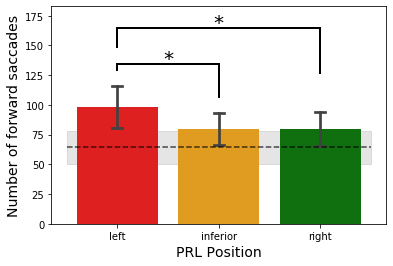

In [25]:
outcome_measure='Number_of_forward_Saccades'
my_order = ['left', 'inferior', 'right']
#plt.figure(figsize=(15,6))
sns.barplot(data=saccade_dataframe, y=outcome_measure, x='PRL_Position', ci='sd', capsize=0.1, order=my_order, palette=my_pal )
plt.ylabel('Number of forward saccades', size=14)
plt.xlabel('PRL Position', size=14)
#plt.grid()


foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[outcome_measure]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[outcome_measure].std()

xl=plt.xlim()
plt.plot((xl[0],xl[1]),(foveal_mean,foveal_mean),color='k',linestyle='--',alpha=0.7)
plt.fill_between( [xl[0],xl[1]], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )
yl=plt.ylim()
significance_bar(0,1,yl,saccade_dataframe,0.0389)
significance_bar(1,2,yl,saccade_dataframe,0.9)
significance_bar(0,2,yl,saccade_dataframe,0.0371)
# oursave('num_forward_saccades')

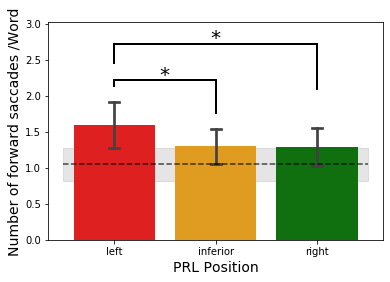

In [26]:
outcome_measure='fwd_per_word'
my_order = ['left', 'inferior', 'right']
#plt.figure(figsize=(15,6))
sns.barplot(data=saccade_dataframe, y=outcome_measure, x='PRL_Position', ci='sd', capsize=0.1, order=my_order, palette=my_pal )
plt.ylabel('Number of forward saccades /Word', size=14)
plt.xlabel('PRL Position', size=14)
# plt.grid()

foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[outcome_measure]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[outcome_measure].std()

xl=plt.xlim()
plt.plot((xl[0],xl[1]),(foveal_mean,foveal_mean),color='k',linestyle='--',alpha=0.7)
plt.fill_between( [xl[0],xl[1]], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )
yl=plt.ylim()

significance_bar(0,1,yl,saccade_dataframe,0.0415)
significance_bar(1,2,yl,saccade_dataframe,0.9)
significance_bar(0,2,yl,saccade_dataframe,0.0394)
# oursave('num_fwd_saccades_per_word')

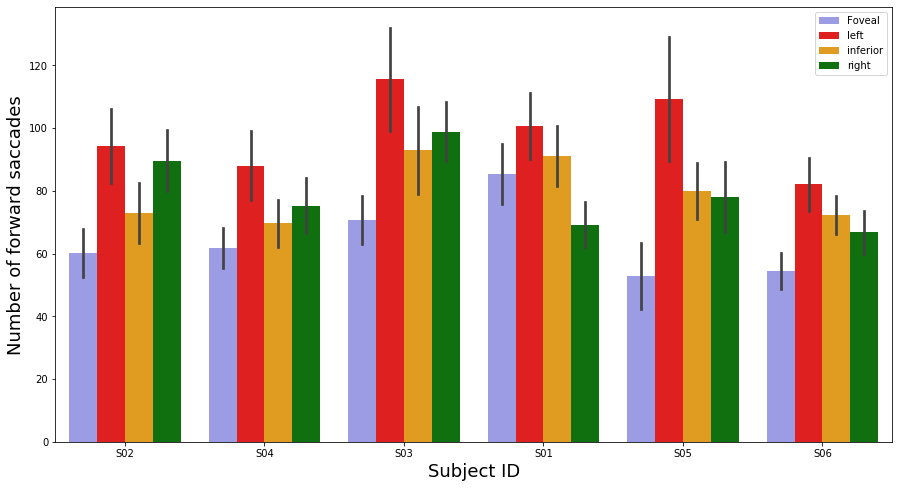

In [27]:
plt.figure(figsize=(15,8))
my_order = ['Foveal','left', 'inferior', 'right']
sns.barplot(data=saccade_dataframe,x='Subject_ID',y='Number_of_forward_Saccades',ci='sd',
            hue='PRL_Position',hue_order=my_order, palette=my_pal)
#sns.barplot(data=fixation_main,x='PRL_Position_x',y='Mean_Fixation_Duration',ci='sd',hue='Subject_ID')
plt.xlabel('Subject ID', size=18)
plt.ylabel('Number of forward saccades', size=18)
plt.legend(loc='upper right')
# oursave("Num_fwd_saccades_by_subject")

Text(0.5, 1.0, 'Forward Saccades & PRL Position')

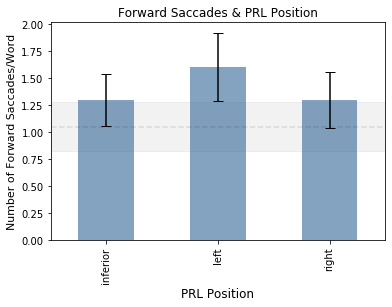

In [28]:
variable='fwd_per_word' #'Number_of_forward_Saccades'
forward_saccade_data=saccade_dataframe.query("(Training==False)& (PRL_Position!='Foveal')").groupby(['PRL_Position']).mean()[variable]
error_bar=saccade_dataframe.query("(Training==False)& (PRL_Position!='Foveal')").groupby(['PRL_Position'])[variable].std()
#plt.figure(figsize=(15,15))
foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[variable]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[variable].std()

forward_saccade_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.axhline(y=foveal_mean,color='k',linestyle='--',alpha=0.1)
plt.fill_between( [-10,10], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.05 )
plt.ylabel('Number of Forward Saccades/Word',size=11) #'Number of Forward Saccades')
plt.xlabel('PRL Position',size=12)
plt.title('Forward Saccades & PRL Position')

# savefig('Forward_saccades_prl_pos.tif',bbox_inches='tight')

In [29]:
ouranova(saccade_dataframe,'Number_of_forward_Saccades',exclude_fovea=True)

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Subject_ID  5.2708 5.0000 10.0000 0.0125

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
inferior   left    18.53 0.0389   0.8929 36.1671   True
inferior  right  -0.1701    0.9 -17.8073  17.467  False
    left  right -18.7001 0.0371 -36.3373  -1.063   True
-------------------------------------------------------
['inferior' 'left' 'right']
[0.03890938 0.9        0.03707978]


In [30]:
ouranova(saccade_dataframe,'fwd_per_word',exclude_fovea=True)

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Subject_ID  5.5490 5.0000 10.0000 0.0105

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
inferior   left   0.3037 0.0415   0.011 0.5964   True
inferior  right   -0.003    0.9 -0.2957 0.2897  False
    left  right  -0.3067 0.0394 -0.5994 -0.014   True
-----------------------------------------------------
['inferior' 'left' 'right']
[0.04149709 0.9        0.0394345 ]


 # Backward saccade data:

(0, 90)

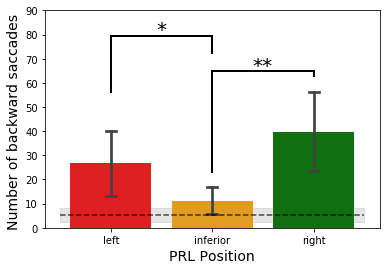

In [31]:
outcome_measure='Number_of_backward_Saccades'
my_order = ['left', 'inferior', 'right']

#plt.figure(figsize=(15,6))
sns.barplot(data=saccade_dataframe, y=outcome_measure, x='PRL_Position', ci='sd', capsize=0.1, order=my_order, palette=my_pal )
plt.ylabel('Number of backward saccades ', size=14)
plt.xlabel('PRL Position', size=14)
# plt.grid()

foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[outcome_measure]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[outcome_measure].std()

xl=plt.xlim()
plt.plot((xl[0],xl[1]),(foveal_mean,foveal_mean),color='k',linestyle='--',alpha=0.7)
plt.fill_between( [xl[0],xl[1]], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )

yl=plt.ylim()

significance_bar(0,1,yl,saccade_dataframe,0.0487,inner=True)
significance_bar(1,2,yl,saccade_dataframe,0.001,inner=True)
significance_bar(0,2,yl,saccade_dataframe,0.1109)

plt.ylim(0,90)
# oursave('Num_backward_saccades')

(0, 1.5)

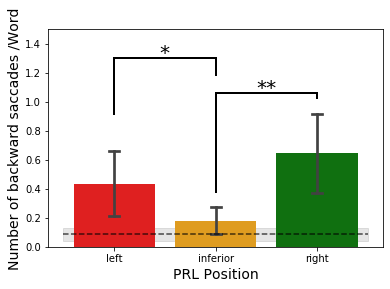

In [32]:
outcome_measure='back_per_word'
# These are okay colors
my_order = ['left', 'inferior', 'right']

#plt.figure(figsize=(15,6))
sns.barplot(data=saccade_dataframe, y=outcome_measure, x='PRL_Position', ci='sd', capsize=0.1, order=my_order, palette=my_pal )
plt.ylabel('Number of backward saccades /Word', size=14)
plt.xlabel('PRL Position', size=14)
# plt.grid()

foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[outcome_measure]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[outcome_measure].std()

xl=plt.xlim()
plt.plot((xl[0],xl[1]),(foveal_mean,foveal_mean),color='k',linestyle='--',alpha=0.7)
plt.fill_between( [xl[0],xl[1]], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )

yl=plt.ylim()

significance_bar(0,1,yl,saccade_dataframe,0.0491,inner=True)
significance_bar(1,2,yl,saccade_dataframe,0.001,inner=True)
significance_bar(0,2,yl,saccade_dataframe,0.117)

plt.ylim(0,1.5)

# oursave('backward_saccade_per_word')

Text(0.5, 0, 'Subject ID')

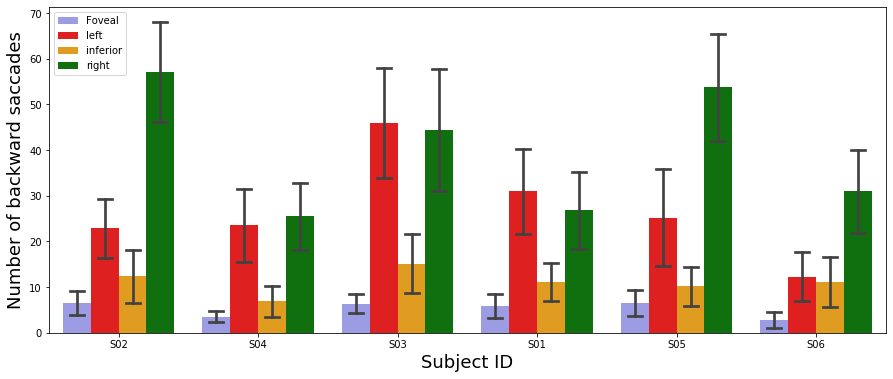

In [33]:
plt.figure(figsize=(15,6))
my_order = ['Foveal','left', 'inferior', 'right']
sns.barplot(data=saccade_dataframe, y='Number_of_backward_Saccades', x='Subject_ID', ci='sd',
            capsize=0.1,palette=my_pal, hue='PRL_Position', hue_order=my_order)

plt.legend(loc='upper left')
plt.ylabel('Number of backward saccades', size=18)
plt.xlabel('Subject ID', size=18)

# plt.grid()

# oursave("backward_saccade_by_subject")

Text(0.5, 1.0, 'Backward Saccades & PRL Position')

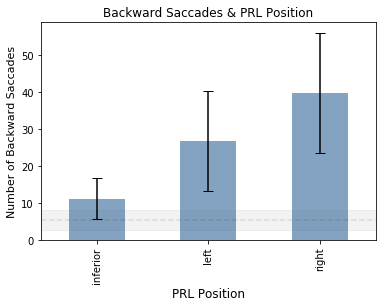

In [34]:
variable='Number_of_backward_Saccades'
backward_saccade_data=saccade_dataframe.query("(Training==False)&(PRL_Position!='Foveal')").groupby(['PRL_Position']).mean()[variable]
error_bar=saccade_dataframe.query("(Training==False)").groupby(['PRL_Position'])[variable].std()
foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[variable]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[variable].std()

backward_saccade_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.axhline(y=foveal_mean,color='k',linestyle='--',alpha=0.1)
plt.fill_between( [-10,10], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.05 )
plt.ylabel('Number of Backward Saccades',size=11)
plt.xlabel('PRL Position',size=12)
plt.title('Backward Saccades & PRL Position')

# savefig('Backward_saccades_prl_pos.tif',bbox_inches='tight')

In [35]:
ouranova(saccade_dataframe,'Number_of_backward_Saccades',exclude_fovea=True)

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Subject_ID  1.6584 5.0000 10.0000 0.2318

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
inferior   left  15.6664 0.0487  0.0812 31.2516   True
inferior  right  28.6389  0.001 13.0537 44.2241   True
    left  right  12.9724 0.1109 -2.6128 28.5576  False
------------------------------------------------------
['inferior' 'left' 'right']
[0.04873236 0.001      0.11089956]


In [36]:
ouranova(saccade_dataframe,'back_per_word',exclude_fovea=True)

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Subject_ID  1.6904 5.0000 10.0000 0.2243

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
inferior   left   0.2552 0.0491   0.001 0.5095   True
inferior  right   0.4639  0.001  0.2096 0.7182   True
    left  right   0.2087  0.117 -0.0456 0.4629  False
-----------------------------------------------------
['inferior' 'left' 'right']
[0.04906243 0.001      0.11700302]


# Saccade Amplitude: 

1. Saccade Amplitude in forward direction:left to right
2. Saccade Amplitude in backward direction /regressions: right to left

# Forward Saccade Ampltidudes:

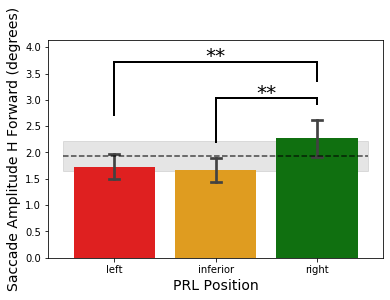

In [37]:
outcome_measure='Mean_Saccade_Amplitude_H_Forward'
# These are okay colors
my_order = [ 'left', 'inferior', 'right']

#plt.figure(figsize=(15,6))
sns.barplot(data=saccade_dataframe, y=outcome_measure, x='PRL_Position', ci='sd', capsize=0.1, order=my_order, palette=my_pal )
plt.ylabel('Saccade Amplitude H Forward (degrees)', size=14)
plt.xlabel('PRL Position', size=14)
# plt.grid()

foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[outcome_measure]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[outcome_measure].std()

xl=plt.xlim()
plt.plot((xl[0],xl[1]),(foveal_mean,foveal_mean),color='k',linestyle='--',alpha=0.7)
plt.fill_between( [xl[0],xl[1]], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )


yl=plt.ylim()

significance_bar(0,1,yl,saccade_dataframe,0.8765)#,inner=True)
significance_bar(1,2,yl,saccade_dataframe,0.0011)#,inner=True)
significance_bar(0,2,yl,saccade_dataframe,0.003)
# oursave('Saccade_amplitude_forward')

Text(0.5, 0, 'PRL Position')

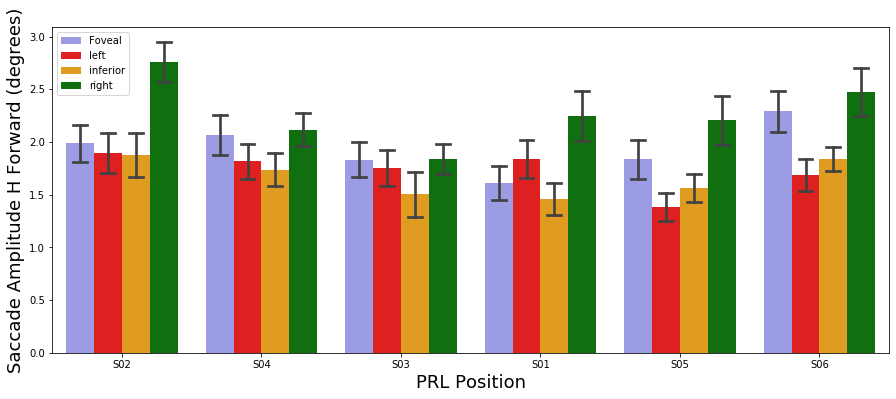

In [38]:
plt.figure(figsize=(15,6))
my_order = [ 'Foveal','left', 'inferior', 'right']
sns.barplot(data=saccade_dataframe, y='Mean_Saccade_Amplitude_H_Forward', x='Subject_ID', ci='sd',
            capsize=0.1,palette=my_pal, hue='PRL_Position', hue_order=my_order)

plt.legend(loc='upper left')
plt.ylabel('Saccade Amplitude H Forward (degrees)', size=18)
plt.xlabel('PRL Position', size=18)

# plt.grid()

# oursave("saccade_amplitude_forward_by_subject")

In [39]:
variable='Mean_Saccade_Amplitude_H_Forward'
#variable_std='SD_Saccade_Amplitude_H_Forward'
saccade_amplitude_H_data=saccade_dataframe.query("(Training==False)&(PRL_Position!='Foveal')").groupby(['PRL_Position']).mean()[variable]
error_bar=saccade_dataframe.query("(Training==False) & (PRL_Position!='Foveal')").groupby(['PRL_Position'])[variable].std()
foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[variable]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[variable].std()

saccade_amplitude_H_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.axhline(y=foveal_mean,color='k',linestyle='--',alpha=0.1)
plt.fill_between( [-10,10], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.05 )
plt.ylabel('Saccade Amplitude Forward H (Degrees)',size=11)
plt.xlabel('PRL Position',size=12)
plt.title('Saccade Amplitude & PRL Position')

savefig('saccade_amplitude_forward.tif',bbox_inches='tight')

In [40]:
ouranova(saccade_dataframe,'Mean_Saccade_Amplitude_H_Forward',exclude_fovea=True)

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Subject_ID  2.9263 5.0000 10.0000 0.0698

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
inferior   left    0.065 0.8765 -0.2855 0.4155  False
inferior  right   0.6082 0.0011  0.2577 0.9588   True
    left  right   0.5432  0.003  0.1927 0.8937   True
-----------------------------------------------------
['inferior' 'left' 'right']
[0.8765038  0.00114044 0.00297128]


# Backward Saccade/Regression Amplitudes: 

In [41]:
outcome_measure='Mean_Saccade_Amplitude_H_Backward'
# These are okay colors
my_order = [ 'left', 'inferior', 'right']

#plt.figure(figsize=(15,6))
sns.barplot(data=saccade_dataframe, y=outcome_measure, x='PRL_Position', ci='sd', capsize=0.1, order=my_order, palette=my_pal )
plt.ylabel('Backward Saccade Amplitude in degrees', size=14)
plt.xlabel('PRL Position', size=14)
# plt.grid()

# foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[outcome_measure]
# foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[outcome_measure].std()

# xl=plt.xlim()
# plt.plot((xl[0],xl[1]),(foveal_mean,foveal_mean),color='k',linestyle='--',alpha=0.5)
# plt.fill_between( [xl[0],xl[1]], [foveal_mean-foveal_std,foveal_mean-foveal_std],
#                  [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.05 )

yl=plt.ylim()

significance_bar(0,1,yl,saccade_dataframe,0.4308)#,inner=True)
significance_bar(1,2,yl,saccade_dataframe,0.6349,inverted=True)#,inner=True)
significance_bar(0,2,yl,saccade_dataframe,0.9,inverted=True)

# plt.ylim(-4.75,0.5)
# oursave('Saccade_amplitude_backward')

Text(0.5, 0, 'PRL Position')

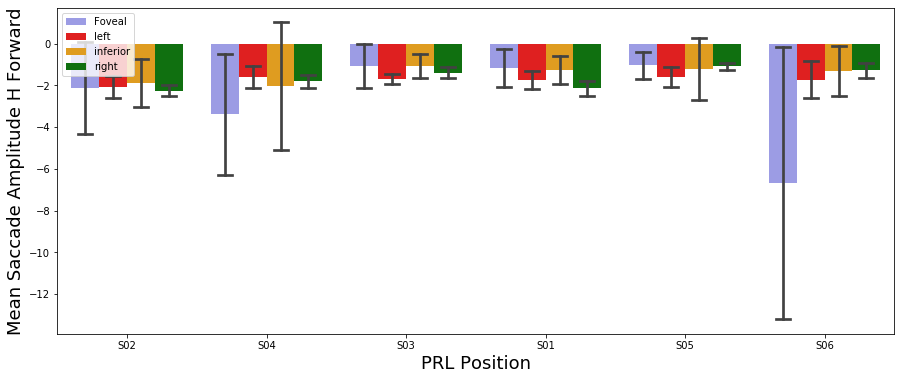

In [42]:
plt.figure(figsize=(15,6))
my_order = ['Foveal','left', 'inferior', 'right']
sns.barplot(data=saccade_dataframe, y='Mean_Saccade_Amplitude_H_Backward', x='Subject_ID', ci='sd',
            capsize=0.1,palette=my_pal, hue='PRL_Position', hue_order=my_order)

plt.legend(loc='upper left')
plt.ylabel('Mean Saccade Amplitude H Forward', size=18)
plt.xlabel('PRL Position', size=18)

# plt.grid()

# oursave("Saccade_amplitude_backward_by_subject")

In [43]:
variable='Mean_Saccade_Amplitude_H_Backward'
#variable_std='SD_Saccade_Amplitude_H_Forward'
saccade_amplitude_H_data=saccade_dataframe.query("(Training==False)&(PRL_Position!='Foveal')").groupby(['PRL_Position']).mean()[variable]
error_bar=saccade_dataframe.query("(Training==False) & (PRL_Position!='Foveal')").groupby(['PRL_Position'])[variable].std()
foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[variable]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[variable].std()

saccade_amplitude_H_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.axhline(y=foveal_mean,color='k',linestyle='--',alpha=0.1)
plt.fill_between( [-10,10], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.05 )
plt.ylabel('Saccade Amplitude Forward H (Degrees)',size=11)
plt.xlabel('PRL Position',size=12)
plt.title('Saccade Amplitude & PRL Position')

savefig('saccade_amplitude_forward.tif',bbox_inches='tight')

In [44]:
ouranova(saccade_dataframe,'Mean_Saccade_Amplitude_H_Backward',exclude_fovea=True)

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Subject_ID  3.5360 5.0000 10.0000 0.0423

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
inferior   left   -0.275 0.4308 -0.8344 0.2844  False
inferior  right  -0.1963 0.6349 -0.7557 0.3631  False
    left  right   0.0786    0.9 -0.4808  0.638  False
-----------------------------------------------------
['inferior' 'left' 'right']
[0.43082418 0.63485483 0.9       ]


# Reading Speeds 

The number of words in a page and the total time taken by the subject to complete a certain page is used to calculate the readings speeds:

Formula: Reading Speed (words per minute)= Number of words/Total time taken to finish reading the page

(0, 300)

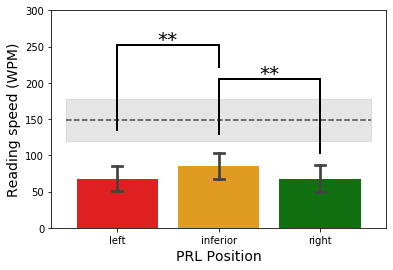

In [45]:
outcome_measure='wpm'
# These are okay colors
# Switch my_pal to be correct order for normal (L->R) reading
my_order = ['left', 'inferior', 'right']

#plt.figure(figsize=(15,6))
sns.barplot(data=fixation_dataframe, y=outcome_measure, x='PRL_Position', ci='sd', capsize=0.1, order=my_order, palette=my_pal )
plt.ylabel('Reading speed (WPM)', size=14)
plt.xlabel('PRL Position', size=14)
# plt.grid()

foveal_mean=fixation_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[outcome_measure]
foveal_std=fixation_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[outcome_measure].std()

xl=plt.xlim()
plt.plot((xl[0],xl[1]),(foveal_mean,foveal_mean),color='k',linestyle='--',alpha=0.7)
plt.fill_between( [xl[0],xl[1]], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )

yl=plt.ylim()

significance_bar(0,1,yl,fixation_dataframe,0.001,inner=True,multiply_by=0.45)
significance_bar(1,2,yl,fixation_dataframe,0.001,inner=True)
significance_bar(0,2,yl,fixation_dataframe,0.9)

plt.ylim(0,300)
# oursave('reading_speeds')

([<matplotlib.axis.YTick at 0x7fe74f321c50>,
 <a list of 7 Text yticklabel objects>)

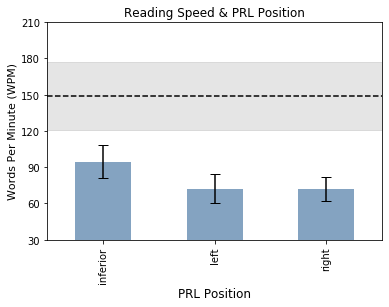

In [46]:
variable='wpm'
wpm_data=fixation_dataframe.query("(Training==False) & (PRL_Position!='Foveal')").groupby(['PRL_Position']).mean()[variable]
error_bar=fixation_dataframe.query("(Training==False)& (PRL_Position!='Foveal')").groupby(['PRL_Position'])[variable].std()
foveal_mean=fixation_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[variable]
foveal_std=fixation_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[variable].std()
wpm_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.axhline(y=foveal_mean,color='k',linestyle='--')
plt.fill_between( [-10,10], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )
plt.ylabel('Words Per Minute (WPM)',size=11)
plt.xlabel('PRL Position',size=12)
plt.title('Reading Speed & PRL Position')
plt.ylim(30,210)
plt.yticks((30,60,90,120,150,180,210))
#savefig('Reading Speed Foveal Threshold Scaled.tiff',bbox_inches='tight')

In [47]:
ouranova(fixation_dataframe,'wpm',exclude_fovea=True)

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Subject_ID  5.7930 5.0000 10.0000 0.0091

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj  lower    upper  reject
------------------------------------------------------
inferior   left -22.2522 0.001 -34.6507 -9.8537   True
inferior  right -22.2747 0.001 -34.6732 -9.8762   True
    left  right  -0.0225   0.9  -12.421  12.376  False
------------------------------------------------------
['inferior' 'left' 'right']
[0.001 0.001 0.9  ]


# Mixed Models: 

In [48]:
import statsmodels.formula.api as smf

outcome_variable='accuracy_percent'
data=merged_df
no_highlight=merged_df.query("(Training==False) & (Presentation_Mode_x=='no highlight')")
with_highlight=merged_df.query("(Training==False) & (Presentation_Mode_x=='with highlight')")
md_no_h = smf.mixedlm("accuracy_percent ~ PRL_Position_x", no_highlight, groups=no_highlight["Subject_ID_x"])
md_w_h= smf.mixedlm("accuracy_percent ~ PRL_Position_x", with_highlight, groups=with_highlight["Subject_ID_x"])
mdf_no_h = md_no_h.fit()
mdf_w_h=md_w_h.fit()
print(mdf_no_h.summary())
print(mdf_w_h.summary())


               Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  accuracy_percent
No. Observations:    432      Method:              REML            
No. Groups:          6        Scale:               4.2317          
Min. group size:     72       Likelihood:          -933.2334       
Max. group size:     72       Converged:           Yes             
Mean group size:     72.0                                          
-------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept               98.464    0.475 207.363 0.000 97.533 99.395
PRL_Position_x[T.left]  -1.233    0.242  -5.087 0.000 -1.708 -0.758
PRL_Position_x[T.right] -0.605    0.242  -2.495 0.013 -1.080 -0.130
Group Var                1.177    0.382                            

               Mixed Linear Model Regression Results
Model:   

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data=fixation_dataframe
no_highlight=fixation_dataframe.query("(Training==False) & (Presentation_Mode=='no highlight')")
with_highlight=fixation_dataframe.query("(Training==False) & (Presentation_Mode=='with highlight')")
presentation_modes_combined=fixation_dataframe.query("(Training==False)")
md_no_h = smf.mixedlm("wpm ~ PRL_Position", no_highlight, groups=no_highlight["Subject_ID"])
md_w_h= smf.mixedlm("wpm ~ PRL_Position", with_highlight, groups=with_highlight["Subject_ID"])
md_all_ppt=smf.mixedlm("wpm ~ PRL_Position",presentation_modes_combined,groups=presentation_modes_combined["Subject_ID"])
mdf_no_h = md_no_h.fit()
mdf_w_h=md_w_h.fit()
mdf_all_ppt=md_all_ppt.fit()
print(mdf_no_h.summary())
print(mdf_w_h.summary())
print(mdf_all_ppt.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     wpm       
No. Observations:     432         Method:                 REML      
No. Groups:           6           Scale:                  103.4250  
Min. group size:      72          Likelihood:             -1620.4550
Max. group size:      72          Converged:              Yes       
Mean group size:      72.0                                          
--------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept              91.725    3.184  28.812 0.000  85.485  97.965
PRL_Position[T.left]  -18.854    1.199 -15.731 0.000 -21.203 -16.505
PRL_Position[T.right] -18.111    1.199 -15.111 0.000 -20.460 -15.762
Group Var              56.503    3.624                              

               Mixed Linear Model Regression Resu

# ANOVA measures :

1. Test for normality
2. Plots density functions: To again observe for normality
2. Calculates ANOVA measure and repeate measures table with corresponding P values

(0.9654802083969116, 2.219126145064365e-06)
(0.9559386968612671, 1.225106842639434e-07)
(0.9849774241447449, 0.004137572832405567)
   Subject_ID PRL_Position  Num_Fixations
0         S01     inferior     114.750000
1         S01        right     109.604167
2         S01         left     139.229167
3         S02     inferior      94.583333
4         S02        right     153.020833
5         S02         left     119.416667
6         S03     inferior     116.708333
7         S03        right     146.416667
8         S03         left     161.812500
9         S04     inferior      90.562500
10        S04        right     113.895833
11        S04         left     121.250000
12        S05     inferior      97.333333
13        S05        right     140.229167
14        S05         left     136.500000
15        S06     inferior      96.895833
16        S06        right     119.625000
17        S06         left     113.937500
                  Anova
             F Value Num DF  Den DF Pr > F
----

array([0.01363149, 0.01903196, 0.9       ])

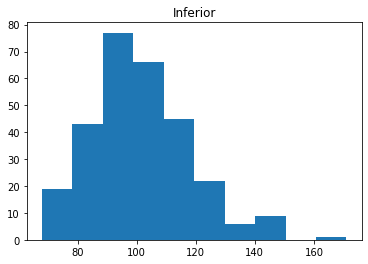

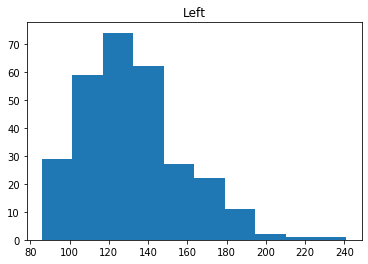

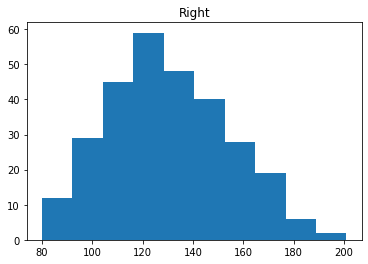

In [50]:
# First we check the normality of the distribution
from scipy.stats import shapiro
import numpy as np

fixation_df_measure='Num_Fixations' #Alter change the ANOVA measure

PRL_inferior=(fixation_dataframe.query("(Training==False) & (PRL_Position=='inferior')")[fixation_df_measure])
PRL_left=(fixation_dataframe.query("(Training==False) & (PRL_Position=='left')")[fixation_df_measure])
PRL_right=(fixation_dataframe.query("(Training==False) & (PRL_Position=='right')")[fixation_df_measure])
res_PRL_inferior=shapiro(PRL_inferior)
res_PRL_left=shapiro(PRL_left)
res_PRL_right=shapiro(PRL_right)

print(res_PRL_inferior)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(1)
plt.hist(fixation_dataframe.query("(Training==False) & (PRL_Position=='inferior')")[fixation_df_measure])
plt.title('Inferior')

#PRL Left is the only that does not satisfy normaly based 
#on SWILK test. Histogram shows a moderate to large position skew of data
print(res_PRL_left) 
# Now we plot to see if the parameters appear to also have a normal distribution
figure(2)
plt.hist(fixation_dataframe.query("(Training==False) & (PRL_Position=='left')")[fixation_df_measure])
plt.title('Left')

print(res_PRL_right)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(3)
plt.hist(fixation_dataframe.query("(Training==False) & (PRL_Position=='right')")[fixation_df_measure])
plt.title('Right')

#creating a pandas dataframe with a summary for each subject alone 
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
summary_df_fixation=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],str(fixation_df_measure):[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        mean_value=fixation_dataframe.query("(Subject_ID==@subject_id) & (Training==False) & (PRL_Position==@prl_pos)")[fixation_df_measure].mean()
        summary_df_fixation=summary_df_fixation.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,str(fixation_df_measure):mean_value},ignore_index=True)

#Now we display the summary dataframe
print(summary_df_fixation)

#Next we perform the ANOVA on the dataframe
from statsmodels.stats.anova import AnovaRM

data=summary_df_fixation
aovrm=AnovaRM(data,fixation_df_measure,'Subject_ID',within=["PRL_Position"])

res=aovrm.fit()

print(res)


#Followed by multiple comparison measures
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data[fixation_df_measure], data['PRL_Position'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

from statsmodels.stats.libqsturng import psturng
psturng(np.abs(result.meandiffs / result.std_pairs),len(result.groupsunique),result.df_total)

(0.9935407638549805, 0.25357717275619507)
(0.9925258159637451, 0.15918923914432526)
(0.9818612337112427, 0.001027289661578834)
   Subject_ID PRL_Position  Mean_Saccade_Amplitude_H_Forward
0         S01     inferior                          1.459348
1         S01        right                          2.244961
2         S01         left                          1.835957
3         S02     inferior                          1.875930
4         S02        right                          2.756953
5         S02         left                          1.897635
6         S03     inferior                          1.502721
7         S03        right                          1.838605
8         S03         left                          1.751607
9         S04     inferior                          1.737614
10        S04        right                          2.115892
11        S04         left                          1.817931
12        S05     inferior                          1.567601
13        S05      

array([0.8765038 , 0.00114044, 0.00297128])

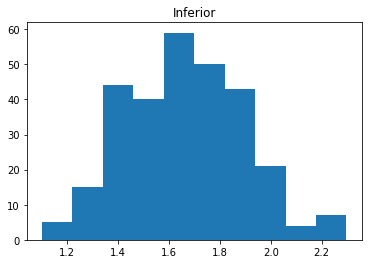

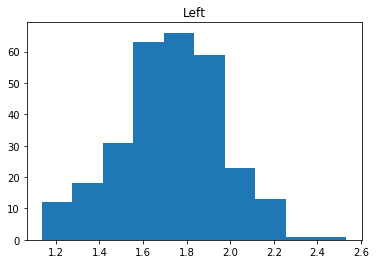

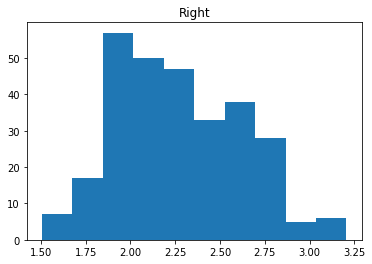

In [51]:
# First we check the normality of the distribution
from scipy.stats import shapiro
import numpy as np

saccade_df_measure='Mean_Saccade_Amplitude_H_Forward' #Alter change the ANOVA measure

PRL_inferior=(saccade_dataframe.query("(Training==False) & (PRL_Position=='inferior')")[saccade_df_measure])
PRL_left=(saccade_dataframe.query("(Training==False) & (PRL_Position=='left')")[saccade_df_measure])
PRL_right=(saccade_dataframe.query("(Training==False) & (PRL_Position=='right')")[saccade_df_measure])
res_PRL_inferior=shapiro(PRL_inferior)
res_PRL_left=shapiro(PRL_left)
res_PRL_right=shapiro(PRL_right)

print(res_PRL_inferior)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(1)
plt.hist(saccade_dataframe.query("(Training==False) & (PRL_Position=='inferior')")[saccade_df_measure])
plt.title('Inferior')

#PRL Left is the only that does not satisfy normaly based 
#on SWILK test. Histogram shows a moderate to large position skew of data
print(res_PRL_left) 
# Now we plot to see if the parameters appear to also have a normal distribution
figure(2)
plt.hist(saccade_dataframe.query("(Training==False) & (PRL_Position=='left')")[saccade_df_measure])
plt.title('Left')

print(res_PRL_right)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(3)
plt.hist(saccade_dataframe.query("(Training==False) & (PRL_Position=='right')")[saccade_df_measure])
plt.title('Right')

#creating a pandas dataframe with a summary for each subject alone 
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
summary_df_saccade=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],str(saccade_df_measure):[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        mean_value=saccade_dataframe.query("(Subject_ID==@subject_id) & (Training==False) & (PRL_Position==@prl_pos)")[saccade_df_measure].mean()
        summary_df_saccade=summary_df_saccade.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,str(saccade_df_measure):mean_value},ignore_index=True)

#Now we display the summary dataframe
print(summary_df_saccade)

#Next we perform the ANOVA on the dataframe
from statsmodels.stats.anova import AnovaRM

data=summary_df_saccade
aovrm=AnovaRM(data,saccade_df_measure,'Subject_ID',within=["PRL_Position"])

res=aovrm.fit()

print(res)


#Followed by multiple comparison measures
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data[saccade_df_measure], data['PRL_Position'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

from statsmodels.stats.libqsturng import psturng
psturng(np.abs(result.meandiffs / result.std_pairs),len(result.groupsunique),result.df_total)

(0.7281867265701294, 2.168321497662783e-21)
(0.8729835748672485, 1.071092812967439e-14)
(0.8637338280677795, 2.940577790896395e-15)
   Subject_ID PRL_Position  accuracy_percent
0         S01     inferior         99.213233
1         S01        right         98.887179
2         S01         left         99.318132
3         S02     inferior         98.755241
4         S02        right         98.459147
5         S02         left         97.909732
6         S03     inferior         98.175146
7         S03        right         97.432354
8         S03         left         95.968912
9         S04     inferior         99.189650
10        S04        right         96.446475
11        S04         left         97.137871
12        S05     inferior         98.218818
13        S05        right         97.823272
14        S05         left         93.884005
15        S06     inferior         99.429995
16        S06        right         98.763017
17        S06         left         99.347733
             

array([0.14784223, 0.53160243, 0.64185735])

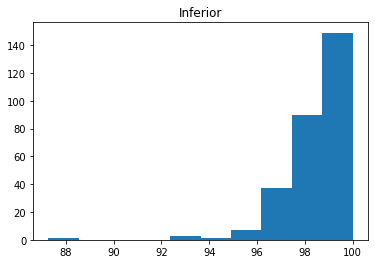

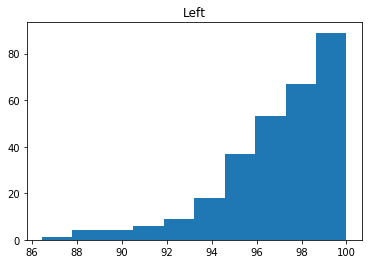

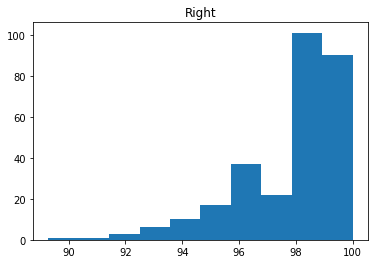

In [52]:
# First we check the normality of the distribution
from scipy.stats import shapiro
import numpy as np

merged_df_measure='accuracy_percent' #Alter change the ANOVA measure

PRL_inferior=(merged_df.query("(Training==False) & (PRL_Position_x=='inferior')")[merged_df_measure])
PRL_left=(merged_df.query("(Training==False) & (PRL_Position_x=='left')")[merged_df_measure])
PRL_right=(merged_df.query("(Training==False) & (PRL_Position_x=='right')")[merged_df_measure])
res_PRL_inferior=shapiro(PRL_inferior)
res_PRL_left=shapiro(PRL_left)
res_PRL_right=shapiro(PRL_right)

print(res_PRL_inferior)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(1)
plt.hist(merged_df.query("(Training==False) & (PRL_Position_x=='inferior')")[merged_df_measure])
plt.title('Inferior')

#PRL Left is the only that does not satisfy normaly based 
#on SWILK test. Histogram shows a moderate to large position skew of data
print(res_PRL_left) 
# Now we plot to see if the parameters appear to also have a normal distribution
figure(2)
plt.hist(merged_df.query("(Training==False) & (PRL_Position_x=='left')")[merged_df_measure])
plt.title('Left')

print(res_PRL_right)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(3)
plt.hist(merged_df.query("(Training==False) & (PRL_Position_x=='right')")[merged_df_measure])
plt.title('Right')

#creating a pandas dataframe with a summary for each subject alone 
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
summary_df_accuracy=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],str(merged_df_measure):[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        mean_value=merged_df.query("(Subject_ID_x==@subject_id) & (Training==False) & (PRL_Position_x==@prl_pos)")[merged_df_measure].mean()
        summary_df_accuracy=summary_df_accuracy.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,str(merged_df_measure):mean_value},ignore_index=True)

#Now we display the summary dataframe
print(summary_df_accuracy)

#Next we perform the ANOVA on the dataframe
from statsmodels.stats.anova import AnovaRM

data=summary_df_accuracy
aovrm=AnovaRM(data,merged_df_measure,'Subject_ID',within=["PRL_Position"])

res=aovrm.fit()

print(res)


#Followed by multiple comparison measures
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data[merged_df_measure], data['PRL_Position'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

from statsmodels.stats.libqsturng import psturng
psturng(np.abs(result.meandiffs / result.std_pairs),len(result.groupsunique),result.df_total)

In [53]:
# First we check the normality of the distribution
from scipy.stats import shapiro
import numpy as np

PRL_inferior=(saccade_dataframe.query("(Training==False) & (PRL_Position=='inferior')")["fwd_per_word"])
PRL_left=(saccade_dataframe.query("(Training==False) & (PRL_Position=='left')")["fwd_per_word"])
PRL_right=(saccade_dataframe.query("(Training==False) & (PRL_Position=='right')")["fwd_per_word"])
res_PRL_inferior=shapiro(PRL_inferior)
res_PRL_left=shapiro(PRL_left)
res_PRL_right=shapiro(PRL_right)

print(res_PRL_inferior) # Shows mild positive skewness 
print(res_PRL_left)# 
print(res_PRL_right) # 

(0.9611986875534058, 5.762313435297983e-07)
(0.9643351435661316, 1.595076923877059e-06)
(0.9608834385871887, 5.234822992861154e-07)


(array([21., 56., 51., 30., 48., 29., 25., 14.,  8.,  6.]),
 array([0.84931507, 0.96605023, 1.08278539, 1.19952055, 1.31625571,
        1.43299087, 1.54972603, 1.66646119, 1.78319635, 1.89993151,
        2.01666667]),
 <a list of 10 Patch objects>)

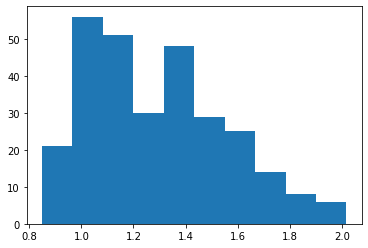

In [54]:
plt.hist(saccade_dataframe.query("(Training==False) & (PRL_Position=='right')")['fwd_per_word'])

In [55]:
#creating a pandas dataframe with a summary for each subject alone 
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
summary_df_saccades=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],'fwd_per_word':[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        num_saccades_mean=saccade_dataframe.query("(Subject_ID==@subject_id) & (Training==False) & (PRL_Position==@prl_pos)")['fwd_per_word'].mean()
        summary_df_saccades=summary_df_saccades.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,'fwd_per_word':num_saccades_mean},ignore_index=True)

In [56]:
sns.barplot(x='PRL_Position',y='wpm',data=fixation_dataframe,hue='Subject_ID')

In [57]:
summary_df_saccades

Subject_ID PRL_Position  fwd_per_word
0         S01     inferior      1.480676
1         S01        right      1.126548
2         S01         left      1.637648
3         S02     inferior      1.183816
4         S02        right      1.457843
5         S02         left      1.531193
6         S03     inferior      1.517599
7         S03        right      1.613202
8         S03         left      1.895276
9         S04     inferior      1.129747
10        S04        right      1.224468
11        S04         left      1.430242
12        S05     inferior      1.301401
13        S05        right      1.261511
14        S05         left      1.772543
15        S06     inferior      1.166382
16        S06        right      1.078071
17        S06         left      1.334932

In [58]:
from statsmodels.stats.anova import AnovaRM

data=summary_df_saccades
aovrm=AnovaRM(data,'fwd_per_word','Subject_ID',within=["PRL_Position"])

res=aovrm.fit()

print(res)

                  Anova
             F Value Num DF  Den DF Pr > F
------------------------------------------
PRL_Position 12.2995 2.0000 10.0000 0.0020



In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['fwd_per_word'], data['PRL_Position'])
res = mc.tukeyhsd()
 
print(res)
print(mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
inferior   left   0.3037 0.0415   0.011 0.5964   True
inferior  right   -0.003    0.9 -0.2957 0.2897  False
    left  right  -0.3067 0.0394 -0.5994 -0.014   True
-----------------------------------------------------
['inferior' 'left' 'right']


In [60]:
from statsmodels.stats.libqsturng import psturng
psturng(np.abs(res.meandiffs / res.std_pairs),len(res.groupsunique),res.df_total)

array([0.04149709, 0.9       , 0.0394345 ])

# Line by Line Analysis:

The backward saccades from the experiment are plotted and we classify them as either:
Sweeps/ correction saccades/ regressions or broken up saccades that would have originally been a part of a sweep

The first set of code loops through each folder in the data folder and creates dataframes &/ writes files on the fly. Hence, these commands need to be run only once in order to generate the dataframe and in order to do that the regenerate variable at the top of each cell has to be set to TRUE. 


In [61]:
# NOTE: should be run only once (creates new set of files)
# Purpose : Cleans up the saccade events by removing the sweeps, correction and rejected saccades and writes it to a seperate file 
#CAUTION: Creates new set of files when run!!

regenerate=False

# Only repeats or recreates the files when regenerate is turned to true
while regenerate==True:
    filedir_list=[]
    for root,dirs,fils in os.walk(data_directory):
        filedir_list.append(root)

    for path in filedir_list:
        for filename in os.listdir(path):
            if 'eyetrace_events__MNH_saccades' in filename:                
                sweep_filename=r'sweep_dataframe%s'%(filename[filename.find('_S0'):-8])
                correction_saccade_filename=r'correction_saccades%s'%(filename[filename.find('_S0'):-8])
                rejected_saccade_filename=r'rejected_saccades%s'%(filename[filename.find('_S0'):-8])

                try:
                    saccade_data_filename=os.path.join(path,filename)
                    sweep_data_filename=os.path.join(path,sweep_filename)
                    correction_saccade_data_filename=os.path.join(path,correction_saccade_filename)
                    rejected_saccade_data_filename=os.path.join(path,rejected_saccade_filename)

                    saccade_fileopen=open(saccade_data_filename,'r')
                    saccade_file=saccade_fileopen.readlines()
                    original_saccade_file_length=(len(saccade_file))

                    sweep_fileopen=open(sweep_data_filename,'r')
                    correction_saccade_fileopen=open(correction_saccade_data_filename,'r')
                    rejected_saccade_fileopen=open(rejected_saccade_data_filename,'r')

                    sweep_file=sweep_fileopen.readlines()

                    correction_saccade_file=correction_saccade_fileopen.readlines()
                    correction_saccade_file_expanded=[]
                    for i in range(len(correction_saccade_file)):
                        correction_saccade_line_data=correction_saccade_file[i].split('\t')
                        if '0' in correction_saccade_line_data[0:7]:
                            pass
                        else:
                            correction_saccade_file_expanded+=[str('\t'.join(correction_saccade_line_data[0:7]))+'\t\n']
                            if '0' in correction_saccade_line_data[7::]:
                                pass
                            else:
                                correction_saccade_file_expanded+=[str('\t'.join(correction_saccade_line_data[7::]))+'\t\n']

                    rejected_saccade_file=rejected_saccade_fileopen.readlines()

                    saccade_for_removal=sweep_file+correction_saccade_file_expanded+rejected_saccade_file

                    data_point_removal_counter=0
                    for element in saccade_for_removal:
                        if 'Time' in element:
                            pass
                        elif element in saccade_file:
                            saccade_file.remove(element)
                            data_point_removal_counter+=1

                    new_saccade_file_length=len(saccade_file)
                    if original_saccade_file_length==(data_point_removal_counter+new_saccade_file_length):
                        saccade_file_without_sweep_filename=os.path.join(path,('saccade_event_without_sweep_%s.txt'%(filename[filename.find('S0'):-8])))
                        saccade_file_without_sweep=open(saccade_file_without_sweep_filename,"w")
                        for k in range(new_saccade_file_length):
                            saccade_file_without_sweep.write(saccade_file[k])
                        print(saccade_file_without_sweep_filename)
                    else:
                        print('Mismatch Noted!!!')

                    saccade_fileopen.close()
                    sweep_fileopen.close()
                    correction_saccade_fileopen.close()
                    rejected_saccade_fileopen.close()
                    saccade_file_without_sweep.close()
                except FileNotFoundError:
                    print('File Missing')
        
        #set regenerate to false to stop the loop:
        regenerate=False


In [168]:
line_by_line_raw_data.columns.values

array(['Time', 'Pos x', 'Pos y', 'Pupil 1', 'Pupil 2', 'Line_num',
       'Filename', 'Subject_ID', 'Session_num', 'Trial_num',
       'PRL_Position', 'Presentation_Mode'], dtype=object)

In [198]:
# Purpose: To segregate the eye movement files by line (so should get 8 set of files for each file as there are 8 lines on each page)
# The following steps are to be performed during the parsing phase:
#1. Separate the saccade files that are devoid of sweeps line by line using the X postion for each event (the x position right after a sweep would be lot smaller than the one before)
#2. Separate the raw data files and the fixation files using the start and end time stamp from the segregated saccade files

regenerate=True

# Only repeats or recreates the files when regenerate is turned to true
while regenerate==True:
    filedir_list=[]
    for root,dirs,fils in os.walk(data_directory):
        filedir_list.append(root)
        
    line_by_line_raw_data=pd.DataFrame()
    line_by_line_fixation_data=pd.DataFrame()
#     line_by_line_raw_data=pd.DataFrame({'Time':[],'Pos X':[],'Pos y':[],'Pupil 1':[],'Pupil 2':[],'Line_num':[],'Filename':[],'Subject_ID':[],\
#                         'PRL_Position':[],'Presentation_Mode':[],'Session_num':[],'Trial_num':[]})    
#     line_by_line_fixation_data=pd.DataFrame({'Time Start':[],'Time End':[],'Fixation_Duration':[],'Pos x':[],'Pos y':[],'Unnamed:':[],'Line_num':[],\
#                                              'Filename':[],'Subject_ID':[],'PRL_Position':[],'Presentation_Mode':[],'Session_num':[],'Trial_num':[]})  

    for filename in os.listdir(path):
            if 'saccade_event_without_sweep' in filename:
                print(filename)
                if "inferior" in path.lower():
                    prl_position='inferior'
                elif "left" in path.lower():
                    prl_position='left'
                elif "right" in path.lower():
                    prl_position='right'
                elif "foveal" in path.lower():
                    prl_position='foveal'

                #identifies whether a word highlight was used or not
                if "guides" in path.lower():
                    highlight='with highlight'
                elif "foveal" in path.lower():
                    prl_position="Foveal"
                    highlight="N/A"
                else:
                    highlight='no highlight'

                #identifies if it is a training session or main experiment
                if "training" in root.lower():
                    continue
                               
                subject_id=filename[filename.find('_S')+1:filename.find('_S')+4]
                session_num=filename[filename.find('_T')-1]
                trial_num=filename[filename.find('_T')+2:-8]
                full_path=os.path.join(path,filename)
                saccade_file=pd.read_csv(full_path,delimiter='\t',skiprows=0,index_col=False,error_bad_lines=False)
                new_line_start_threshold=500
                line_pos=[]
                while len(line_pos)<7:
                    line_pos=[]
                    for i in range(len(saccade_file)):
                        if i == 0: #to omit the first row of the dataframe
                            pass
                        else:
                            prev_x=saccade_file.iloc[i-1,3]
                            current_x=saccade_file.iloc[i,3]
                            if (prev_x) - (current_x)>new_line_start_threshold:
                                line_pos.append(i)
                    new_line_start_threshold=new_line_start_threshold - 50

                line_1_saccade_df=saccade_file.iloc[0:line_pos[0],:]
                line_2_saccade_df=saccade_file.iloc[line_pos[0]:line_pos[1],:]
                line_3_saccade_df=saccade_file.iloc[line_pos[1]:line_pos[2],:]
                line_4_saccade_df=saccade_file.iloc[line_pos[2]:line_pos[3],:]
                line_5_saccade_df=saccade_file.iloc[line_pos[3]:line_pos[4],:]
                line_6_saccade_df=saccade_file.iloc[line_pos[4]:line_pos[5],:]
                line_7_saccade_df=saccade_file.iloc[line_pos[5]:line_pos[6],:]
                line_8_saccade_df=saccade_file.iloc[line_pos[6]:,:]
                

                line_1_time_start=line_1_saccade_df['Time Start'].iloc[0]
                line_2_time_start=line_2_saccade_df['Time Start'].iloc[0]
                line_3_time_start=line_3_saccade_df['Time Start'].iloc[0]
                line_4_time_start=line_4_saccade_df['Time Start'].iloc[0]
                line_5_time_start=line_5_saccade_df['Time Start'].iloc[0]
                line_6_time_start=line_6_saccade_df['Time Start'].iloc[0]
                line_7_time_start=line_7_saccade_df['Time Start'].iloc[0]
                line_8_time_start=line_8_saccade_df['Time Start'].iloc[0]

                line_1_time_end=line_1_saccade_df['Time Start'].iloc[-1]
                line_2_time_end=line_2_saccade_df['Time Start'].iloc[-1]
                line_3_time_end=line_3_saccade_df['Time Start'].iloc[-1]
                line_4_time_end=line_4_saccade_df['Time Start'].iloc[-1]
                line_5_time_end=line_5_saccade_df['Time Start'].iloc[-1]
                line_6_time_end=line_6_saccade_df['Time Start'].iloc[-1]
                line_7_time_end=line_7_saccade_df['Time Start'].iloc[-1]
                line_8_time_end=line_8_saccade_df['Time Start'].iloc[-1]

                saccade_2_raw_data_path=path+('/sorted_samples%s.asc.txt'%(filename[filename.find('_S0'):-4]))
                saccade_2_fixation_data_path=path+('/eyetrace_events_MNH_fixation%s.asc.txt'%(filename[filename.find('_S0'):-4]))
                
                raw_data_file=pd.read_csv(saccade_2_raw_data_path,delimiter='\t',skiprows=1,header=None, index_col=False,error_bad_lines=False,names=["Time","Pos x","Pos y","Pupil 1","Pupil 2"])
                raw_data_line_1 = raw_data_file[(raw_data_file['Time'] > line_1_time_start) & (raw_data_file['Time'] <line_1_time_end)]
                raw_data_line_1['Line_num']=1
                raw_data_line_2 = raw_data_file[(raw_data_file['Time'] > line_2_time_start) & (raw_data_file['Time'] <line_2_time_end)]
                raw_data_line_2['Line_num']=2
                raw_data_line_3 = raw_data_file[(raw_data_file['Time'] > line_3_time_start) & (raw_data_file['Time'] <line_3_time_end)]
                raw_data_line_3['Line_num']=3
                raw_data_line_4 = raw_data_file[(raw_data_file['Time'] > line_4_time_start) & (raw_data_file['Time'] <line_4_time_end)]
                raw_data_line_4['Line_num']=4
                raw_data_line_5 = raw_data_file[(raw_data_file['Time'] > line_5_time_start) & (raw_data_file['Time'] <line_5_time_end)]
                raw_data_line_5['Line_num']=5
                raw_data_line_6 = raw_data_file[(raw_data_file['Time'] > line_6_time_start) & (raw_data_file['Time'] <line_6_time_end)]
                raw_data_line_6['Line_num']=6
                raw_data_line_7 = raw_data_file[(raw_data_file['Time'] > line_7_time_start) & (raw_data_file['Time'] <line_7_time_end)]
                raw_data_line_7['Line_num']=7
                raw_data_line_8 = raw_data_file[(raw_data_file['Time'] > line_8_time_start) & (raw_data_file['Time'] <line_8_time_end)]
                raw_data_line_8['Line_num']=8
                
                line_by_line_raw_data_per_file=pd.concat([raw_data_line_1,raw_data_line_2,raw_data_line_3,raw_data_line_4,\
                         raw_data_line_5,raw_data_line_6,raw_data_line_7,raw_data_line_8])
                
                
                line_by_line_raw_data_per_file['Filename']=filename
                line_by_line_raw_data_per_file['Subject_ID']=subject_id
                line_by_line_raw_data_per_file['PRL_Position']=prl_position
                line_by_line_raw_data_per_file['Presentation_Mode']=highlight
                line_by_line_raw_data_per_file['Session_num']=session_num
                line_by_line_raw_data_per_file['Trial_num']=trial_num
                
                fixation_data_file=pd.read_csv(saccade_2_fixation_data_path,delimiter='\t',skiprows=0,index_col=False,error_bad_lines=False)
                fixation_data_line_1 = fixation_data_file[(fixation_data_file['Time Start'] > line_1_time_start) & (fixation_data_file['Time End'] <line_1_time_end)]
                fixation_data_line_1['Line_num']=1
                fixation_data_line_2 = fixation_data_file[(fixation_data_file['Time Start'] > line_2_time_start) & (fixation_data_file['Time End'] <line_2_time_end)]
                fixation_data_line_2['Line_num']=2
                fixation_data_line_3 = fixation_data_file[(fixation_data_file['Time Start'] > line_3_time_start) & (fixation_data_file['Time End'] <line_3_time_end)]
                fixation_data_line_3['Line_num']=3
                fixation_data_line_4 = fixation_data_file[(fixation_data_file['Time Start'] > line_4_time_start) & (fixation_data_file['Time End'] <line_4_time_end)]
                fixation_data_line_4['Line_num']=4
                fixation_data_line_5 = fixation_data_file[(fixation_data_file['Time Start'] > line_5_time_start) & (fixation_data_file['Time End'] <line_5_time_end)]
                fixation_data_line_5['Line_num']=5
                fixation_data_line_6 = fixation_data_file[(fixation_data_file['Time Start'] > line_6_time_start) & (fixation_data_file['Time End'] <line_6_time_end)]
                fixation_data_line_6['Line_num']=6
                fixation_data_line_7 = fixation_data_file[(fixation_data_file['Time Start'] > line_7_time_start) & (fixation_data_file['Time End'] <line_7_time_end)]
                fixation_data_line_7['Line_num']=7
                fixation_data_line_8 = fixation_data_file[(fixation_data_file['Time Start'] > line_8_time_start) & (fixation_data_file['Time End'] <line_8_time_end)]
                fixation_data_line_8['Line_num']=8 

                line_by_line_fixation_data_per_file=pd.concat([fixation_data_line_1,fixation_data_line_2,fixation_data_line_3,fixation_data_line_4,\
                         fixation_data_line_5,fixation_data_line_6,fixation_data_line_7,fixation_data_line_8])
                
                line_by_line_fixation_data_per_file['Filename']=filename
                line_by_line_fixation_data_per_file['Subject_ID']=subject_id
                line_by_line_fixation_data_per_file['PRL_Position']=prl_position
                line_by_line_fixation_data_per_file['Presentation_Mode']=highlight
                line_by_line_fixation_data_per_file['Session_num']=session_num
                line_by_line_fixation_data_per_file['Trial_num']=trial_num
                
                line_by_line_raw_data=pd.concat([line_by_line_raw_data,line_by_line_raw_data_per_file])
                line_by_line_fixation_data=pd.concat([line_by_line_fixation_data,line_by_line_fixation_data_per_file])
                
    #set regenerate to false to stop the loop:
    regenerate=False                


saccade_event_without_sweep_S06_2_T16_000.txt
saccade_event_without_sweep_S06_2_T22_000.txt
saccade_event_without_sweep_S06_2_T18_000.txt
saccade_event_without_sweep_S06_2_T19_000.txt


/usr/lib/python3/dist-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/lib/python3/dist-packages/ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/lib/python3/dist-packages/ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

saccade_event_without_sweep_S06_2_T13_000.txt
saccade_event_without_sweep_S06_2_T14_000.txt
saccade_event_without_sweep_S06_2_T15_000.txt
saccade_event_without_sweep_S06_2_T21_000.txt
saccade_event_without_sweep_S06_2_T12_000.txt
saccade_event_without_sweep_S06_2_T20_000.txt
saccade_event_without_sweep_S06_2_T17_000.txt
saccade_event_without_sweep_S06_2_T23_000.txt


In [201]:
data_directory

'/tmp/hd/Reading_experiment/Reading Data/reading/Results/Experiment 2 King Devick Mode/All Subjects/Raw Data'

(0, 1024)

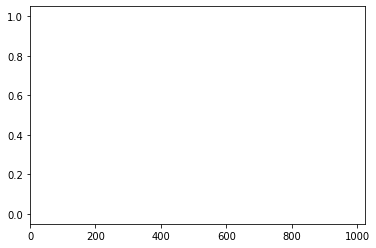

In [158]:
line_num=1
trial_num='1'
session_num='1'
prl_pos='right'
subject_id='S06'
data=line_by_line_raw_data.query("(Subject_ID==@subject_id) & (Line_num==@line_num) & (Trial_num==@trial_num) & (Session_num==@session_num) & (PRL_Position==@prl_pos)")
plt.plot(data['Pos x'],data['Time'],'.')
plt.xlim([0,1024])


In [160]:
line_by_line_fixation_data

Time Start    Time End  Fixation Duration   Pos x   Pos y  Unnamed: 5  \
1    17206700.0  17206900.0                229  135.20  135.20         NaN   
2    17206900.0  17207100.0                152  176.40  176.40         NaN   
3    17207200.0  17207400.0                127  189.40  189.40         NaN   
4    17207400.0  17207700.0                263  252.40  252.40         NaN   
5    17207700.0  17207900.0                147  296.45  296.45         NaN   
..          ...         ...                ...     ...     ...         ...   
98   17237500.0  17237700.0                161  442.75  442.75         NaN   
99   17237700.0  17237900.0                197  468.35  468.35         NaN   
100  17238000.0  17238300.0                338  491.35  491.35         NaN   
101  17238400.0  17238700.0                325  542.65  542.65         NaN   
102  17238800.0  17239000.0                210  605.25  605.25         NaN   

     Line_num                                       Filename Subject_ID  \
1           1  saccade_event_without_sweep_S06_2_T23_000.txt        S06   
2           1  saccade_event_without_sweep_S06_2_T23_000.txt        S06   
3           1  saccade_event_without_sweep_S06_2_T23_000.txt        S06   
4           1  saccade_event_without_sweep_S06_2_T23_000.txt        S06   
5           1  saccade_event_without_sweep_S06_2_T23_000.txt        S06   
..        ...                                            ...        ...   
98          8  saccade_event_without_sweep_S06_2_T23_000.txt        S06   
99          8  saccade_event_without_sweep_S06_2_T23_000.txt        S06   
100         8  saccade_event_without_sweep_S06_2_T23_000.txt        S06   
101         8  saccade_event_without_sweep_S06_2_T23_000.txt        S06   
102         8  saccade_event_without_sweep_S06_2_T23_000.txt        S06   

    Session_num Trial_num PRL_Position Presentation_Mode  
1             2        23     inferior    with highlight  
2             2        23     inferior    with highlight  
3             2        23     inferior    with highlight  
4             2        23     inferior    with highlight  
5             2        23     inferior    with highlight  
..          ...       ...          ...               ...  
98            2        23     inferior    with highlight  
99            2        23     inferior    with highlight  
100           2        23     inferior    with highlight  
101           2        23     inferior    with highlight  
102           2        23     inferior    with highlight  

[76 rows x 13 columns]

In [111]:
# Purpose: To create a dataframe that counts the number of reversals that occur in the saccade direction in each trial

regenerate=True

while regenerate==True:
    filedir_list=[]
    for root,dirs,fils in os.walk(data_directory):
        filedir_list.append(root)

    saccade_without_sweep_dataframe=pd.DataFrame({'Filename':[],'Subject_ID':[],'PRL_Position':[],'Presentation_Mode':[],'Num_reversals':[],'Num_Saccades':[]})
    for path in filedir_list:
        for filename in os.listdir(path):
            if 'saccade_event_without_sweep' in filename:
                if "inferior" in path.lower():
                    prl_position='inferior'
                elif "left" in path.lower():
                    prl_position='left'
                elif "right" in path.lower():
                    prl_position='right'
                elif "foveal" in path.lower():
                    prl_position='foveal'

                #identifies whether a word highlight was used or not
                if "guides" in path.lower():
                    highlight='with highlight'
                elif "foveal" in path.lower():
                    prl_position="Foveal"
                    highlight="N/A"
                else:
                    highlight='no highlight'

                #identifies if it is a training session or main experiment
                if "training" in root.lower():
                    continue
                               
                subject_id=filename[filename.find('_S')+1:filename.find('_S')+4]
                
                saccade_data_no_sweep_path=os.path.join(path,filename)
                saccade_data_no_sweep=pd.read_csv(saccade_data_no_sweep_path,delimiter='\t',skiprows=0,index_col=False,error_bad_lines=False)
                
                x_start=saccade_data_no_sweep['Pos x(start)']
                x_end=saccade_data_no_sweep['Pos x(end)']
                diff_x=x_end - x_start
                
                y_start=saccade_data_no_sweep['Pos y(start)']
                y_end=saccade_data_no_sweep['Pos y(end)']
                diff_y= y_end - y_start
                
                reversal=np.sum(np.array(np.sign(diff_x[1:]))*np.array(np.sign(diff_x[:-1])))
                
                saccade_file_length=len(saccade_data_no_sweep)
                
                saccade_without_sweep_dataframe=saccade_without_sweep_dataframe.append({'Filename':filename,'Subject_ID':subject_id,'PRL_Position':prl_position,\
                                                         'Presentation_Mode':highlight,'Num_reversals':reversal,'Num_Saccades':saccade_file_length},ignore_index=True)
        regenerate=False

In [112]:
# Note: Needs to be run only one time

#Purpose: Creates a single dataframe that consists of all the sweep data from all the subjects


regenerate=True

while regenerate==True:
    filedir_list=[]
    #data_directory=('/tmp/hd/Reading_experiment/Reading Data/reading/Results/Experiment 2 King Devick Mode/All Subjects/Raw Data')
    for root,dirs,fils in os.walk(data_directory):
        filedir_list.append(root)

    sweep_dataframe=pd.DataFrame({'Filename':[],'Subject_ID':[],'PRL_Position':[],'Presentation_Mode':[],'Line_Number':[],\
                                  'Time Start':[],'Time End':[],'Saccade Duration':[],'Pos x(start)':[],'Pos y(start)':[],\
                                  'Pos x(end)':[],'Pos y(end)':[],'Code':[]})
    for path in filedir_list:
        for filename in os.listdir(path):
            if 'sweep_dataframe' in filename:
                if "inferior" in path.lower():
                    prl_position='inferior'
                elif "left" in path.lower():
                    prl_position='left'
                elif "right" in path.lower():
                    prl_position='right'
                elif "foveal" in path.lower():
                    prl_position='foveal'

                #identifies whether a word highlight was used or not
                if "guides" in path.lower():
                    highlight='with highlight'
                elif "foveal" in path.lower():
                    prl_position="Foveal"
                    highlight="N/A"
                else:
                    highlight='no highlight'

                #identifies if it is a training session or main experiment
                if "training" in root.lower():
                    continue

                sweep_data_path=os.path.join(path,filename)
                sweep_data=pd.read_csv(sweep_data_path,delimiter='\t',skiprows=0,index_col=False,error_bad_lines=False)

                for i in range (0,7):
                    line_num=i+1
                    subject_id=filename[filename.find('_S')+1:filename.find('_S')+4]
                    trial_code='%s%s%s_Line%s'%(subject_id,'_',prl_position,line_num)
                    sweep_start_timestamp=sweep_data.iloc[i,0]
                    try:
                        sweep_dataframe=sweep_dataframe.append({'Filename':filename,'Subject_ID':subject_id,'PRL_Position':prl_position,\
                                                            'Presentation_Mode':highlight,'Line_Number':line_num,\
                                                            'Time Start':sweep_data.iloc[i,0],'Time End':sweep_data.iloc[i,1],\
                                                            'Saccade Duration':sweep_data.iloc[i,2],\
                                                            'Pos x(start)':sweep_data.iloc[i,3],'Pos y(start)':sweep_data.iloc[i,4],\
                                                            'Pos x(end)':sweep_data.iloc[i,5],'Pos y(end)':sweep_data.iloc[i,6],\
                                                            'Code':trial_code},ignore_index=True)
                    except (TypeError, IndexError) as e:                   
                        sweep_dataframe=sweep_dataframe.append({'Filename':filename,'Subject_ID':subject_id,'PRL_Position':prl_position,\
                                                            'Presentation_Mode':highlight,'Line_Number':line_num,\
                                                            'Time Start':sweep_data.iloc[i,0],'Time End':sweep_data.iloc[i,1],\
                                                            'Saccade Duration':sweep_data.iloc[i,2],\
                                                            'Pos x(start)':sweep_data.iloc[i,3],'Pos y(start)':sweep_data.iloc[i,4],\
                                                            'Pos x(end)':sweep_data.iloc[i,5],'Pos y(end)':sweep_data.iloc[i,6],\
                                                            'Code':trial_code},ignore_index=True)


            regenerate=False

In [113]:
#KSP: This function is to be used to identify the fixation that occurs right before a sweep by using the start time stamp of 
# each saccade that is part of sweep and identifying the fixation that occured right before it.

def find_neighbours(df,value):
  exactmatch=df[df['Time Start']==value]
  if not exactmatch.empty:
      return exactmatch
#   elif value==0:
#       lowerneighbour=np.zeros(6)
  else:
      lowerneighbour_slice = df[df['Time Start']<value]
      lowerneighbour=lowerneighbour_slice.iloc[-1,:]  # we only use the last one from the df slice 
      return lowerneighbour

# fixation_file_path=filedialog.askopenfilename(title='Select Fixation file')
# sweep_file_path=filedialog.askopenfilename(title='Select Sweep file')
# fixation_file=pd.read_csv(os.path.join(fixation_file_path),delimiter='\t',index_col=False)
# sweep_file=pd.read_csv(os.path.join(sweep_file_path),delimiter='\t',index_col=False)

# match=find_neighbours(fixation_file,577750.0)
# print(match)

In [114]:
# Note: Needs to be run only once

# TODO: Clean up this code
#Purpose: In addition to creating the sweep dataframe, here we also try to get the info of the fixation right before the sweep

regenerate=True

while regenerate==True:
    filedir_list=[]
    #data_directory=(r'E:/Reading_experiment/Reading Data/reading/Results/Experiment 2 King Devick Mode/All Subjects/Raw Data')
    for root,dirs,fils in os.walk(data_directory):
        filedir_list.append(root)

    sweep_dataframe=pd.DataFrame({'Filename':[],'Subject_ID':[],'PRL_Position':[],'Presentation_Mode':[],'Line_Number':[],\
                                  'Time Start':[],'Time End':[],'Saccade Duration':[],'Pos x(start)':[],'Pos y(start)':[],\
                                  'Pos x(end)':[],'Pos y(end)':[],'Code':[],'Fixation_start':[],'Fixation_end':[],\
                                 'Fixation_duration':[],'Fixation_x':[],'Fixation_y':[]})
    for path in filedir_list:
        for filename in os.listdir(path):
            if 'sweep_dataframe' in filename:
                if "inferior" in path.lower():
                    prl_position='inferior'
                elif "left" in path.lower():
                    prl_position='left'
                elif "right" in path.lower():
                    prl_position='right'
                elif "foveal" in path.lower():
                    prl_position='Foveal'

                #identifies whether a word highlight was used or not
                if "guides" in path.lower():
                    highlight='with highlight'
                elif "foveal" in path.lower():
                    prl_position="foveal"
                    highlight="N/A"
                else:
                    highlight='no highlight'

                #identifies if it is a training session or main experiment
                if "training" in root.lower():
                    continue

                sweep_data_path=os.path.join(path,filename)
                sweep_data=pd.read_csv(sweep_data_path,delimiter='\t',skiprows=0,index_col=False,error_bad_lines=False)
                sweep2fixation='eyetrace_events_MNH_fixation%s.asc.txt'%(filename[filename.find('_S0')::])
                fixation_data_path=os.path.join(path,sweep2fixation)
                fixation_data=pd.read_csv(fixation_data_path,delimiter='\t',skiprows=0,index_col=False,error_bad_lines=False)
                for i in range (0,7):
                    line_num=i+1
                    subject_id=filename[filename.find('_S')+1:filename.find('_S')+4]
                    trial_code='%s%s%s_Line%s'%(subject_id,'_',prl_position,line_num)
                    sweep_start_timestamp=sweep_data.iloc[i,0]
                    try:
                        prev_fixation=find_neighbours(fixation_data,sweep_start_timestamp)
                        sweep_dataframe=sweep_dataframe.append({'Filename':filename,'Subject_ID':subject_id,'PRL_Position':prl_position,\
                                                            'Presentation_Mode':highlight,'Line_Number':line_num,\
                                                            'Time Start':sweep_data.iloc[i,0],'Time End':sweep_data.iloc[i,1],\
                                                            'Saccade Duration':sweep_data.iloc[i,2],\
                                                            'Pos x(start)':sweep_data.iloc[i,3],'Pos y(start)':sweep_data.iloc[i,4],\
                                                            'Pos x(end)':sweep_data.iloc[i,5],'Pos y(end)':sweep_data.iloc[i,6],\
                                                            'Code':trial_code,'Fixation_start':prev_fixation['Time Start'],'Fixation_end':prev_fixation['Time End']\
                                                           ,'Fixation_duration':prev_fixation['Fixation Duration']\
                                                           ,'Fixation_x':prev_fixation['Pos x'],'Fixation_y':prev_fixation['Pos y']},ignore_index=True)
                    except (TypeError, IndexError) as e:                   
                        sweep_dataframe=sweep_dataframe.append({'Filename':filename,'Subject_ID':subject_id,'PRL_Position':prl_position,\
                                                            'Presentation_Mode':highlight,'Line_Number':line_num,\
                                                            'Time Start':sweep_data.iloc[i,0],'Time End':sweep_data.iloc[i,1],\
                                                            'Saccade Duration':sweep_data.iloc[i,2],\
                                                            'Pos x(start)':sweep_data.iloc[i,3],'Pos y(start)':sweep_data.iloc[i,4],\
                                                            'Pos x(end)':sweep_data.iloc[i,5],'Pos y(end)':sweep_data.iloc[i,6],\
                                                            'Code':trial_code,'Fixation_start':0,'Fixation_end':0,'Fixation_duration':0\
                                                           ,'Fixation_x':0,'Fixation_y':0},ignore_index=True)

    regenerate=False

# Line by Line Data plots: Sweep landing positions

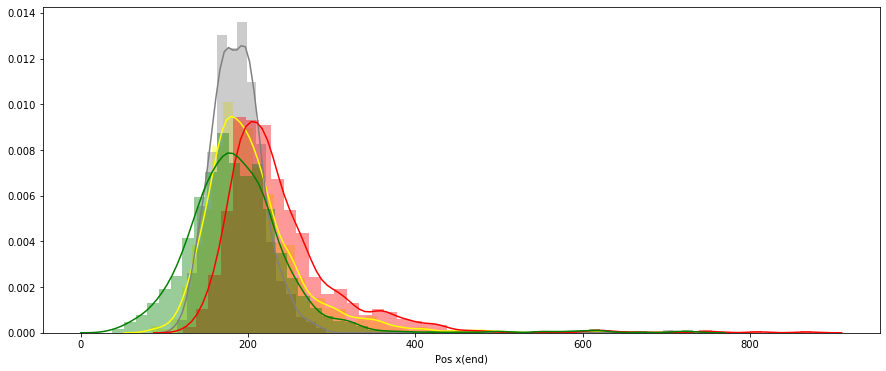

In [115]:
import matplotlib.pyplot as plt 
import seaborn as sns
filtered_df=sweep_dataframe[sweep_dataframe['Time Start']!=0 ]
plot_df1=filtered_df.query("PRL_Position=='inferior'")['Pos x(end)']
plot_df1=plot_df1[plot_df1<1024]

plot_df2=filtered_df.query("PRL_Position=='foveal'")['Pos x(end)']
plot_df2=plot_df2[plot_df2<1024]

plot_df3=filtered_df.query("PRL_Position=='left'")['Pos x(end)']
plot_df3=plot_df3[plot_df3<1024]

plot_df4=filtered_df.query("PRL_Position=='right'")['Pos x(end)']
plot_df4=plot_df4[plot_df4<1024]

plt.figure(figsize=(15,6))
sns.distplot(plot_df1,color='yellow',label='inferior')
sns.distplot(plot_df2,color='grey',label='foveal')
sns.distplot(plot_df3,color='red',label='left')
sns.distplot(plot_df4,color='green',label='right')


(768, 0)

<Figure size 1080x432 with 0 Axes>

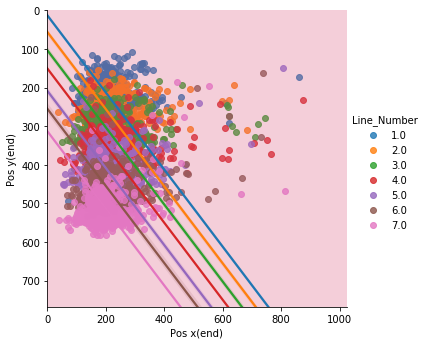

In [116]:
plt.figure(figsize=(15,6))
sns.lmplot(data=filtered_df,x='Pos x(end)',y='Pos y(end)',hue='Line_Number')
plt.xlim([0,1024])
plt.ylim([768,0])

In [117]:
# plt.figure(figsize=(15,6))
# g=sns.catplot(x='Pos x(end)',y='Pos y(end)',data=filtered_df,row='PRL_Position',kind='strip',hue='Line_Number',height=4,aspect=5)
# plt.xlim([0,1024])
# plt.ylim([768,0])

In [118]:
from scipy.stats import iqr
print(iqr(plot_df1, axis=None, rng=(25, 75)))
print(iqr(plot_df2, axis=None, rng=(25, 75)))
print(iqr(plot_df3, axis=None, rng=(25, 75)))
print(iqr(plot_df4, axis=None, rng=(25, 75)))

57.5
39.099999999999994
65.1
66.6


(0, 768)

<Figure size 1080x432 with 0 Axes>

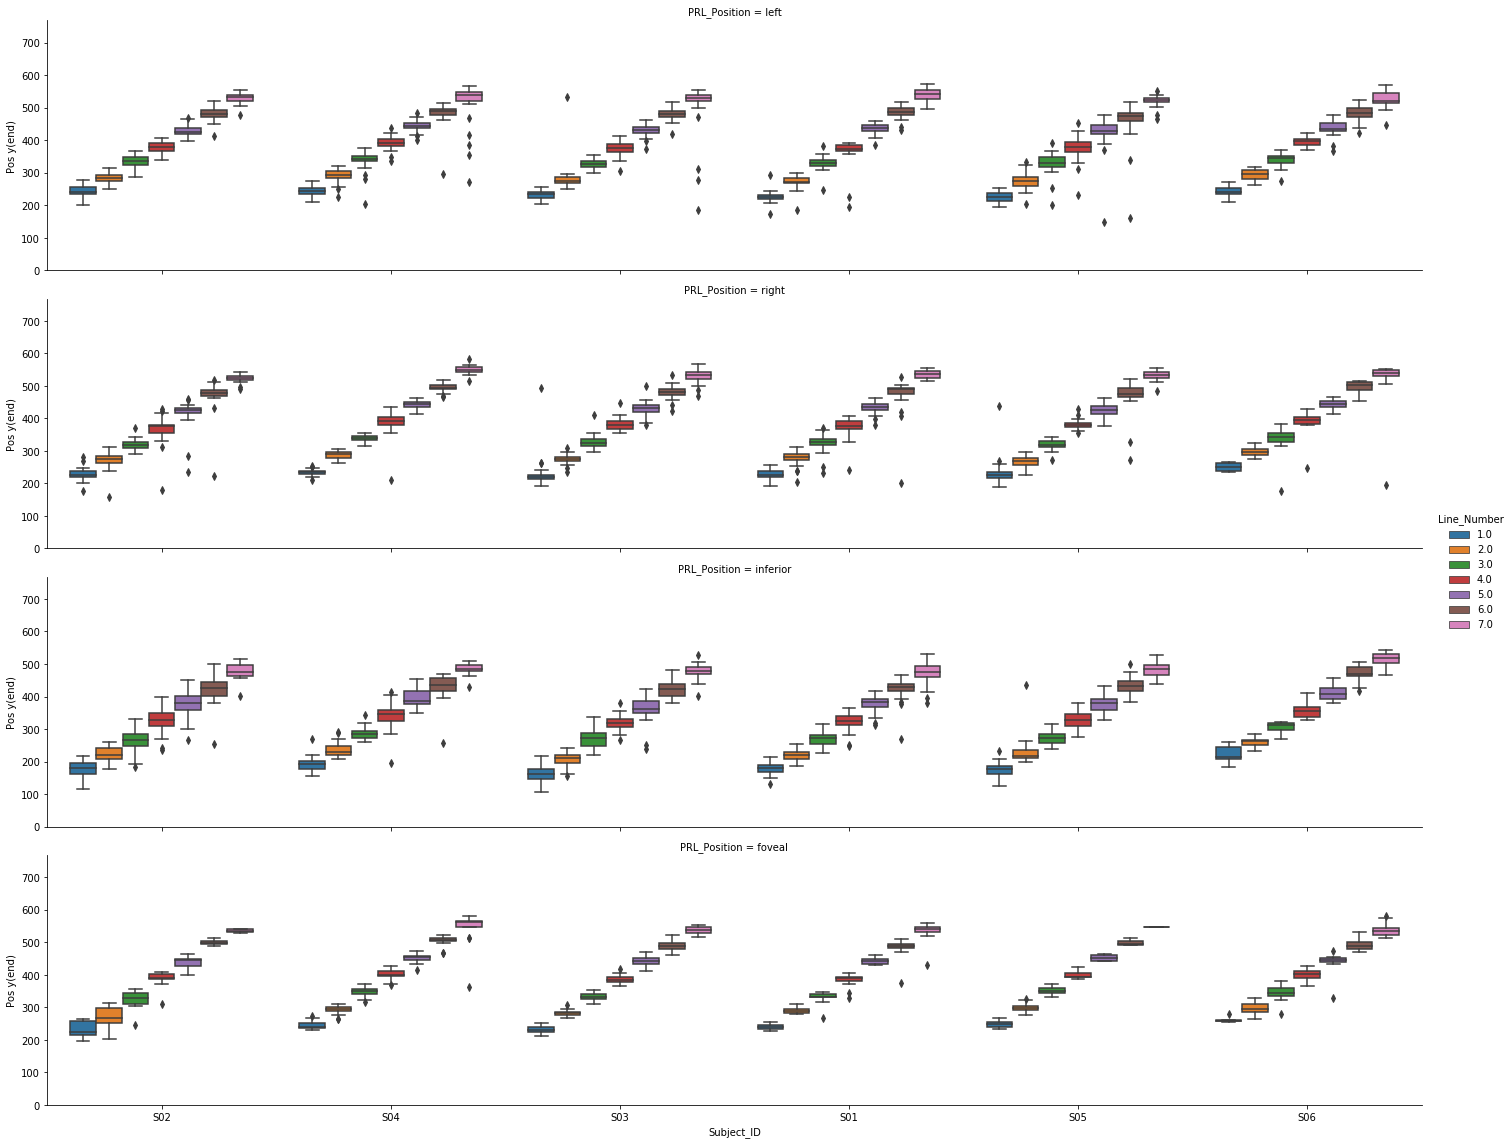

In [119]:
plt.figure(figsize=(15,6))
g=sns.catplot(x='Subject_ID',y='Pos y(end)',data=filtered_df,row='PRL_Position',kind='box',hue='Line_Number',height=4,aspect=5)
plt.ylim([0,768])

In [120]:
import seaborn as sns
plt.figure(figsize=(15,6))
g=sns.FacetGrid(filtered_df,row='Subject_ID')
g.map(sns.boxplot,"PRL_Position","Pos x(end)") #,hue='Line_Number')
plt.ylim([0,1024])
# plt.ylim([0,768])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0, 1024)

<Figure size 1080x432 with 0 Axes>

In [121]:
g=sns.jointplot(x="Pos x(end)", y="Pos y(end)", data=filtered_df.query("Line_Number==4  & PRL_Position=='foveal'"),kind='kde')
g.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker="+")

# plt.xlim([0,1024])
# plt.ylim([0,768])
# plt.gca().invert_yaxis()

In [123]:
# # Purpose: Here we calculate and plot the BCEA of the sweep landing positions

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.patches import Ellipse
# from sklearn import preprocessing

# screen_resolution_vertical=768
# screen_resolution_horizontal=1024
# diagonal_screensize_cm=50
# distance_to_screen_cm=42
# diagonal_pixel=np.sqrt(((screen_resolution_vertical)**2)+((screen_resolution_horizontal)**2))
# pixel_per_cm=diagonal_pixel/diagonal_screensize_cm
# degree_per_cm=(1/distance_to_screen_cm)* 180/np.pi
# degrees_per_pixel=degree_per_cm/pixel_per_cm

# def eigsorted(cov):
#     vals, vecs = np.linalg.eigh(cov)
#     order = vals.argsort()[::-1]
#     return vals[order], vecs[:,order]

# x = filtered_df.query("Line_Number==5 & PRL_Position=='foveal'")['Pos x(end)']
# x=((x-np.mean(x))*degrees_per_pixel)

# y = filtered_df.query("Line_Number==5 & PRL_Position=='foveal'")['Pos y(end)']
# y=((y-np.mean(y))*degrees_per_pixel)

# nstd = 1  #2
# ax = plt.subplot(111)

# cov = np.cov(x, y)
# vals, vecs = eigsorted(cov)
# theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
# w, h = 2 * nstd * np.sqrt(vals)  #*2
# ell = Ellipse(xy=(np.mean(x), np.mean(y)),
#               width=w, height=h,
#               angle=theta, color='black')
# ell.set_facecolor('none')
# ax.add_artist(ell)
# # plt.xlim([0,1024])
# # plt.ylim([0,768])
# plt.gca().invert_yaxis()
# plt.scatter(x, y)
# plt.show()
# bcea=(2.291*np.pi*np.var(x)*np.var(y)*(np.sqrt(1-(pearsonr(x,y)[0])**2)))
# print(bcea)

In [124]:
saccade_without_sweep_dataframe['reversal_ratio']=(saccade_without_sweep_dataframe['Num_reversals'])/(saccade_without_sweep_dataframe['Num_Saccades'])
ouranova(saccade_without_sweep_dataframe,'reversal_ratio',exclude_fovea=True)

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
Subject_ID  1.3125 5.0000 10.0000 0.3332

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
inferior   left  -0.3221 0.0022 -0.5225 -0.1217   True
inferior  right  -0.5346  0.001  -0.735 -0.3342   True
    left  right  -0.2125 0.0371  -0.413 -0.0121   True
------------------------------------------------------
['inferior' 'left' 'right']
[0.00220868 0.001      0.03705695]


In [125]:
import matplotlib.pyplot as plt 
import seaborn as sns

plot_df1=saccade_without_sweep_dataframe.query("PRL_Position=='inferior'")['reversal_ratio']

plot_df2=saccade_without_sweep_dataframe.query("PRL_Position=='Foveal'")['reversal_ratio']

plot_df3=saccade_without_sweep_dataframe.query("PRL_Position=='left'")['reversal_ratio']

plot_df4=saccade_without_sweep_dataframe.query("PRL_Position=='right'")['reversal_ratio']

plt.figure(figsize=(15,6))
sns.distplot(plot_df1,color=my_pal['inferior'],label='inferior')
# sns.distplot(plot_df2,color='grey',label='foveal')
sns.distplot(plot_df3,color=my_pal['left'],label='left')
sns.distplot(plot_df4,color=my_pal['right'],label='right')


In [126]:
plt.figure(figsize=(4,3))

for apos in ['inferior','left','Foveal','right']:
    df1=saccade_without_sweep_dataframe.query("PRL_Position=='%s'"%apos)
    df1['revs_flipped']=1.0 - (df1['reversal_ratio']/2. + 0.5)
    #df1=['reversal_ratio']

    # Density Plot and Histogram of all arrival delays
    sns.distplot(df1['revs_flipped'], hist=True, kde=True, 
                 bins=int(21), color = my_pal[apos], 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    #df1.plot(kind='density',color=my_pal[apos])
plt.yticks([])
plt.xlabel("Proportion of direction reversals",size=14)
plt.ylabel("Density",size=14)
#plt.axis('off')
# plt.savefig('/mnt/LabData/drc/revs.png', transparent=True, dpi=600, bbox_inches='tight')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'Density')

In [127]:
# import tkinter as tk
# from tkinter import filedialog
# root = tk.Tk()
# root.withdraw()
# #filedir_list=[]`
# data_directory=filedialog.askdirectory(title='Please select data directory')
# num_letters_dataframe=pd.DataFrame({'Filename':[],'PRL_Position':[],'Training':[],'Presentation_Mode':[],'Number_Letters':[],'Code':[]})
# num_letters_complete_list=[]
# for root,dirs,files in os.walk(data_directory):
#     for filename in os.listdir(root):
#         if 'reading_word_data' in filename:
#             if filename.endswith('.png'): 
#                 continue
#             else:
#                 if "inferior" in root.lower():
#                     prl_position='inferior'
#                 elif "left" in root.lower():
#                     prl_position='left'
#                 elif "right" in root.lower():
#                     prl_position='right'

#                 #identifies whether a word highlight was used or not
#                 if "guides" in root.lower():
#                     highlight='with highlight'
#                 elif "foveal" in root.lower():
#                     prl_position="foveal"
#                     highlight="N/A"
#                 else:
#                     highlight='no highlight'

#                 #identifies if it is a training session or main experiment
#                 if "training" in root.lower():
#                     training='True'
#                 else:
#                     training='False'
#                 word_data_path=os.path.join(root,filename)
#                 word_data=pd.read_csv(word_data_path,delimiter='\t')
#                 num_letters_list=[]
#                 for word_idx in range(len(word_data)):
#                     num_letters=len(word_data.iloc[word_idx,0])
#                     num_letters_list.append(num_letters)
#                 num_letters_trial=sum(num_letters_list)
#                 num_letters_complete_list.append(num_letters_trial)
#                 subject_id=filename[18:-8]
#                 trial_code='%s%s%s'%(subject_id,'_',prl_position)
#                 num_letters_dataframe=num_letters_dataframe.append({'Filename':filename,'PRL_Position':prl_position,'Training':training,'Presentation_Mode':highlight,'Number_Letters':num_letters_trial,'Code':trial_code},ignore_index=True)


In [128]:
# fixation_copy=fixation_dataframe.copy()
# cols_to_use = num_letters_dataframe.columns.difference(fixation_dataframe.columns)
# dfNew = pd.merge(fixation_dataframe, num_letters_dataframe, left_on='Code', right_on='Code')
# dfNew = dfNew.drop('Filename_y', 1)
# dfNew = dfNew.drop('PRL_Position_y', 1)
# dfNew = dfNew.drop('Training_y', 1)
# dfNew = dfNew.drop('Presentation_Mode_y', 1)

In [129]:
# dfNew['L/FS']=dfNew['Number_Letters']/dfNew['Num_Fixations']
# dfNew.query("PRL_Position_x=='right'")['L/FS'].mean()
# dfNew.query("PRL_Position_x=='left'")['L/FS'].std()